# Income Transition Matrix

In this Jupyter Notebook, we use PSID data to calculate income transition matrices conditional on age and on the key variables from Chetty, et al (2014): high school dropout rate, crime rate (social capital), and inequality (gini coefficient).

The income transition matrix is:
$$\begin{bmatrix} p_{11} & p_{12} & p_{13} &p_{14} \\ p_{21} & p_{22} & p_{23} &p_{24} \\ p_{31} & p_{32} & p_{33} &p_{34} \\p_{41} & p_{42} & p_{43} &p_{44} \end{bmatrix}$$

$p_{11}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will also have income below the lower quartile at period 2.

$p_{12}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will have income above the lower quartile but below the median at period 2.

$p_{13}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will have income above the median but below the upper quartile at period 2.

$p_{14}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will have income above the upper quartile at period 2.

Other probabilities have similar interpretations.

# 1. No location variable

In [146]:
from bokeh.plotting import figure, output_file, show
import numpy as np
import pandas as pd
import xlrd
from bokeh.layouts import widgetbox
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, MultiSelect
from bokeh.plotting import figure, output_file, show
import pandas as pd
from bokeh.io import output_file, show
from bokeh.models.widgets import CheckboxGroup
import numpy as np
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed,interact_manual
import ipywidgets as wg
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = xlrd.open_workbook('/Users/fulinguo/Desktop/IncomeTrans/Data/family/fam_gender.xlsx')

In [6]:
table = data.sheets()[0]
nrows = table.nrows
columns=table.row_values(0)
income=[]
for i in range(1,nrows):
    income.append(table.row_values(i))
income=np.array(income)
income=pd.DataFrame(income,columns=columns)

In [7]:
income=income.replace('',0)
income=income.astype('float')
income.head()

V1   V3      h1      w1    s1   ha1   wa1  V441    V442      h2   ...     \
0  3.0  1.0  1711.0  3903.0  24.0  52.0  46.0   3.0  1597.0     0.0   ...      
1  0.0  0.0     0.0     0.0   0.0   0.0   0.0   0.0     0.0     0.0   ...      
2  0.0  0.0     0.0     0.0   0.0   0.0   0.0   3.0  1964.0  5000.0   ...      
3  3.0  2.0     0.0     0.0  24.0  56.0  57.0   3.0   592.0     0.0   ...      
4  0.0  0.0     0.0     0.0   0.0   0.0   0.0   0.0     0.0     0.0   ...      

   ER60003  ER60017  ER60019  ER65216  ER66001  ER66002  ER66003  ER66017  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   ER66019  ER71293  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  

[5 rows x 266 columns]

In [8]:
headage_ind=[i for i in columns if 'ha' in i]
wifeage_ind=[i for i in columns if 'wa' in i]
headinc_ind=[i for i in columns if ('h' in i) and ('ha' not in i)]
wifeinc_ind=[i for i in columns if ('w' in i) and ('wa' not in i)]
state_ind=[i for i in columns if 's' in i]
hanum=[]
wanum=[]
hinum=[]
winum=[]
stanum=[]
for i in headage_ind:
    hanum.append(columns.index(i))
for i in wifeage_ind:
    wanum.append(columns.index(i))
for i in headinc_ind:
    hinum.append(columns.index(i))
for i in wifeinc_ind:
    winum.append(columns.index(i))
for i in state_ind:
    stanum.append(columns.index(i))

In [15]:
headinc_quan=[]
for ind in headinc_ind:
    upp=income[(income[ind]!=0)][ind].quantile(0.75)
    med=income[(income[ind]!=0)][ind].quantile(0.5)
    low=income[(income[ind]!=0)][ind].quantile(0.25)
    headinc_quan.append([upp,med,low])
headinc_quan=np.array(headinc_quan)
headinc_quan

array([[  7750.  ,   5000.  ,   2620.  ],
       [  8247.  ,   5250.  ,   2970.5 ],
       [  8900.  ,   5613.  ,   3033.  ],
       [  9300.  ,   6000.  ,   3079.5 ],
       [  9800.  ,   6322.  ,   3432.  ],
       [ 10500.  ,   7000.  ,   3800.  ],
       [ 11500.  ,   7500.  ,   4142.  ],
       [ 12100.  ,   8000.  ,   4500.  ],
       [ 13000.  ,   8500.  ,   4650.  ],
       [ 14573.75,   9257.5 ,   5000.  ],
       [ 16000.  ,  10000.  ,   5600.  ],
       [ 17500.  ,  11000.  ,   6050.  ],
       [ 19000.  ,  12000.  ,   6800.  ],
       [ 20246.75,  13000.  ,   7000.  ],
       [ 22759.  ,  14000.  ,   7583.  ],
       [ 23400.  ,  14161.  ,   7400.5 ],
       [ 25000.  ,  15000.  ,   8000.  ],
       [ 26906.5 ,  16076.5 ,   9000.  ],
       [ 27974.5 ,  17000.  ,   9256.  ],
       [ 29000.  ,  18000.  ,   9647.25],
       [ 30000.  ,  18775.  ,  10000.  ],
       [ 32000.  ,  20000.  ,  11000.  ],
       [ 31000.  ,  19200.  ,  10500.  ],
       [ 32000.  ,  20000.  ,  110

In [17]:
wifeinc_quan=[]
for ind in wifeinc_ind:
    upp=income[(income[ind]!=0)][ind].quantile(0.75)
    med=income[(income[ind]!=0)][ind].quantile(0.5)
    low=income[(income[ind]!=0)][ind].quantile(0.25)
    wifeinc_quan.append([upp,med,low])
wifeinc_quan=np.array(wifeinc_quan)
wifeinc_quan

array([[ 3500.  ,  1720.  ,   600.  ],
       [ 3657.75,  2000.  ,   700.  ],
       [ 4000.  ,  2247.  ,   800.  ],
       [ 4599.25,  2600.  ,   949.5 ],
       [ 5000.  ,  2924.  ,  1000.  ],
       [ 5000.  ,  3000.  ,  1200.  ],
       [ 5600.  ,  3200.  ,  1200.  ],
       [ 6000.  ,  3600.  ,  1500.  ],
       [ 6855.5 ,  4000.  ,  1675.  ],
       [ 7500.  ,  4500.  ,  2000.  ],
       [ 8000.  ,  5000.  ,  2000.  ],
       [ 9000.  ,  5500.  ,  2400.  ],
       [10000.  ,  6000.  ,  2500.  ],
       [11000.  ,  6700.  ,  3000.  ],
       [12000.  ,  7500.  ,  3000.  ],
       [13000.  ,  8000.  ,  3250.  ],
       [14500.  ,  8800.  ,  3900.  ],
       [15000.  ,  8730.  ,  3606.25],
       [16300.  , 10000.  ,  4400.  ],
       [17221.  , 10000.  ,  4924.  ],
       [18541.  , 11000.  ,  5000.  ],
       [20000.  , 12000.  ,  5760.75],
       [20000.  , 12000.  ,  5490.  ],
       [21000.  , 12000.  ,  6000.  ],
       [22000.  , 13000.  ,  6249.5 ],
       [24759.  , 15000. 

In [18]:
income.values

array([[3.000e+00, 1.000e+00, 1.711e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [34]:
headmed_mar1=[[0]*16]*60
headmed_mar1=np.array(headmed_mar1)
for i in range(len(income)):
    for j in range(len(headage_ind)-1):
        type=16
        age=income.values[i][hanum[j]]
        inc=income.values[i][hinum[j]]
        age2=income.values[i][hanum[j+1]] # set the period interval be 1 year
        inc2=income.values[i][hinum[j+1]]
            #elif j>=23:
            #age=income.values[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=79) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<headinc_quan[j][2]) & (inc2<headinc_quan[j+1][2]):
                type=0
            elif (inc<headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][2]) & (inc2<headinc_quan[j+1][1]):
                type=1
            elif (inc<headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][1]) & (inc2<headinc_quan[j+1][0]):
                type=2
            elif (inc<headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][0]):
                type=3
            elif (inc<headinc_quan[j][1]) & (inc>=headinc_quan[j][2]) & (inc2<headinc_quan[j+1][2]):
                type=4
            elif (inc<headinc_quan[j][1]) & (inc>=headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][2]) & (inc2<headinc_quan[j+1][1]):
                type=5
            elif (inc<headinc_quan[j][1]) & (inc>=headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][1]) & (inc2<headinc_quan[j+1][0]):
                type=6
            elif (inc<headinc_quan[j][1]) & (inc>=headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][0]):
                type=7
            elif (inc<headinc_quan[j][0]) & (inc>=headinc_quan[j][1]) & (inc2<headinc_quan[j+1][2]):
                type=8
            elif (inc<headinc_quan[j][0]) & (inc>=headinc_quan[j][1]) & (inc2>=headinc_quan[j+1][2]) & (inc2<headinc_quan[j+1][1]):
                type=9
            elif (inc<headinc_quan[j][0]) & (inc>=headinc_quan[j][1]) & (inc2>=headinc_quan[j+1][1]) & (inc2<headinc_quan[j+1][0]):
                type=10
            elif (inc<headinc_quan[j][0]) & (inc>=headinc_quan[j][1]) & (inc2>=headinc_quan[j+1][0]):
                type=11
            elif (inc>=headinc_quan[j][0]) & (inc2<headinc_quan[j+1][2]):
                type=12
            elif (inc>=headinc_quan[j][0]) & (inc2>=headinc_quan[j+1][2]) & (inc2<headinc_quan[j+1][1]):
                type=13
            elif (inc>=headinc_quan[j][0]) & (inc2>=headinc_quan[j+1][1]) & (inc2<headinc_quan[j+1][0]):
                type=14
            elif (inc>=headinc_quan[j][0]) & (inc2>=headinc_quan[j+1][0]):
                type=15
            headmed_mar1[int(age)-20][type]+=1

In [35]:
headmed_mar1=headmed_mar1.reshape(60,4,4)
print('Number matrices:\n',headmed_mar1)
headmarkov1=[]
for i in range(len(headmed_mar1)):
    for j in range(4):
        sum_quan=sum(headmed_mar1[i][j])
        headmed_mar1[i][j]/max(sum_quan,0.1)
        headmarkov1.append(headmed_mar1[i][j]/max(sum_quan,0.1))
headmarkov1=np.array(headmarkov1)
headmarkov1=headmarkov1.reshape(60,4,4)

Number matrices:
 [[[ 565  228   43   10]
  [ 113  285  123   12]
  [  16   52  111   17]
  [   0    4   11   24]]

 [[ 646  291   53    8]
  [ 149  504  174   27]
  [  28   93  246   43]
  [   6    8   15   46]]

 [[ 719  298   96   15]
  [ 197  640  254   39]
  [  30  103  381   78]
  [   5    6   43   85]]

 [[ 712  404   98   26]
  [ 236  728  326   66]
  [  38  176  529  152]
  [   7   16   74  161]]

 [[ 676  348   92   33]
  [ 257  859  350   60]
  [  56  216  726  190]
  [   6   18   93  291]]

 [[ 621  317   90   27]
  [ 241  867  377   51]
  [  50  202  860  249]
  [   9   17  119  437]]

 [[ 587  270   72   26]
  [ 242  846  368   49]
  [  69  243  902  268]
  [  11   29  143  544]]

 [[ 562  249   64   31]
  [ 243  793  345   58]
  [  60  236  897  291]
  [  10   28  158  691]]

 [[ 597  266   68   21]
  [ 197  745  300   67]
  [  62  234  895  264]
  [  13   25  188  822]]

 [[ 559  233   60   18]
  [ 188  734  306   59]
  [  56  240  935  264]
  [  16   28  196  886]]

 [

In [36]:
print(headmarkov1)

[[[0.6678487  0.26950355 0.05082742 0.01182033]
  [0.2120075  0.53470919 0.23076923 0.02251407]
  [0.08163265 0.26530612 0.56632653 0.08673469]
  [0.         0.1025641  0.28205128 0.61538462]]

 [[0.64729459 0.29158317 0.05310621 0.00801603]
  [0.17447307 0.59016393 0.20374707 0.03161593]
  [0.06829268 0.22682927 0.6        0.10487805]
  [0.08       0.10666667 0.2        0.61333333]]

 [[0.63741135 0.2641844  0.08510638 0.01329787]
  [0.17433628 0.56637168 0.22477876 0.03451327]
  [0.05067568 0.17398649 0.64358108 0.13175676]
  [0.03597122 0.04316547 0.30935252 0.61151079]]

 [[0.57419355 0.32580645 0.07903226 0.02096774]
  [0.1740413  0.53687316 0.24041298 0.04867257]
  [0.0424581  0.19664804 0.59106145 0.1698324 ]
  [0.02713178 0.0620155  0.28682171 0.62403101]]

 [[0.58833768 0.30287206 0.08006963 0.02872063]
  [0.16841415 0.56290957 0.2293578  0.03931848]
  [0.04713805 0.18181818 0.61111111 0.15993266]
  [0.01470588 0.04411765 0.22794118 0.71323529]]

 [[0.58862559 0.30047393 0.085

<IPython.core.display.Javascript object>


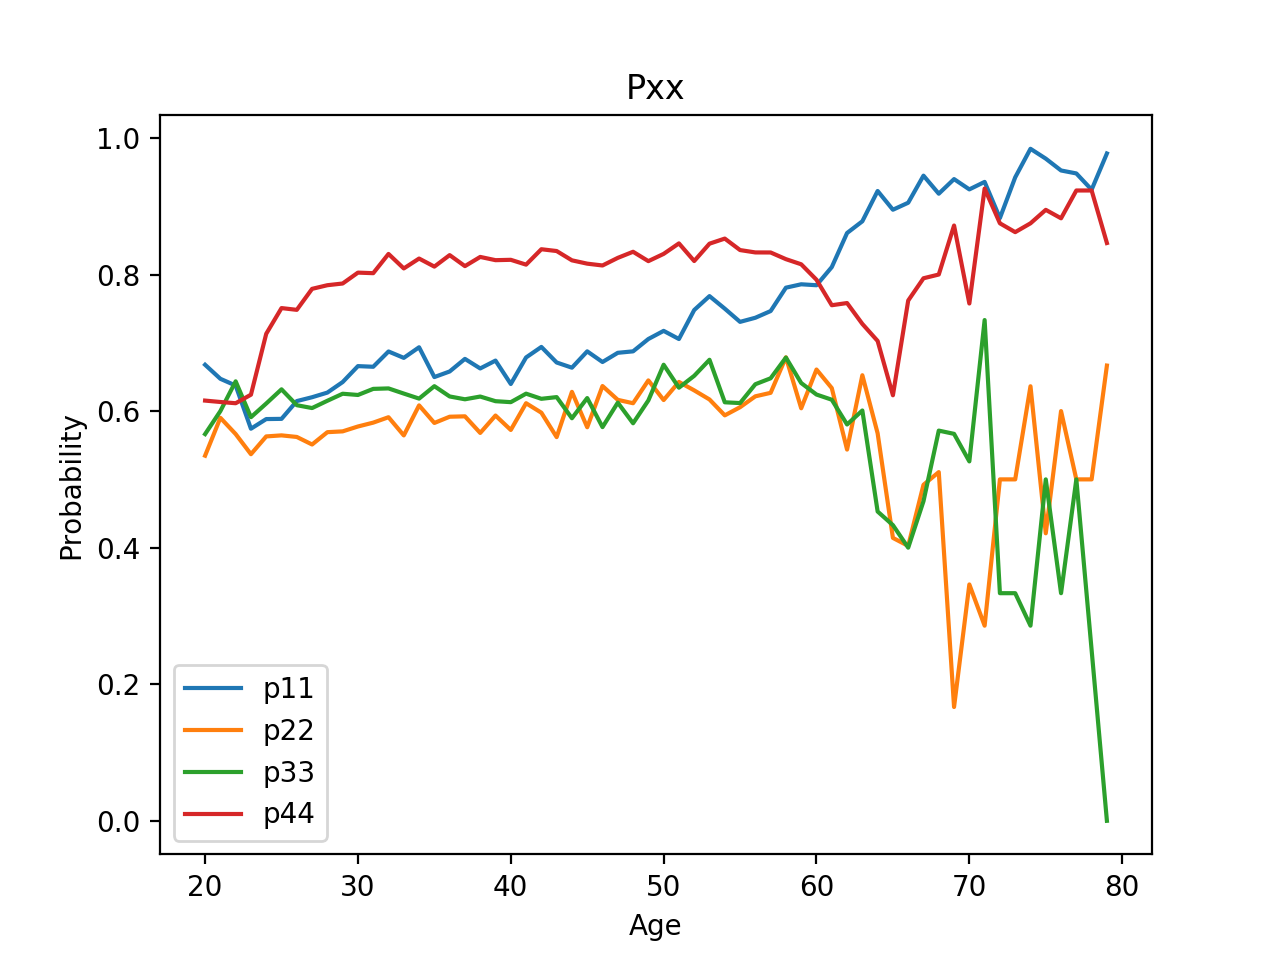

In [37]:
import matplotlib.pyplot as plt
q11=[]
q22=[]
q33=[]
q44=[]
for i in headmarkov1:
    q11.append(i[0][0])
    q22.append(i[1][1])
    q33.append(i[2][2])
    q44.append(i[3][3])
age=np.arange(20,20+len(q11))
%matplotlib notebook
plt.plot(age,q11,label='p11')
plt.plot(age,q22,label='p22')
plt.plot(age,q33,label='p33')
plt.plot(age,q44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Pxx')
plt.legend()

<IPython.core.display.Javascript object>


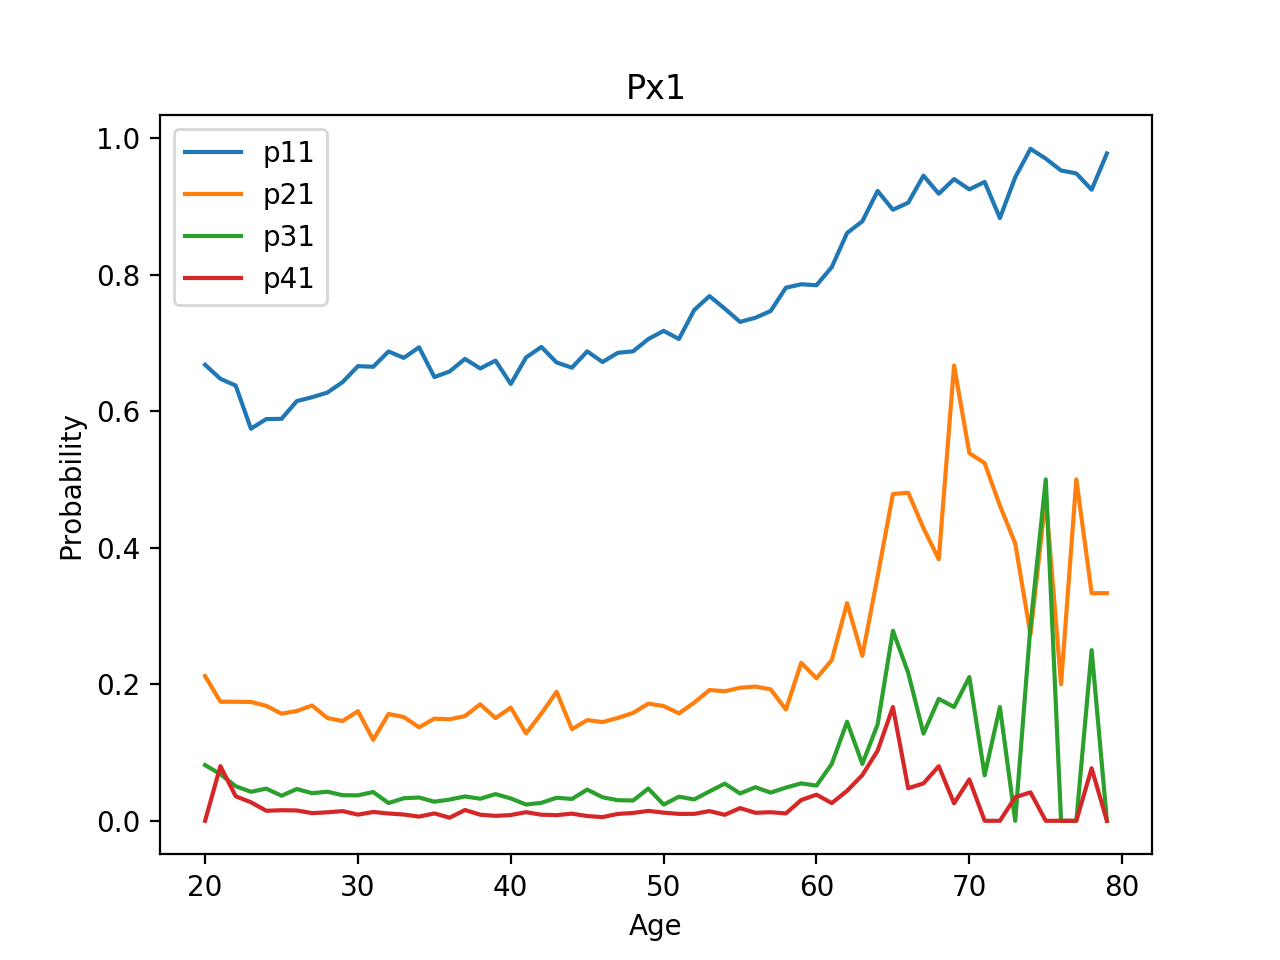

In [38]:
import matplotlib.pyplot as plt
q11=[]
q21=[]
q31=[]
q41=[]
for i in headmarkov1:
    q11.append(i[0][0])
    q21.append(i[1][0])
    q31.append(i[2][0])
    q41.append(i[3][0])
age=np.arange(20,20+len(q11))
%matplotlib notebook
plt.plot(age,q11,label='p11')
plt.plot(age,q21,label='p21')
plt.plot(age,q31,label='p31')
plt.plot(age,q41,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1')
plt.legend()

<IPython.core.display.Javascript object>


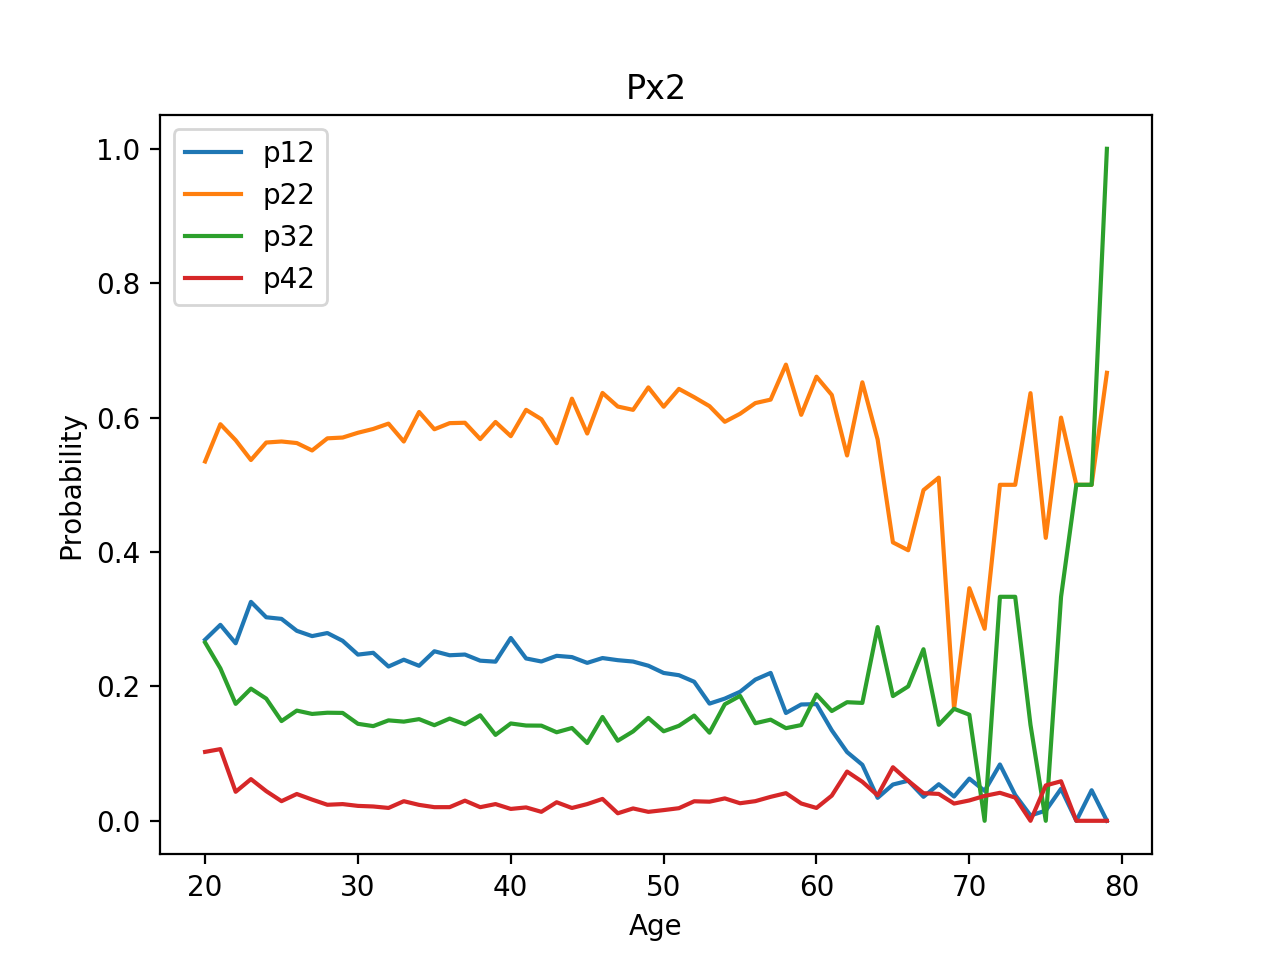

In [39]:
import matplotlib.pyplot as plt
q12=[]
q22=[]
q32=[]
q42=[]
for i in headmarkov1:
    q12.append(i[0][1])
    q22.append(i[1][1])
    q32.append(i[2][1])
    q42.append(i[3][1])
age=np.arange(20,20+len(q11))
%matplotlib notebook
plt.plot(age,q12,label='p12')
plt.plot(age,q22,label='p22')
plt.plot(age,q32,label='p32')
plt.plot(age,q42,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2')
plt.legend()

<IPython.core.display.Javascript object>


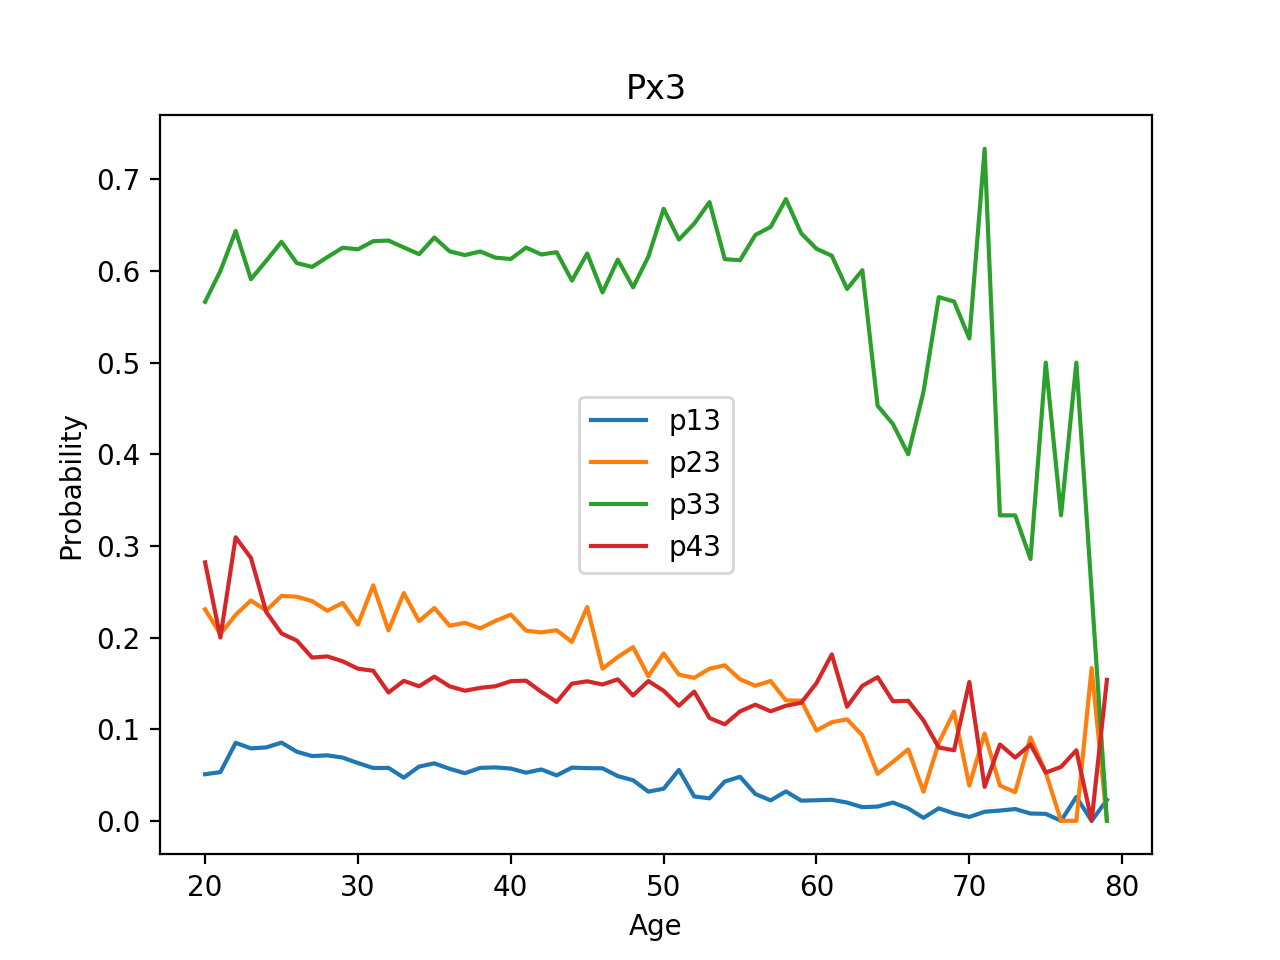

In [40]:
import matplotlib.pyplot as plt
q13=[]
q23=[]
q33=[]
q43=[]
for i in headmarkov1:
    q13.append(i[0][2])
    q23.append(i[1][2])
    q33.append(i[2][2])
    q43.append(i[3][2])
age=np.arange(20,20+len(q11))
%matplotlib notebook
plt.plot(age,q13,label='p13')
plt.plot(age,q23,label='p23')
plt.plot(age,q33,label='p33')
plt.plot(age,q43,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3')
plt.legend()

<IPython.core.display.Javascript object>


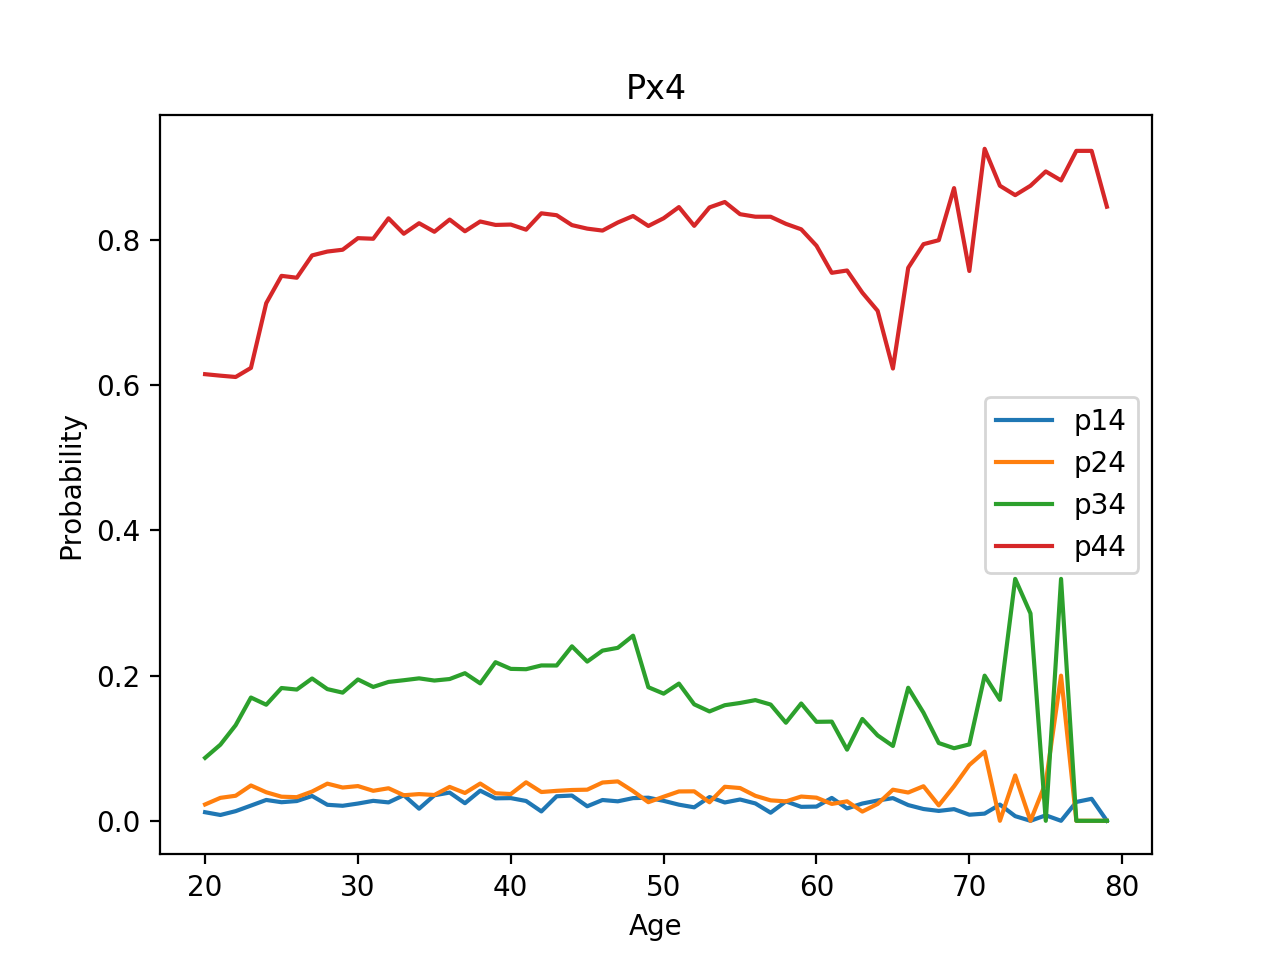

In [41]:
import matplotlib.pyplot as plt
q14=[]
q24=[]
q34=[]
q44=[]
for i in headmarkov1:
    q14.append(i[0][3])
    q24.append(i[1][3])
    q34.append(i[2][3])
    q44.append(i[3][3])
age=np.arange(20,20+len(q11))
%matplotlib notebook
plt.plot(age,q14,label='p14')
plt.plot(age,q24,label='p24')
plt.plot(age,q34,label='p34')
plt.plot(age,q44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px4')
plt.legend()

In [42]:
from bokeh.layouts import widgetbox
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, MultiSelect
from bokeh.plotting import figure, output_file, show
import pandas as pd
from bokeh.io import output_file, show
from bokeh.models.widgets import CheckboxGroup
import numpy as np
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

output_file("headmatrix.html")
p = figure(width=1000, height=700, x_axis_type="datetime")
p11=q11
p12=q12
p13=q13
p14=q14
p21=q21
p22=q22
p23=q23
p24=q24
p31=q31
p32=q32
p33=q33
p34=q34
p41=q41
p42=q42
p43=q43
p44=q44
plots=[]
x=age
color=['green', 'orange', 'yellow', 'blue',\
       'purple', 'cyan', 'pink', 'black', 'chocolate', \
       'red', 'gray', 'brown', 'burlywood', 'cadetblue', 'chartreuse','navy']
allp=[p11,p12,p13,p14,p21,p22,p23,p24,p31,p32,p33,p34,p41,p42,p43,p44]
strp=["p11", "p12", "p13",'p14',"p21", "p22", \
                                       "p23",'p24',"p31", "p32", "p33",'p34',\
                                       "p41", "p42", "p43",'p44']
for i in range(0,16):
    source = ColumnDataSource(data=dict(x=x, y=allp[i]))
    plt = p.line('x', 'y', line_width=2,  alpha=0.8, color=color[i],source=source,legend=strp[i])
    plots.append(plt)
checkbox_group = CheckboxGroup(labels=["p11", "p12", "p13",'p14',"p21", "p22", \
                                       "p23",'p24',"p31", "p32", "p33",'p34',\
                                       "p41", "p42", "p43",'p44'], active=list(range(0,16)))
args=dict(line0=plots[0],line1=plots[1], line2=plots[2], line3=plots[3],line4=plots[4], line5=plots[5], line6=plots[6],\
         line7=plots[7], line8=plots[8], line9=plots[9],line10=plots[10], line11=plots[11], line12=plots[12],\
         line13=plots[13], line14=plots[14], line15=plots[15])
checkbox_group.callback = CustomJS(args = args,  code=""" 
        //console.log(cb_obj.active);
        line0.visible = false;
        line1.visible = false;
        line2.visible = false;
        line3.visible = false;
        line4.visible = false;
        line5.visible = false;
        line6.visible = false;
        line7.visible = false;
        line8.visible = false;
        line9.visible = false;
        line10.visible = false;
        line11.visible = false;
        line12.visible = false;
        line13.visible = false;
        line14.visible = false;
        line15.visible = false;

        for (i in cb_obj.active) {
            //console.log(cb_obj.active[i]);
            if (cb_obj.active[i] == 0) {
                line0.visible = true;
            } else if (cb_obj.active[i] == 1) {
                line1.visible = true;
            } else if (cb_obj.active[i] == 2) {
                line2.visible = true;
            } else if (cb_obj.active[i] == 3) {
                line3.visible = true;
            } else if (cb_obj.active[i] == 4) {
                line4.visible = true;
            } else if (cb_obj.active[i] == 5) {
                line5.visible = true;
            } else if (cb_obj.active[i] == 6) {
                line6.visible = true;
            } else if (cb_obj.active[i] == 7) {
                line7.visible = true;
            } else if (cb_obj.active[i] == 8) {
                line8.visible = true;
            } else if (cb_obj.active[i] == 9) {
                line9.visible = true;
            } else if (cb_obj.active[i] == 10) {
                line10.visible = true;
            } else if (cb_obj.active[i] == 11) {
                line11.visible = true;
            } else if (cb_obj.active[i] == 12) {
                line12.visible = true;
            } else if (cb_obj.active[i] == 13) {
                line13.visible = true;
            } else if (cb_obj.active[i] == 14) {
                line14.visible = true;
            } else if (cb_obj.active[i] == 15) {
                line15.visible = true;
            }
        }
    """)

layout = row(p, widgetbox(checkbox_group), sizing_mode='fixed')

show(layout)

## Findings:
1. The fluctuation of the probability of men's income movement is larger when they are after 60 years old than before 60 years old (One reason is lack of data).
2. The probability of downward movement decreases slightly when men are between 20 and 30, and remain constant between 30 and 60.
3. The probability of downward movement might increase after 60 years old.
4. The probability of upward movement remain roughly constant between 20 and 50 years old, but shows a decreasing trend after 50 years old.
5. Usually, upward probabilities (especially p12, p23) are higher than the corresponding downward probabilities (p21, p32).

In [44]:
wifemed_mar1=[[0]*16]*60
wifemed_mar1=np.array(wifemed_mar1)
for i in range(len(income)):
    for j in range(len(wifeinc_ind)-1):
        type=16
        age=income.values[i][wanum[j]]
        inc=income.values[i][winum[j]]
        age2=income.values[i][wanum[j+1]] # set the period interval be 1 year
        inc2=income.values[i][winum[j+1]]
            #elif j>=23:
            #age=income.values[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=79) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<wifeinc_quan[j][2]) & (inc2<wifeinc_quan[j+1][2]):
                type=0
            elif (inc<wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][2]) & (inc2<wifeinc_quan[j+1][1]):
                type=1
            elif (inc<wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][1]) & (inc2<wifeinc_quan[j+1][0]):
                type=2
            elif (inc<wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][0]):
                type=3
            elif (inc<wifeinc_quan[j][1]) & (inc>=wifeinc_quan[j][2]) & (inc2<wifeinc_quan[j+1][2]):
                type=4
            elif (inc<wifeinc_quan[j][1]) & (inc>=wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][2]) & (inc2<wifeinc_quan[j+1][1]):
                type=5
            elif (inc<wifeinc_quan[j][1]) & (inc>=wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][1]) & (inc2<wifeinc_quan[j+1][0]):
                type=6
            elif (inc<wifeinc_quan[j][1]) & (inc>=wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][0]):
                type=7
            elif (inc<wifeinc_quan[j][0]) & (inc>=wifeinc_quan[j][1]) & (inc2<wifeinc_quan[j+1][2]):
                type=8
            elif (inc<wifeinc_quan[j][0]) & (inc>=wifeinc_quan[j][1]) & (inc2>=wifeinc_quan[j+1][2]) & (inc2<wifeinc_quan[j+1][1]):
                type=9
            elif (inc<wifeinc_quan[j][0]) & (inc>=wifeinc_quan[j][1]) & (inc2>=wifeinc_quan[j+1][1]) & (inc2<wifeinc_quan[j+1][0]):
                type=10
            elif (inc<wifeinc_quan[j][0]) & (inc>=wifeinc_quan[j][1]) & (inc2>=wifeinc_quan[j+1][0]):
                type=11
            elif (inc>=wifeinc_quan[j][0]) & (inc2<wifeinc_quan[j+1][2]):
                type=12
            elif (inc>=wifeinc_quan[j][0]) & (inc2>=wifeinc_quan[j+1][2]) & (inc2<wifeinc_quan[j+1][1]):
                type=13
            elif (inc>=wifeinc_quan[j][0]) & (inc2>=wifeinc_quan[j+1][1]) & (inc2<wifeinc_quan[j+1][0]):
                type=14
            elif (inc>=wifeinc_quan[j][0]) & (inc2>=wifeinc_quan[j+1][0]):
                type=15
            wifemed_mar1[int(age)-20][type]+=1

In [45]:
wifemed_mar1=wifemed_mar1.reshape(60,4,4)
print('Number matrices:\n',wifemed_mar1)
wifemarkov1=[]
for i in range(len(wifemed_mar1)):
    for j in range(4):
        sum_quan=sum(wifemed_mar1[i][j])
        wifemed_mar1[i][j]/max(sum_quan,0.1)
        wifemarkov1.append(wifemed_mar1[i][j]/max(sum_quan,0.1))
wifemarkov1=np.array(wifemarkov1)
wifemarkov1=wifemarkov1.reshape(60,4,4)

Number matrices:
 [[[147  78  19   3]
  [ 64 133  73  12]
  [ 20  50 119  25]
  [  5   7  19  48]]

 [[148  91  29   8]
  [ 86 158  86  29]
  [ 20  74 198  61]
  [  8  12  36  84]]

 [[171  78  42   6]
  [ 85 196 119  35]
  [ 31  77 265  73]
  [ 12  16  45 153]]

 [[204 117  35  12]
  [ 91 173 111  33]
  [ 23 105 295  79]
  [  9  25  67 247]]

 [[201  86  37   2]
  [ 86 182 104  26]
  [ 41 114 334  98]
  [  9  19  70 337]]

 [[216 116  33   6]
  [ 85 194 128  29]
  [ 34  97 322 101]
  [ 15  34  82 392]]

 [[191 104  31   3]
  [ 95 207  94  28]
  [ 24 113 334  94]
  [ 13  23  76 450]]

 [[202  83  35   4]
  [ 79 204  89  28]
  [ 27 112 279 105]
  [  9  15  97 472]]

 [[191  80  25   7]
  [ 82 219 110  20]
  [ 35  89 298  85]
  [ 16  36 103 459]]

 [[225  89  32   7]
  [ 73 207 100  23]
  [ 32  83 297  83]
  [ 13  26  97 465]]

 [[222  98  30   7]
  [ 82 218  88  11]
  [ 34 100 277 105]
  [ 17  16  67 498]]

 [[212 100  22   4]
  [ 77 222  97  21]
  [ 17  79 270  64]
  [ 11  20  80 462]]

In [47]:
print(wifemarkov1)

[[[0.5951417  0.31578947 0.07692308 0.01214575]
  [0.22695035 0.47163121 0.25886525 0.04255319]
  [0.09345794 0.23364486 0.55607477 0.11682243]
  [0.06329114 0.08860759 0.24050633 0.60759494]]

 [[0.53623188 0.32971014 0.10507246 0.02898551]
  [0.23955432 0.44011142 0.23955432 0.08077994]
  [0.05665722 0.20963173 0.56090652 0.17280453]
  [0.05714286 0.08571429 0.25714286 0.6       ]]

 [[0.57575758 0.26262626 0.14141414 0.02020202]
  [0.1954023  0.45057471 0.27356322 0.08045977]
  [0.06950673 0.17264574 0.5941704  0.16367713]
  [0.05309735 0.07079646 0.19911504 0.67699115]]

 [[0.55434783 0.31793478 0.0951087  0.0326087 ]
  [0.22303922 0.42401961 0.27205882 0.08088235]
  [0.04581673 0.20916335 0.5876494  0.15737052]
  [0.02586207 0.07183908 0.19252874 0.70977011]]

 [[0.61656442 0.26380368 0.11349693 0.00613497]
  [0.2160804  0.45728643 0.26130653 0.06532663]
  [0.06984668 0.19420784 0.56899489 0.1669506 ]
  [0.02068966 0.04367816 0.16091954 0.77471264]]

 [[0.58221024 0.31266846 0.088

<IPython.core.display.Javascript object>


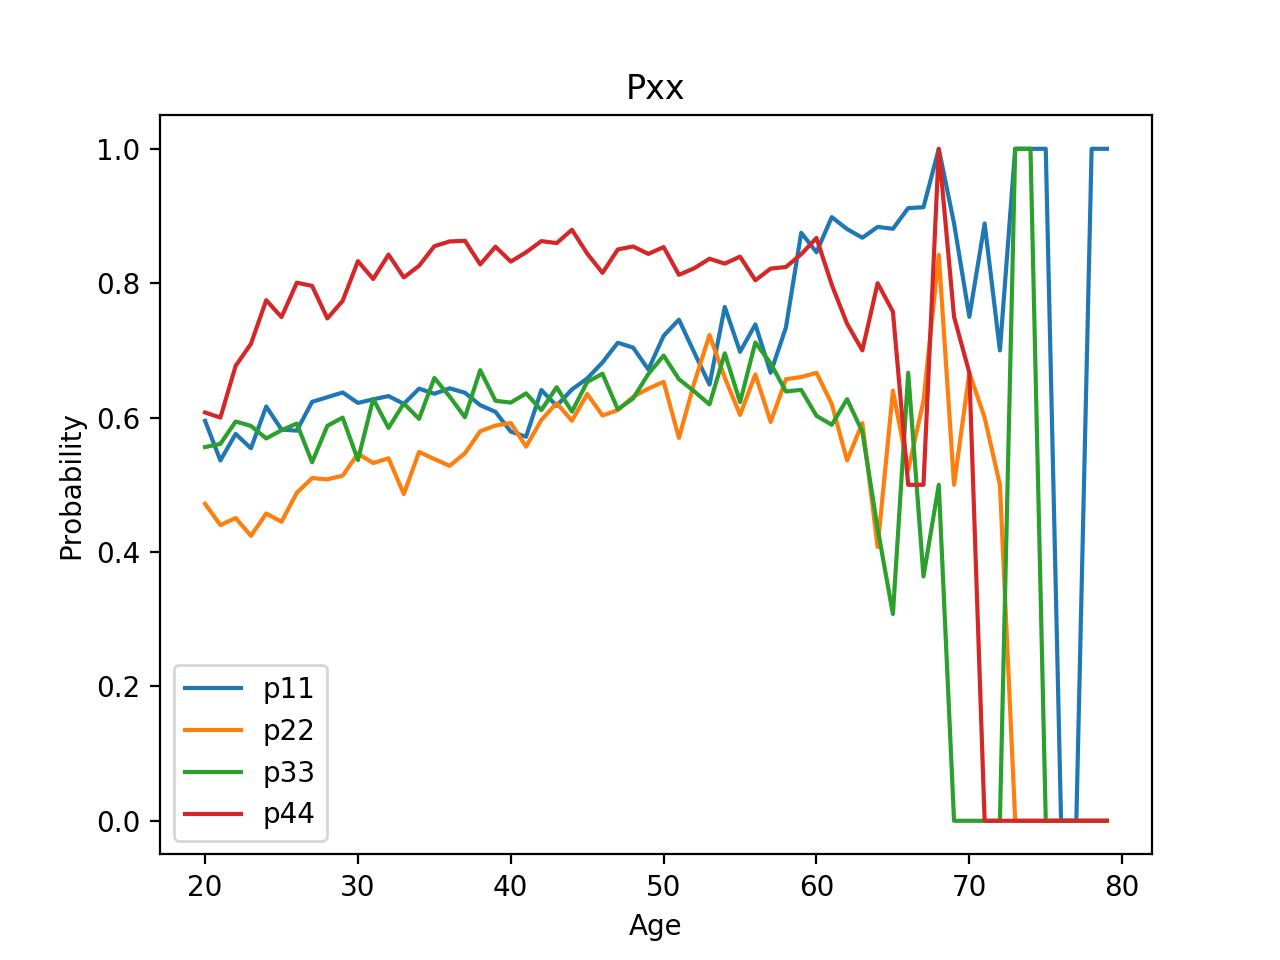

In [48]:
import matplotlib.pyplot as plt
wq11=[]
wq22=[]
wq33=[]
wq44=[]
for i in wifemarkov1:
    wq11.append(i[0][0])
    wq22.append(i[1][1])
    wq33.append(i[2][2])
    wq44.append(i[3][3])
age=np.arange(20,20+len(wq11))
%matplotlib notebook
plt.plot(age,wq11,label='p11')
plt.plot(age,wq22,label='p22')
plt.plot(age,wq33,label='p33')
plt.plot(age,wq44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Pxx')
plt.legend()

<IPython.core.display.Javascript object>


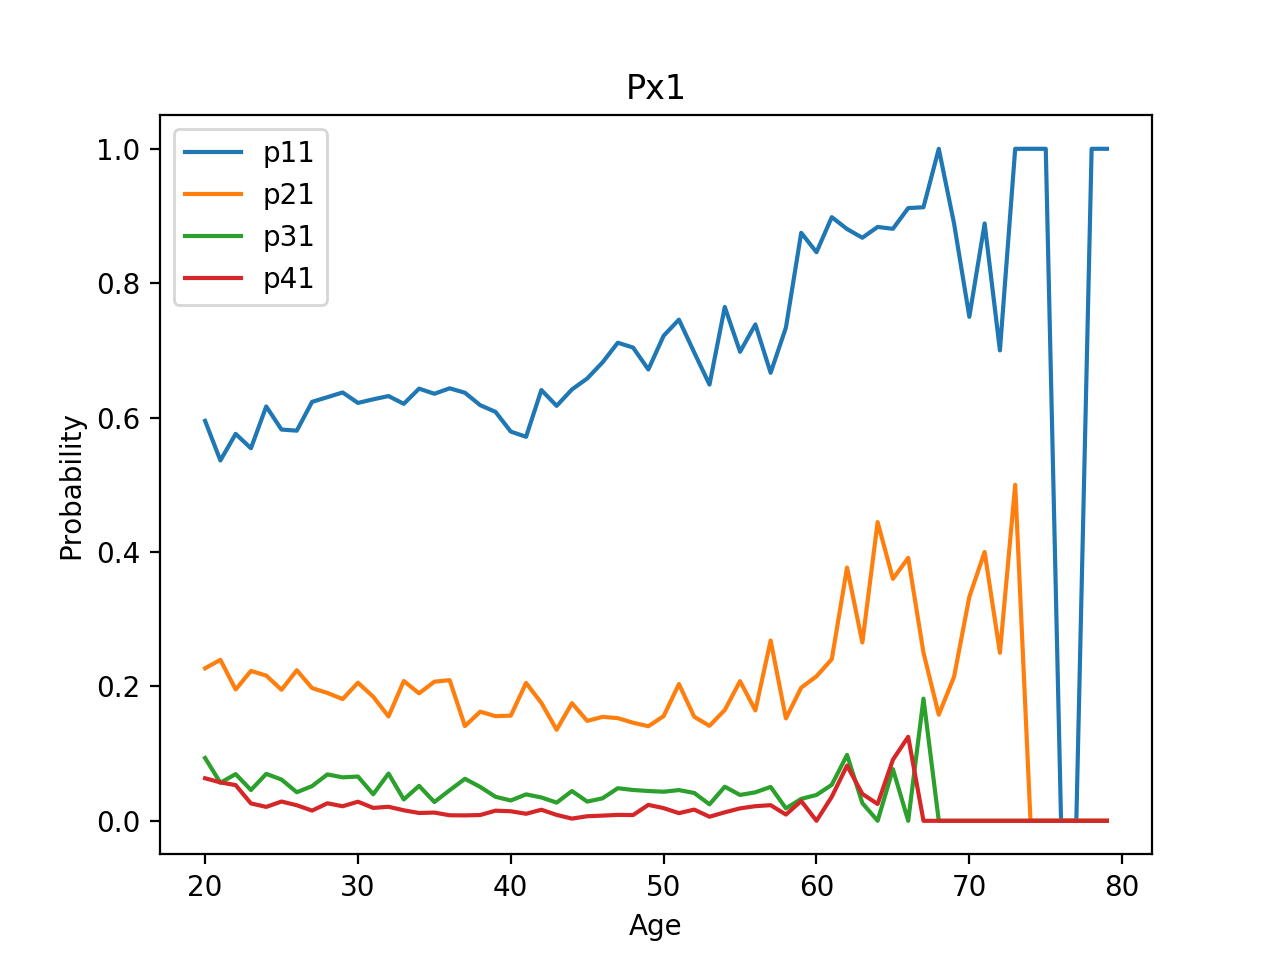

In [49]:
import matplotlib.pyplot as plt
wq11=[]
wq21=[]
wq31=[]
wq41=[]
for i in wifemarkov1:
    wq11.append(i[0][0])
    wq21.append(i[1][0])
    wq31.append(i[2][0])
    wq41.append(i[3][0])
age=np.arange(20,20+len(wq11))
%matplotlib notebook
plt.plot(age,wq11,label='p11')
plt.plot(age,wq21,label='p21')
plt.plot(age,wq31,label='p31')
plt.plot(age,wq41,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1')
plt.legend()

<IPython.core.display.Javascript object>


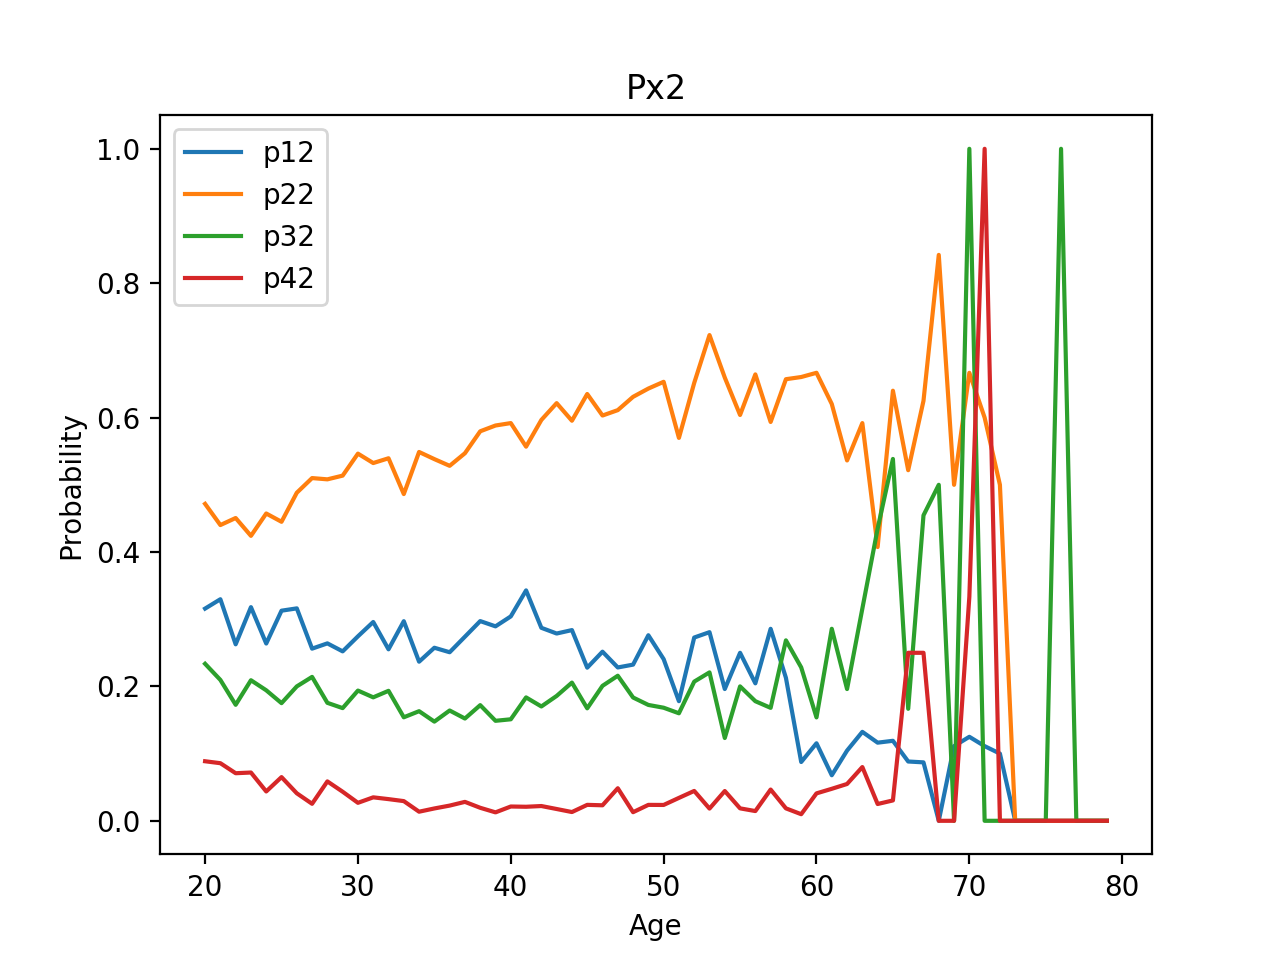

In [50]:
import matplotlib.pyplot as plt
wq12=[]
wq22=[]
wq32=[]
wq42=[]
for i in wifemarkov1:
    wq12.append(i[0][1])
    wq22.append(i[1][1])
    wq32.append(i[2][1])
    wq42.append(i[3][1])
age=np.arange(20,20+len(wq11))
%matplotlib notebook
plt.plot(age,wq12,label='p12')
plt.plot(age,wq22,label='p22')
plt.plot(age,wq32,label='p32')
plt.plot(age,wq42,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2')
plt.legend()

<IPython.core.display.Javascript object>


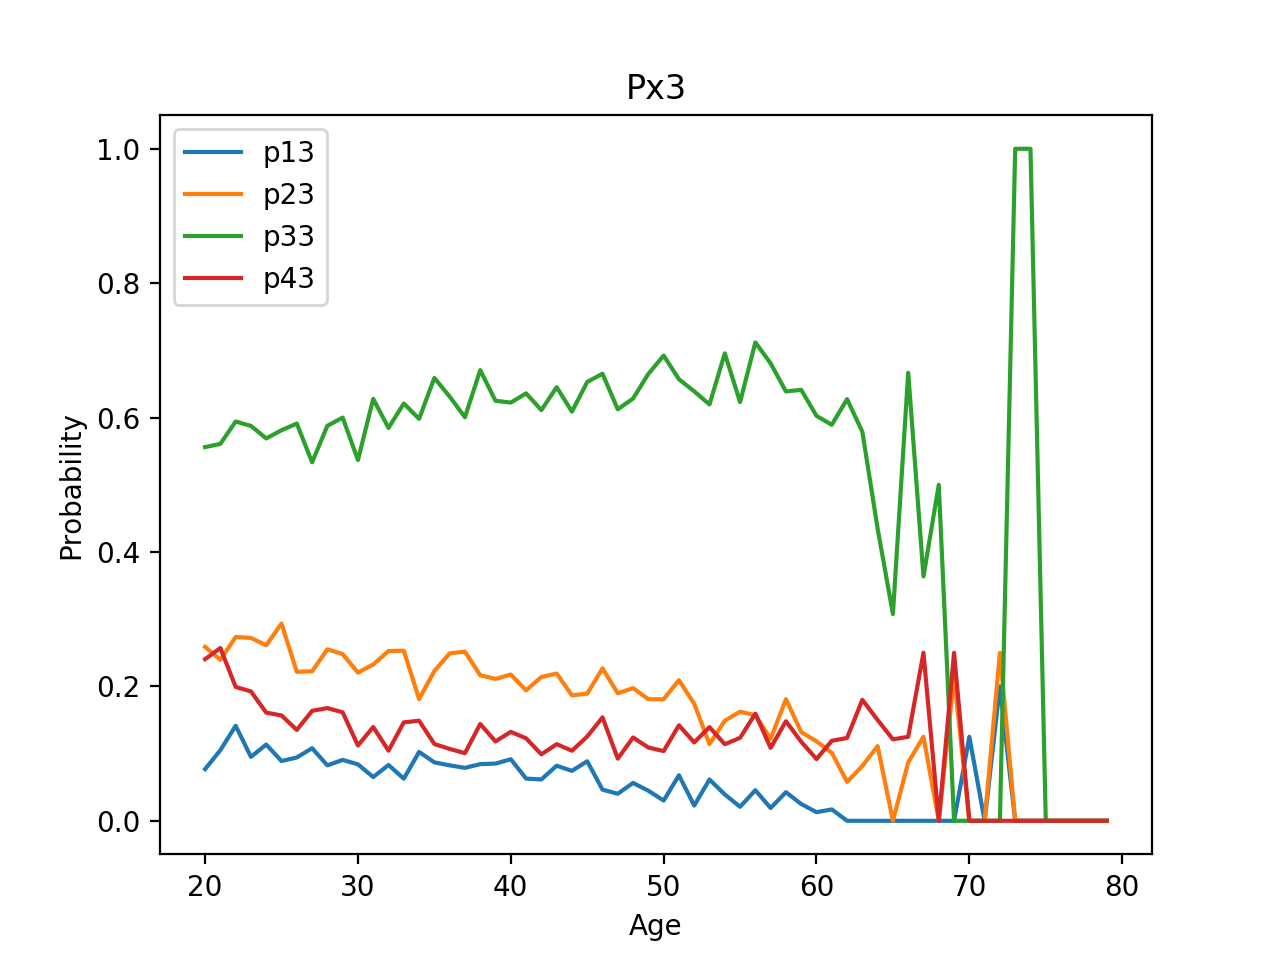

In [52]:
import matplotlib.pyplot as plt
wq13=[]
wq23=[]
wq33=[]
wq43=[]
for i in wifemarkov1:
    wq13.append(i[0][2])
    wq23.append(i[1][2])
    wq33.append(i[2][2])
    wq43.append(i[3][2])
age=np.arange(20,20+len(wq11))
%matplotlib notebook
plt.plot(age,wq13,label='p13')
plt.plot(age,wq23,label='p23')
plt.plot(age,wq33,label='p33')
plt.plot(age,wq43,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3')
plt.legend()

<IPython.core.display.Javascript object>


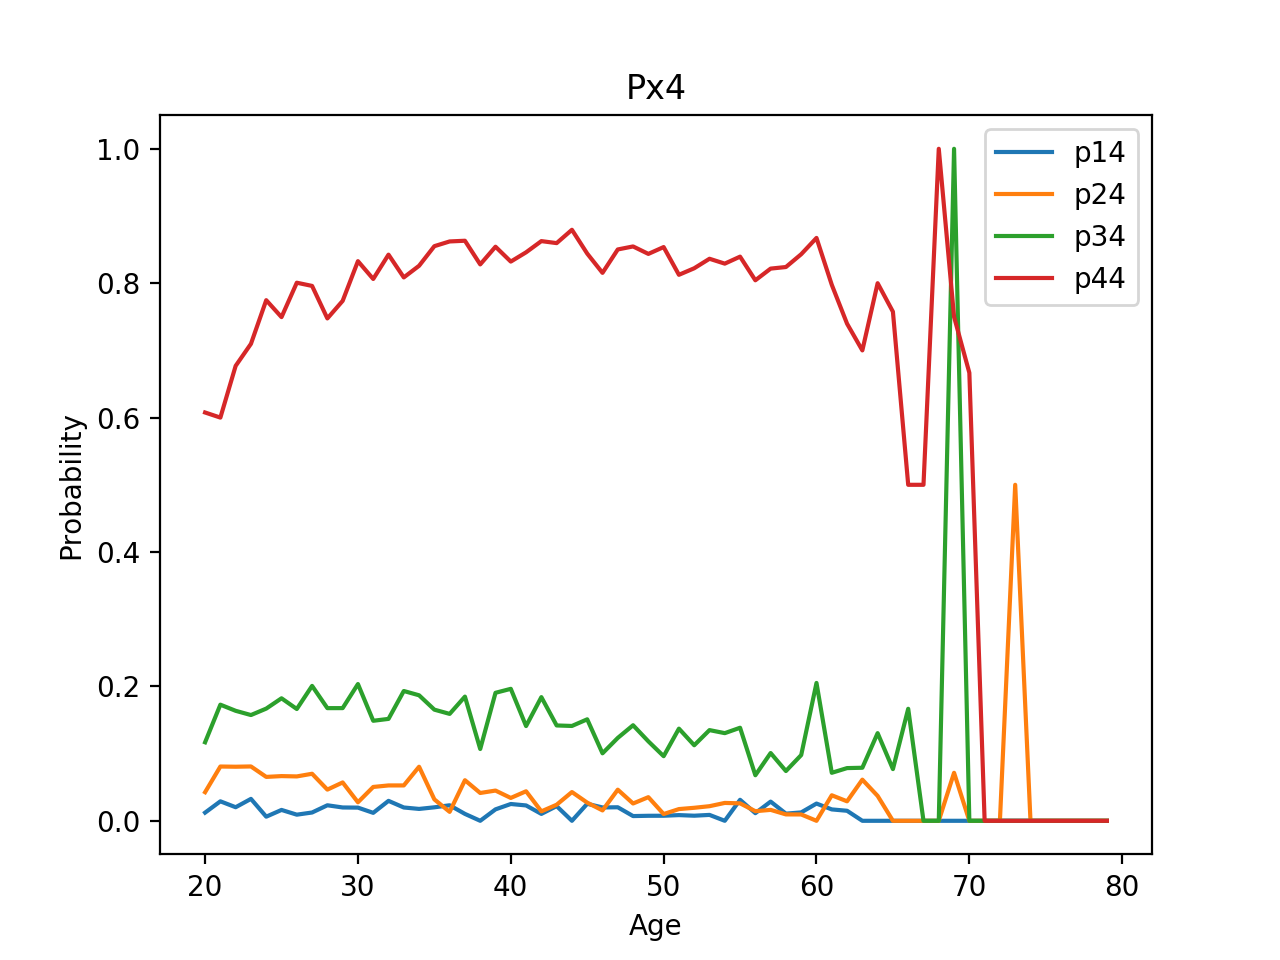

In [51]:
import matplotlib.pyplot as plt
wq14=[]
wq24=[]
wq34=[]
wq44=[]
for i in wifemarkov1:
    wq14.append(i[0][3])
    wq24.append(i[1][3])
    wq34.append(i[2][3])
    wq44.append(i[3][3])
age=np.arange(20,20+len(wq11))
%matplotlib notebook
plt.plot(age,wq14,label='p14')
plt.plot(age,wq24,label='p24')
plt.plot(age,wq34,label='p34')
plt.plot(age,wq44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px4')
plt.legend()

<IPython.core.display.Javascript object>


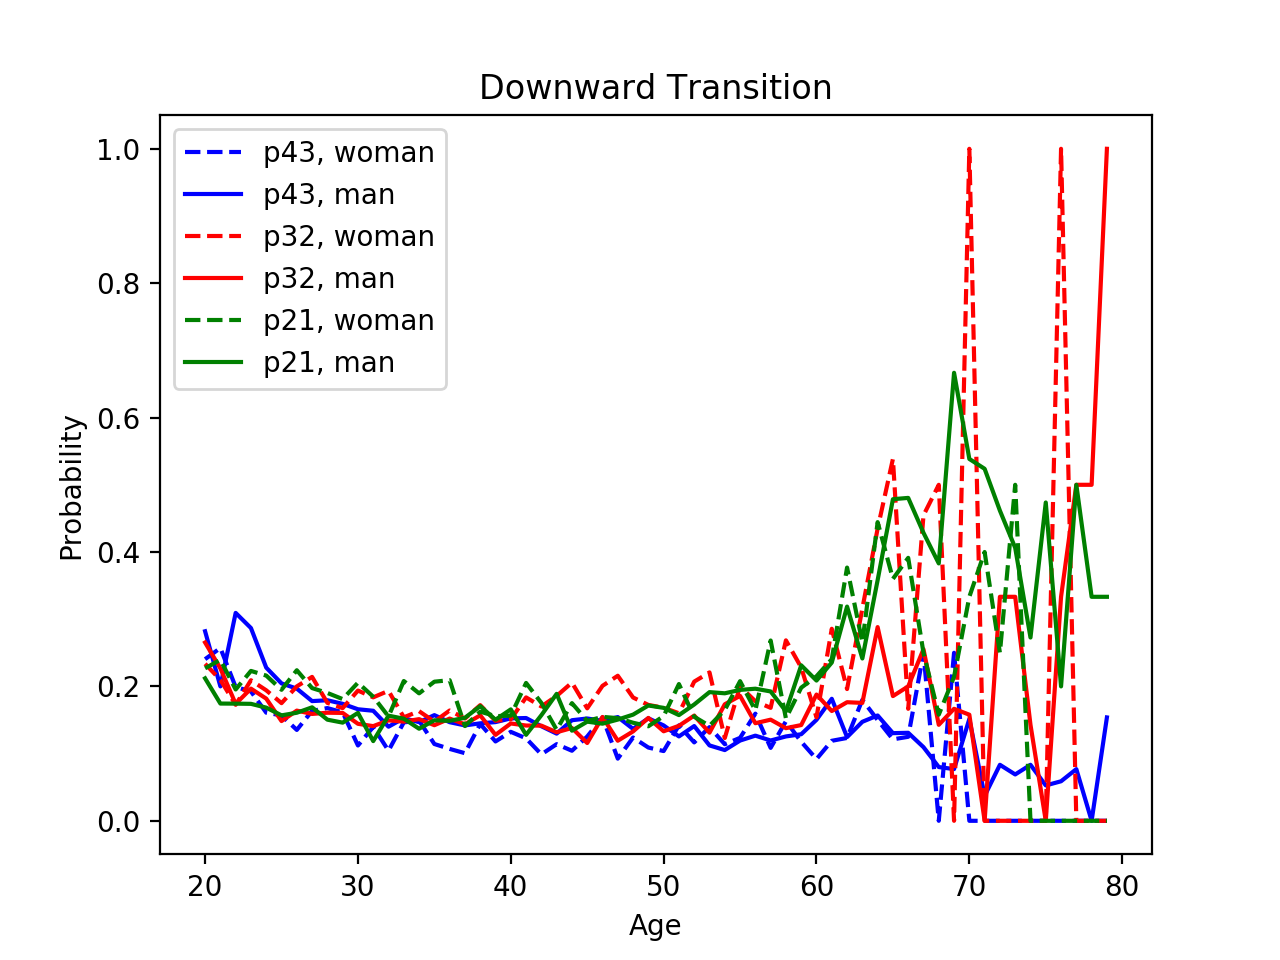

In [53]:
%matplotlib notebook
plt.plot(age,wq43,color='blue', linestyle='dashed', label='p43, woman')
plt.plot(age,q43, color='blue', label='p43, man')
plt.plot(age,wq32,color='red', linestyle='dashed',label='p32, woman')
plt.plot(age,q32,color='red', label='p32, man')
plt.plot(age,wq21,color='green', linestyle='dashed',label='p21, woman')
plt.plot(age,q21,color='green', label='p21, man')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward Transition')
plt.legend()

<IPython.core.display.Javascript object>


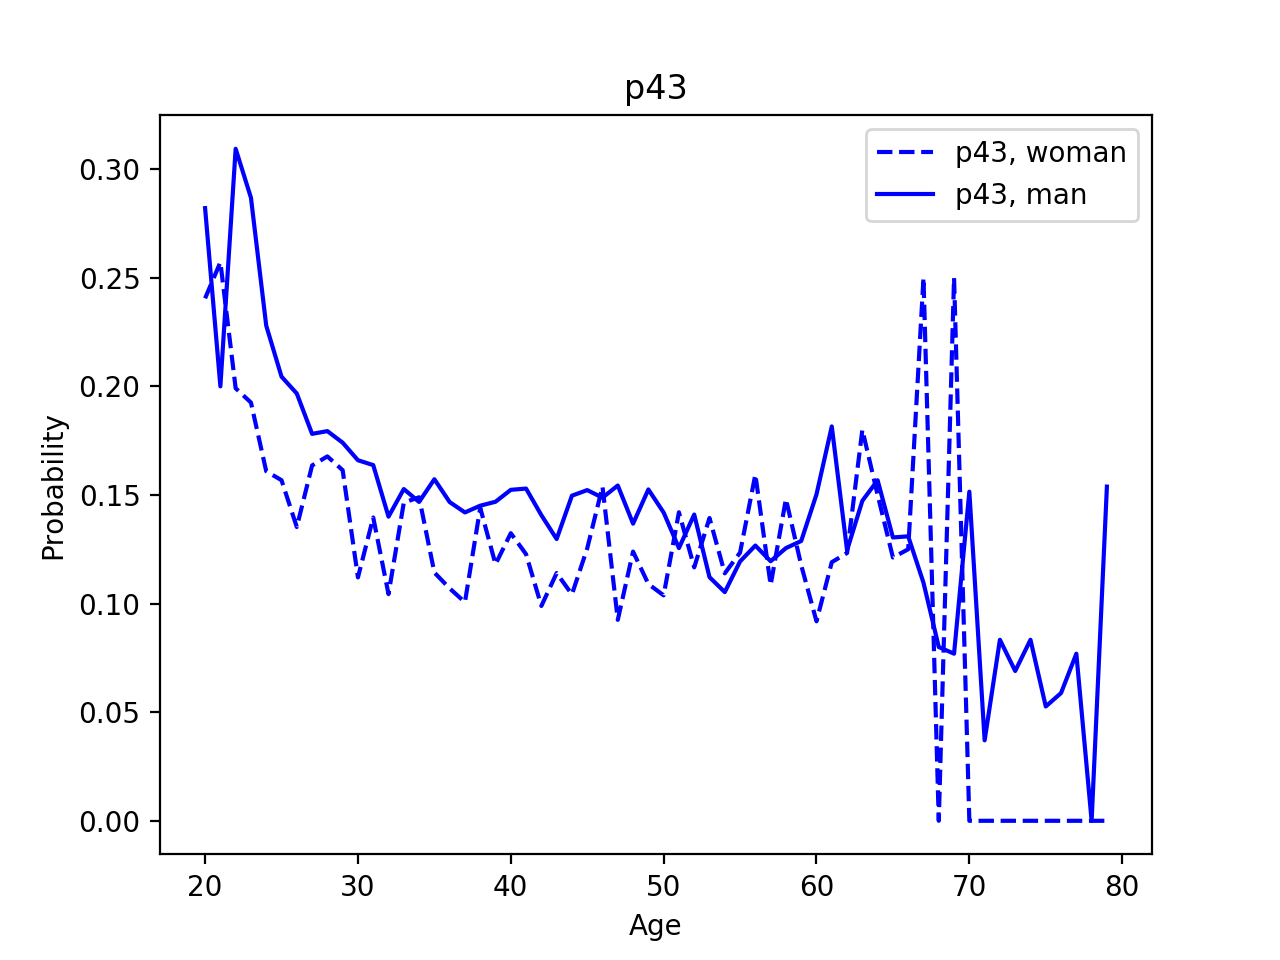

In [195]:
%matplotlib notebook
plt.plot(age,wq43,color='blue', linestyle='dashed', label='p43, woman')
plt.plot(age,q43, color='blue', label='p43, man')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('p43')
plt.legend()

<IPython.core.display.Javascript object>


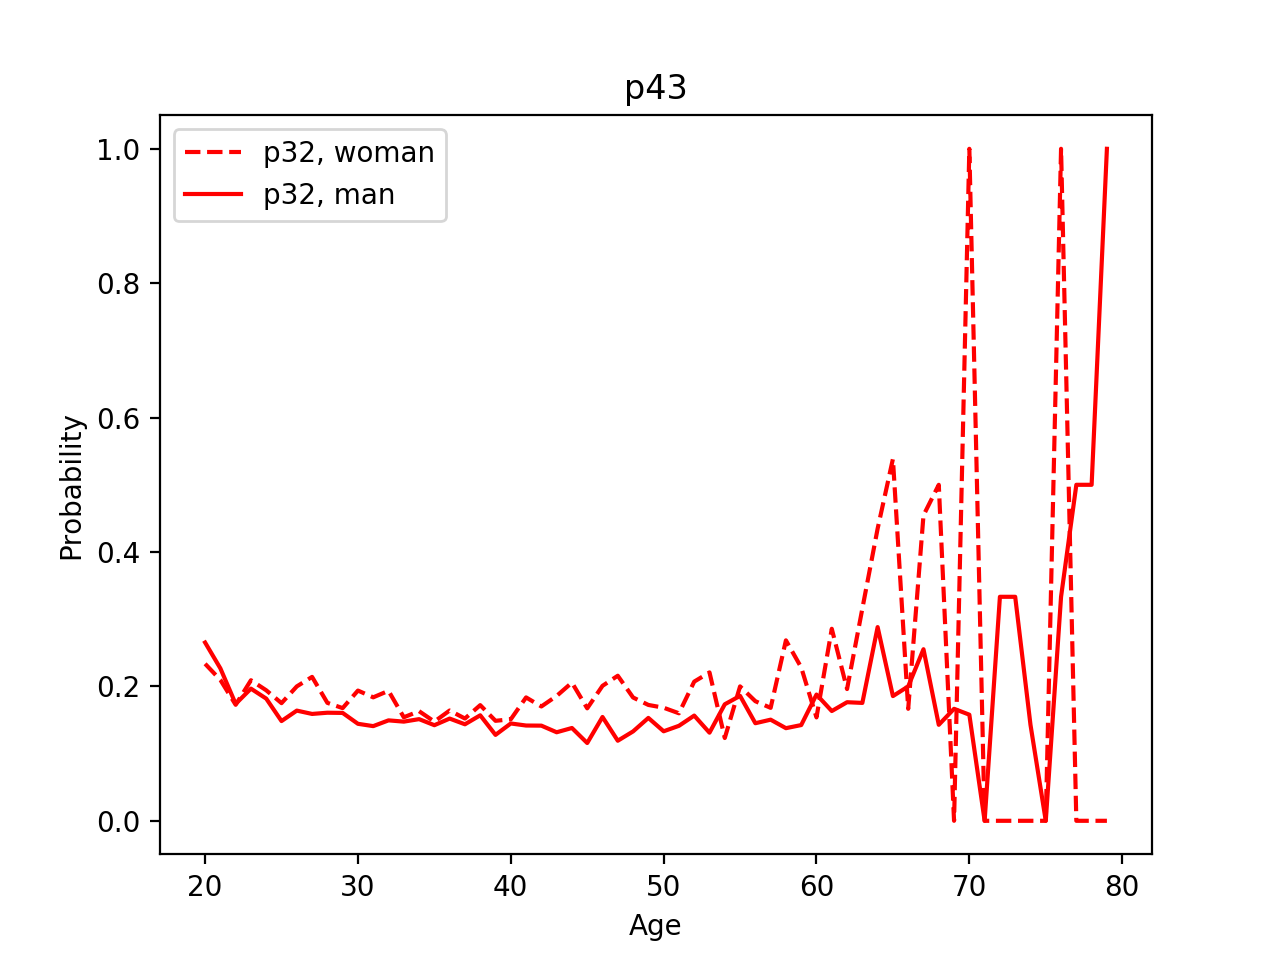

In [196]:
%matplotlib notebook
plt.plot(age,wq32,color='red', linestyle='dashed',label='p32, woman')
plt.plot(age,q32,color='red', label='p32, man')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('p43')
plt.legend()

<IPython.core.display.Javascript object>


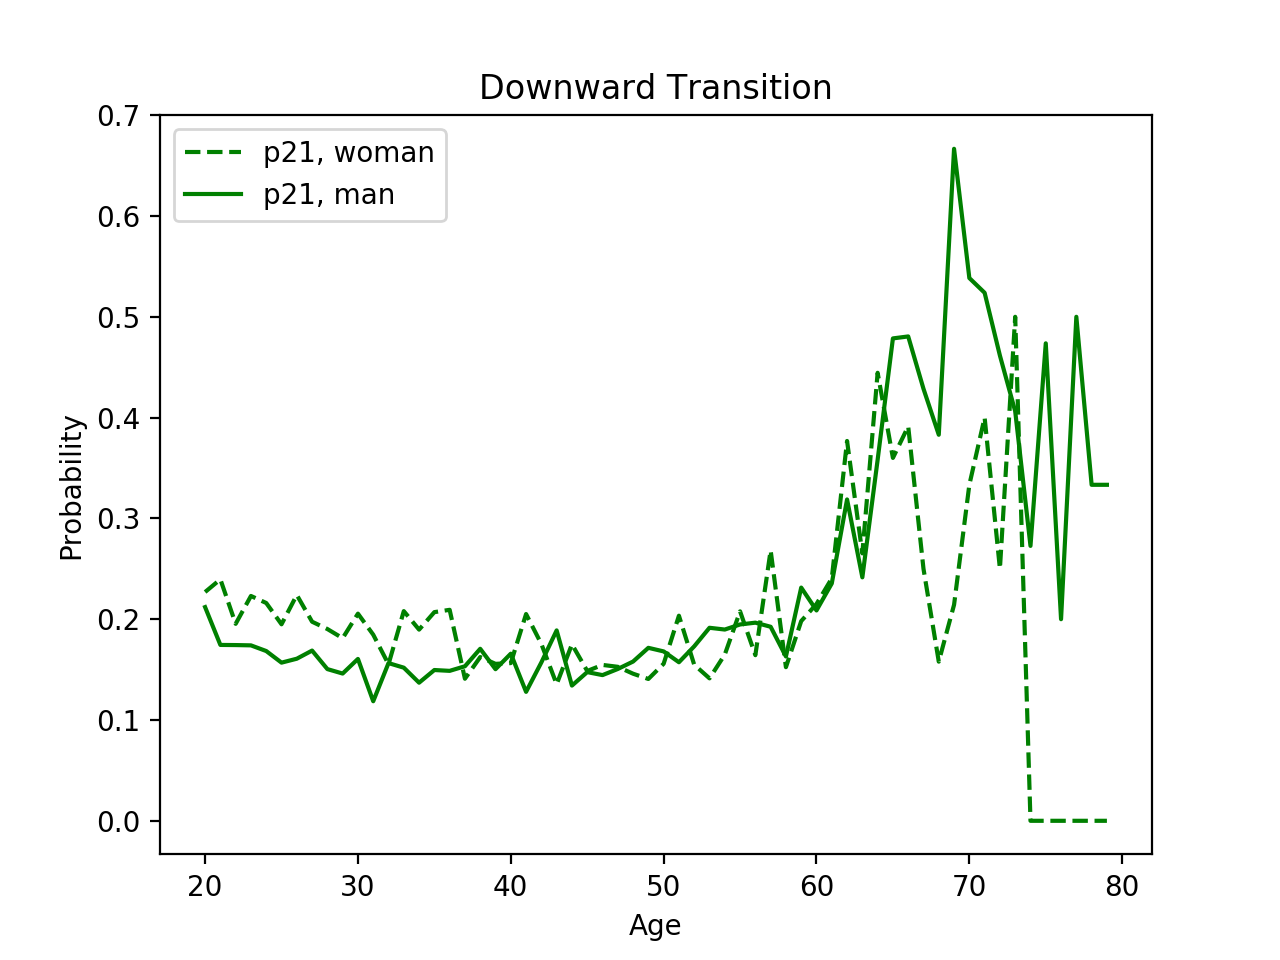

In [197]:
%matplotlib notebook
plt.plot(age,wq21,color='green', linestyle='dashed',label='p21, woman')
plt.plot(age,q21,color='green', label='p21, man')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Downward Transition')
plt.legend()

<IPython.core.display.Javascript object>


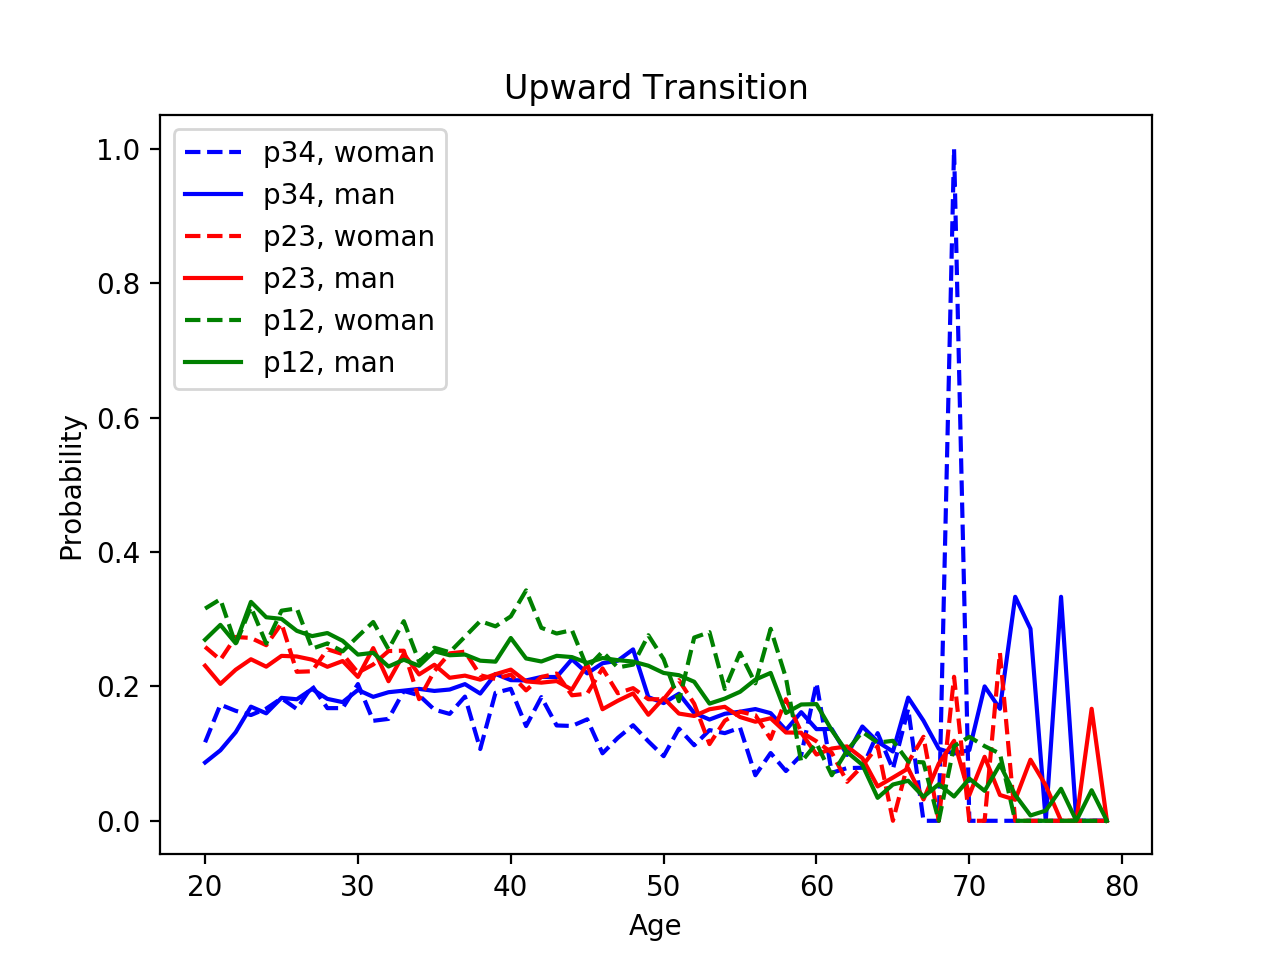

In [54]:
%matplotlib notebook
plt.plot(age,wq34,color='blue', linestyle='dashed', label='p34, woman')
plt.plot(age,q34, color='blue', label='p34, man')
plt.plot(age,wq23,color='red', linestyle='dashed',label='p23, woman')
plt.plot(age,q23,color='red', label='p23, man')
plt.plot(age,wq12,color='green', linestyle='dashed',label='p12, woman')
plt.plot(age,q12,color='green', label='p12, man')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Upward Transition')
plt.legend()

<IPython.core.display.Javascript object>


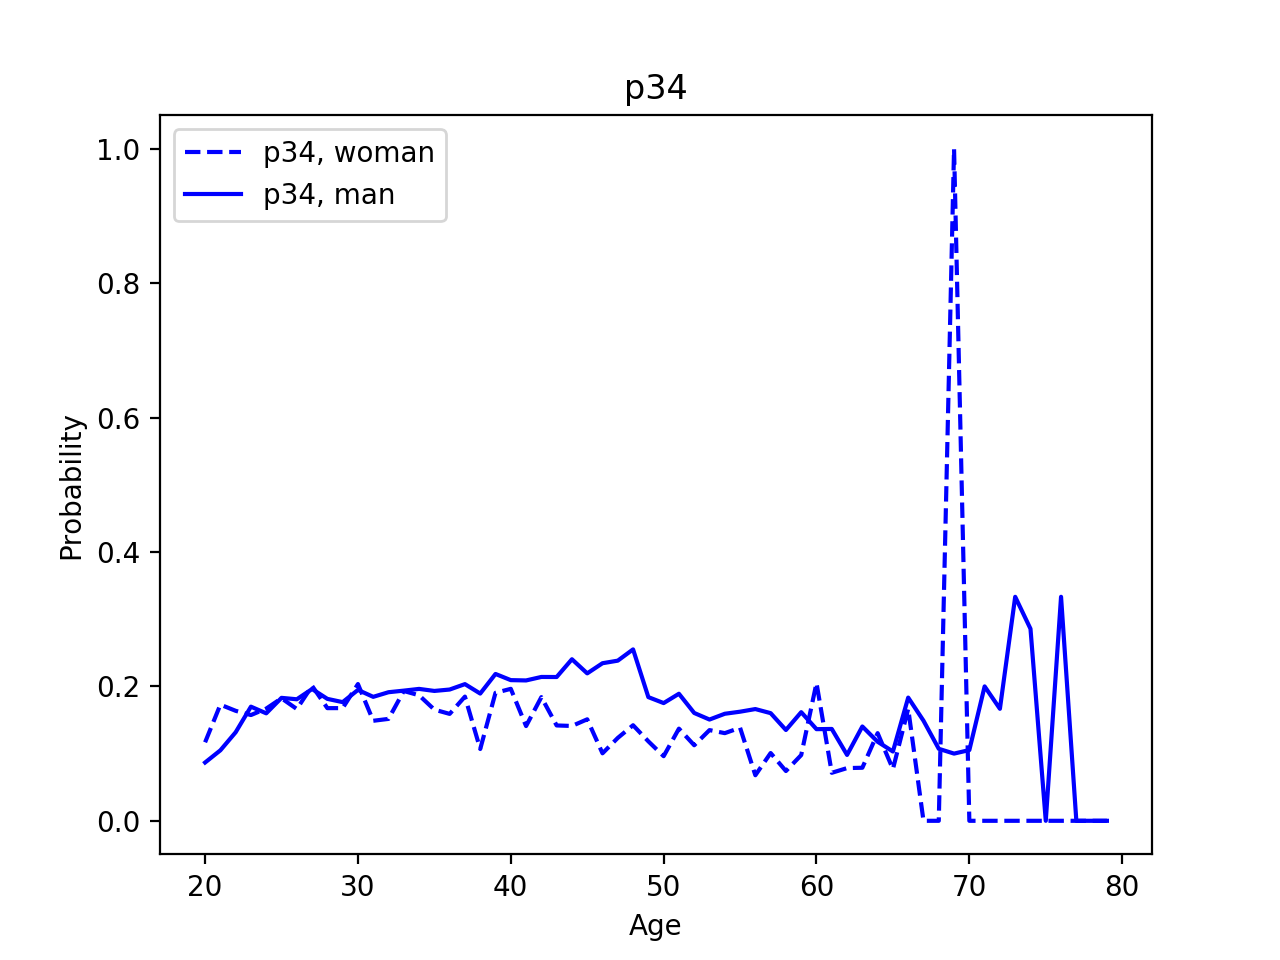

In [198]:
%matplotlib notebook
plt.plot(age,wq34,color='blue', linestyle='dashed', label='p34, woman')
plt.plot(age,q34, color='blue', label='p34, man')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('p34')
plt.legend()

<IPython.core.display.Javascript object>


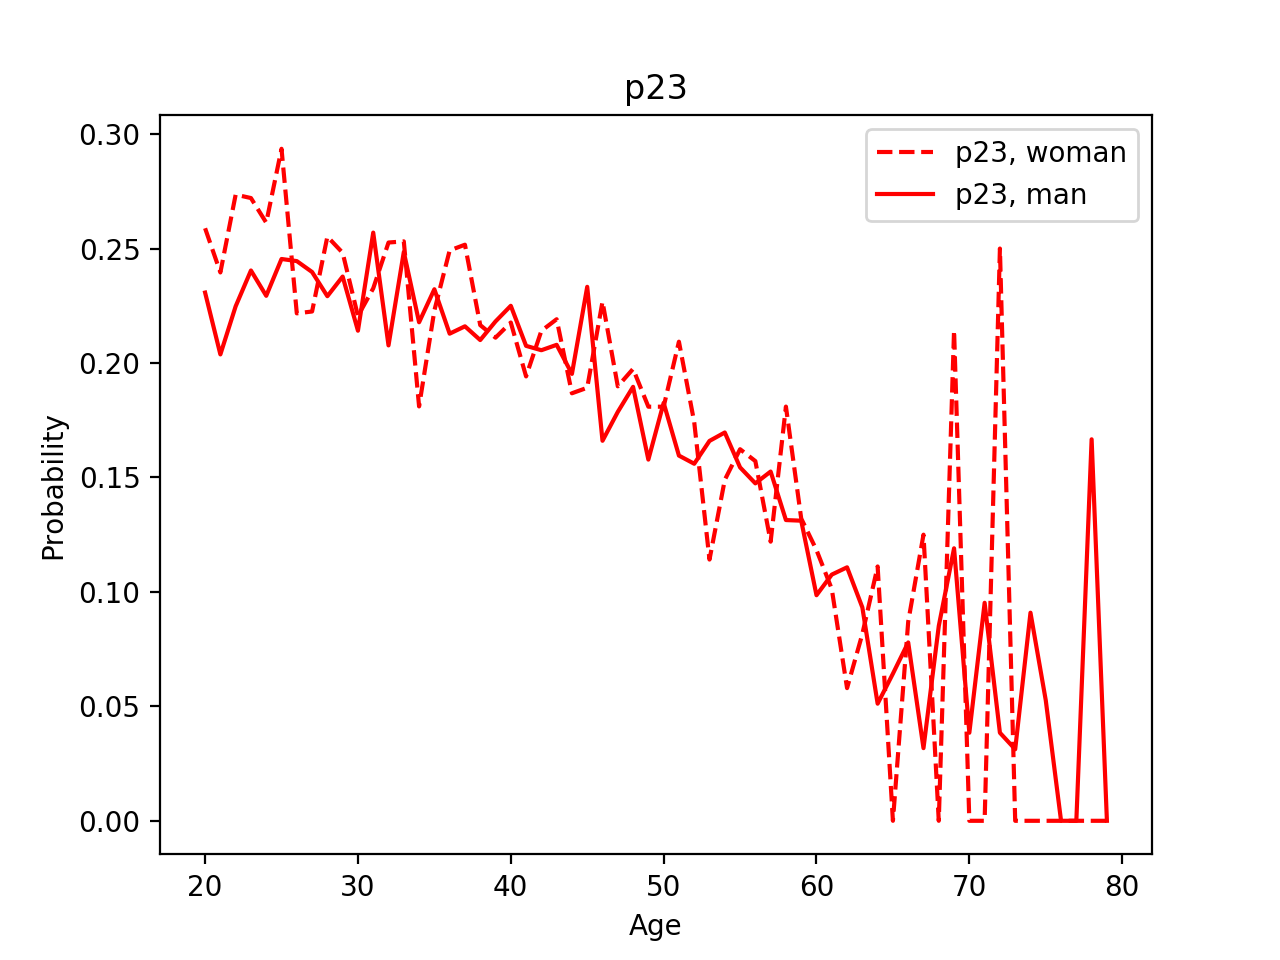

In [199]:
%matplotlib notebook
plt.plot(age,wq23,color='red', linestyle='dashed',label='p23, woman')
plt.plot(age,q23,color='red', label='p23, man')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('p23')
plt.legend()

<IPython.core.display.Javascript object>


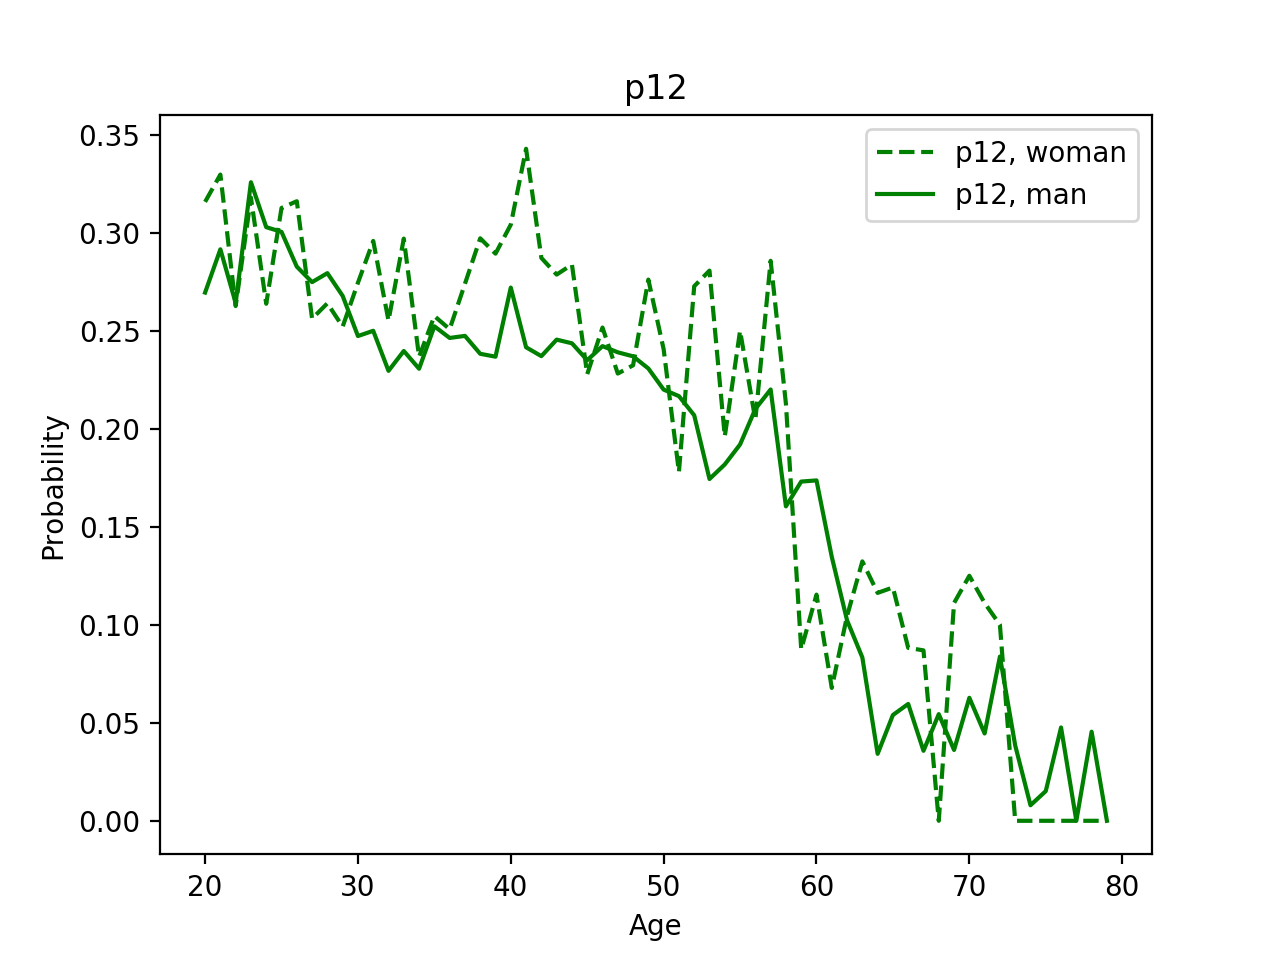

In [200]:
%matplotlib notebook
plt.plot(age,wq12,color='green', linestyle='dashed',label='p12, woman')
plt.plot(age,q12,color='green', label='p12, man')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('p12')
plt.legend()

## Findings:
1. p34 of men is higher than that of women
2. p43 of men is higher than that of women
3. p23 of women is higher than that of men

In [61]:
from bokeh.layouts import widgetbox
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, MultiSelect
from bokeh.plotting import figure, output_file, show
import pandas as pd
from bokeh.io import output_file, show
from bokeh.models.widgets import CheckboxGroup
import numpy as np
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

output_file("wifematrix.html")
wp = figure(width=1000, height=700, x_axis_type="datetime")
wp11=wq11
wp12=wq12
wp13=wq13
wp14=wq14
wp21=wq21
wp22=wq22
wp23=wq23
wp24=wq24
wp31=wq31
wp32=wq32
wp33=wq33
wp34=wq34
wp41=wq41
wp42=wq42
wp43=wq43
wp44=wq44
plots=[]
x=age
color=['green', 'orange', 'yellow', 'blue',\
       'purple', 'cyan', 'pink', 'black', 'chocolate', \
       'red', 'gray', 'brown', 'burlywood', 'cadetblue', 'chartreuse','navy']
allp=[wp11,wp12,wp13,wp14,wp21,wp22,wp23,wp24,wp31,wp32,wp33,wp34,wp41,wp42,wp43,wp44]
strp=["p11", "p12", "p13",'p14',"p21", "p22", \
                                       "p23",'p24',"p31", "p32", "p33",'p34',\
                                       "p41", "p42", "p43",'p44']
for i in range(0,16):
    source = ColumnDataSource(data=dict(x=x, y=allp[i]))
    plt = wp.line('x', 'y', line_width=2,  alpha=0.8, color=color[i],source=source,legend=strp[i])
    plots.append(plt)
checkbox_groupwife = CheckboxGroup(labels=["p11", "p12", "p13",'p14',"p21", "p22", \
                                       "p23",'p24',"p31", "p32", "p33",'p34',\
                                       "p41", "p42", "p43",'p44'], active=list(range(0,16)))
args=dict(line0=plots[0],line1=plots[1], line2=plots[2], line3=plots[3],line4=plots[4], line5=plots[5], line6=plots[6],\
         line7=plots[7], line8=plots[8], line9=plots[9],line10=plots[10], line11=plots[11], line12=plots[12],\
         line13=plots[13], line14=plots[14], line15=plots[15])
checkbox_groupwife.callback = CustomJS(args = args,  code=""" 
        //console.log(cb_obj.active);
        line0.visible = false;
        line1.visible = false;
        line2.visible = false;
        line3.visible = false;
        line4.visible = false;
        line5.visible = false;
        line6.visible = false;
        line7.visible = false;
        line8.visible = false;
        line9.visible = false;
        line10.visible = false;
        line11.visible = false;
        line12.visible = false;
        line13.visible = false;
        line14.visible = false;
        line15.visible = false;

        for (i in cb_obj.active) {
            //console.log(cb_obj.active[i]);
            if (cb_obj.active[i] == 0) {
                line0.visible = true;
            } else if (cb_obj.active[i] == 1) {
                line1.visible = true;
            } else if (cb_obj.active[i] == 2) {
                line2.visible = true;
            } else if (cb_obj.active[i] == 3) {
                line3.visible = true;
            } else if (cb_obj.active[i] == 4) {
                line4.visible = true;
            } else if (cb_obj.active[i] == 5) {
                line5.visible = true;
            } else if (cb_obj.active[i] == 6) {
                line6.visible = true;
            } else if (cb_obj.active[i] == 7) {
                line7.visible = true;
            } else if (cb_obj.active[i] == 8) {
                line8.visible = true;
            } else if (cb_obj.active[i] == 9) {
                line9.visible = true;
            } else if (cb_obj.active[i] == 10) {
                line10.visible = true;
            } else if (cb_obj.active[i] == 11) {
                line11.visible = true;
            } else if (cb_obj.active[i] == 12) {
                line12.visible = true;
            } else if (cb_obj.active[i] == 13) {
                line13.visible = true;
            } else if (cb_obj.active[i] == 14) {
                line14.visible = true;
            } else if (cb_obj.active[i] == 15) {
                line15.visible = true;
            }
        }
    """)

layoutw = row(wp, widgetbox(checkbox_groupwife), sizing_mode='fixed')

show(layoutw)

The findings for women are similar to men.

# 2. linking location variable

In [62]:
statedata = xlrd.open_workbook('/Users/fulinguo/Desktop/chetty.xlsx')
table1 = statedata.sheets()[0]
nrows1 = table1.nrows
columns1=table1.row_values(0)
state0=[]
for i in range(1,nrows1):
    state0.append(table1.row_values(i))
state0=np.array(state0)
state0=pd.DataFrame(state0,columns=columns1)
state0['Gini'] = state0['Gini'].astype(float)
state0['Violent Crime Rate'] = pd.to_numeric(state0['Violent Crime Rate'],errors='coerce')
state0['High School Dropout Rate (Income Adjusted)'] = pd.to_numeric(state0['High School Dropout Rate (Income Adjusted)'],errors='coerce')

In [63]:
stateinf=state0.groupby('State')[['Gini', 'Violent Crime Rate','High School Dropout Rate (Income Adjusted)']].mean()
stateinf['inequality']=stateinf['Gini']>=stateinf['Gini'].median()
stateinf['violent']=stateinf['Violent Crime Rate']>=stateinf['Violent Crime Rate'].median()
stateinf['education']=stateinf['High School Dropout Rate (Income Adjusted)']>=stateinf['High School Dropout Rate (Income Adjusted)'].median()
statecodes=[50,1,3,2,4,5,6,8,7,9,10,51,14,11,12,13,15,16,17,20,19,18,21,22,24,23,25,32,33,26,28,29,30,27,31,34,35,36,37,
           38, 39,40,41,42,43,45,44,46,48,47,49]
stateinf['code']=statecodes
stateinf['education']['CT']=True
stateinf['education']['VT']=True # since lack of high school dropout rate data, using colleges per capital for these two states

/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [64]:
lll=[]
llh=[]
lhl=[]
lhh=[]
hll=[]
hlh=[]
hhl=[]
hhh=[]
for j in range(len(stateinf)):
    ine=stateinf['inequality'][j]
    vio=stateinf['violent'][j]
    edu=stateinf['education'][j]
    if ine & vio & edu:
        hhh.append(stateinf['code'][j])
    elif ine & vio & (edu==False):
        hhl.append(stateinf['code'][j])
    elif ine & (vio==False) & edu:
        hlh.append(stateinf['code'][j])
    elif ine & (vio==False) & (edu==False):
        hll.append(stateinf['code'][j])
    elif (ine==False) & vio & edu:
        lhh.append(stateinf['code'][j])
    elif (ine==False) & (vio==False) & edu:
        llh.append(stateinf['code'][j])
    elif (ine==False) & vio & (edu==False):
        lhl.append(stateinf['code'][j])
    else:
        lll.append(stateinf['code'][j])

In [65]:
print('High inequality, High crime rate, High high school drop out rate:',hhh)
print('High inequality, High crime rate, Low high school drop out rate:',hhl)
print('High inequality, Low crime rate, High high school drop out rate:',hlh)
print('High inequality, Low crime rate, Low high school drop out rate:',hll)
print('Low inequality, High crime rate, High high school drop out rate:',lhh)
print('Low inequality, Low crime rate, High high school drop out rate:',llh)
print('Low inequality, High crime rate, Low high school drop out rate:',lhl)
print('Low inequality, Low crime rate, Low high school drop out rate:',lll)

High inequality, High crime rate, High high school drop out rate: [1, 3, 2, 6, 7, 9, 10, 17, 20, 19, 23, 32, 38]
High inequality, High crime rate, Low high school drop out rate: [4, 29, 30, 31, 39, 41, 42]
High inequality, Low crime rate, High high school drop out rate: [8, 16, 28, 46]
High inequality, Low crime rate, Low high school drop out rate: [45, 47]
Low inequality, High crime rate, High high school drop out rate: [50, 12, 13, 35]
Low inequality, Low crime rate, High high school drop out rate: [51, 11, 24, 25, 44, 49]
Low inequality, High crime rate, Low high school drop out rate: [27, 37]
Low inequality, Low crime rate, Low high school drop out rate: [5, 14, 15, 18, 21, 22, 33, 26, 34, 36, 40, 43, 48]


In [66]:
headmarhhh=[[0]*16]*60
headmarhhl=[[0]*16]*60
headmarhlh=[[0]*16]*60
headmarhll=[[0]*16]*60
headmarlhh=[[0]*16]*60
headmarllh=[[0]*16]*60
headmarlhl=[[0]*16]*60
headmarlll=[[0]*16]*60
headmarhhh=np.array(headmarhhh)
headmarhhl=np.array(headmarhhl)
headmarhlh=np.array(headmarhlh)
headmarhll=np.array(headmarhll)
headmarlhh=np.array(headmarlhh)
headmarllh=np.array(headmarllh)
headmarlhl=np.array(headmarlhl)
headmarlll=np.array(headmarlll)

In [68]:
for i in range(len(income)):
    for j in range(len(headage_ind)-1):
        type=16
        age=income.values[i][hanum[j]]
        inc=income.values[i][hinum[j]]
        age2=income.values[i][hanum[j+1]] # set the period interval be 1 year
        inc2=income.values[i][hinum[j+1]]
        loc=income.values[i][stanum[j]]
            #elif j>=23:
            #age=income.values[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=79) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<headinc_quan[j][2]) & (inc2<headinc_quan[j+1][2]):
                type=0
            elif (inc<headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][2]) & (inc2<headinc_quan[j+1][1]):
                type=1
            elif (inc<headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][1]) & (inc2<headinc_quan[j+1][0]):
                type=2
            elif (inc<headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][0]):
                type=3
            elif (inc<headinc_quan[j][1]) & (inc>=headinc_quan[j][2]) & (inc2<headinc_quan[j+1][2]):
                type=4
            elif (inc<headinc_quan[j][1]) & (inc>=headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][2]) & (inc2<headinc_quan[j+1][1]):
                type=5
            elif (inc<headinc_quan[j][1]) & (inc>=headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][1]) & (inc2<headinc_quan[j+1][0]):
                type=6
            elif (inc<headinc_quan[j][1]) & (inc>=headinc_quan[j][2]) & (inc2>=headinc_quan[j+1][0]):
                type=7
            elif (inc<headinc_quan[j][0]) & (inc>=headinc_quan[j][1]) & (inc2<headinc_quan[j+1][2]):
                type=8
            elif (inc<headinc_quan[j][0]) & (inc>=headinc_quan[j][1]) & (inc2>=headinc_quan[j+1][2]) & (inc2<headinc_quan[j+1][1]):
                type=9
            elif (inc<headinc_quan[j][0]) & (inc>=headinc_quan[j][1]) & (inc2>=headinc_quan[j+1][1]) & (inc2<headinc_quan[j+1][0]):
                type=10
            elif (inc<headinc_quan[j][0]) & (inc>=headinc_quan[j][1]) & (inc2>=headinc_quan[j+1][0]):
                type=11
            elif (inc>=headinc_quan[j][0]) & (inc2<headinc_quan[j+1][2]):
                type=12
            elif (inc>=headinc_quan[j][0]) & (inc2>=headinc_quan[j+1][2]) & (inc2<headinc_quan[j+1][1]):
                type=13
            elif (inc>=headinc_quan[j][0]) & (inc2>=headinc_quan[j+1][1]) & (inc2<headinc_quan[j+1][0]):
                type=14
            elif (inc>=headinc_quan[j][0]) & (inc2>=headinc_quan[j+1][0]):
                type=15
            if loc in hhh:
                headmarhhh[int(age)-20][type]+=1
            if loc in hhl:
                headmarhhl[int(age)-20][type]+=1
            if loc in hlh:
                headmarhlh[int(age)-20][type]+=1
            if loc in hll:
                headmarhll[int(age)-20][type]+=1
            if loc in lhh:
                headmarlhh[int(age)-20][type]+=1
            if loc in llh:
                headmarllh[int(age)-20][type]+=1
            if loc in lhl:
                headmarlhl[int(age)-20][type]+=1
            if loc in lll:
                headmarlll[int(age)-20][type]+=1

In [116]:
headmarhhh=headmarhhh.reshape(60,4,4)
headmarhhl=headmarhhl.reshape(60,4,4)
headmarhll=headmarhll.reshape(60,4,4)
headmarhlh=headmarhlh.reshape(60,4,4)
headmarlhh=headmarlhh.reshape(60,4,4)
headmarllh=headmarllh.reshape(60,4,4)
headmarlhl=headmarlhl.reshape(60,4,4)
headmarlll=headmarlll.reshape(60,4,4)
headmarkovhhh=[]
headmarkovhhl=[]
headmarkovhlh=[]
headmarkovhll=[]
headmarkovlhh=[]
headmarkovllh=[]
headmarkovlhl=[]
headmarkovlll=[]
for i in range(len(headmarhhh)):
    for j in range(4):
        sum_quan=sum(headmarhhh[i][j])
        headmarhhh[i][j]/max(sum_quan,0.1)
        headmarkovhhh.append(headmarhhh[i][j]/max(sum_quan,0.1))
headmarkovhhh=np.array(headmarkovhhh)
headmarkovhhh=headmarkovhhh.reshape(60,4,4)
for i in range(len(headmarhhl)):
    for j in range(4):
        sum_quan=sum(headmarhhl[i][j])
        headmarhhl[i][j]/max(sum_quan,0.1)
        headmarkovhhl.append(headmarhhl[i][j]/max(sum_quan,0.1))
headmarkovhhl=np.array(headmarkovhhl)
headmarkovhhl=headmarkovhhl.reshape(60,4,4)
for i in range(len(headmarhll)):
    for j in range(4):
        sum_quan=sum(headmarhll[i][j])
        headmarhll[i][j]/max(sum_quan,0.1)
        headmarkovhll.append(headmarhll[i][j]/max(sum_quan,0.1))
headmarkovhll=np.array(headmarkovhll)
headmarkovhll=headmarkovhll.reshape(60,4,4)
for i in range(len(headmarhlh)):
    for j in range(4):
        sum_quan=sum(headmarhlh[i][j])
        headmarhlh[i][j]/max(sum_quan,0.1)
        headmarkovhlh.append(headmarhlh[i][j]/max(sum_quan,0.1))
headmarkovhlh=np.array(headmarkovhlh)
headmarkovhlh=headmarkovhlh.reshape(60,4,4)
for i in range(len(headmarlhh)):
    for j in range(4):
        sum_quan=sum(headmarlhh[i][j])
        headmarlhh[i][j]/max(sum_quan,0.1)
        headmarkovlhh.append(headmarlhh[i][j]/max(sum_quan,0.1))
headmarkovlhh=np.array(headmarkovlhh)
headmarkovlhh=headmarkovlhh.reshape(60,4,4)
for i in range(len(headmarllh)):
    for j in range(4):
        sum_quan=sum(headmarllh[i][j])
        headmarllh[i][j]/max(sum_quan,0.1)
        headmarkovllh.append(headmarllh[i][j]/max(sum_quan,0.1))
headmarkovllh=np.array(headmarkovllh)
headmarkovllh=headmarkovllh.reshape(60,4,4)
for i in range(len(headmarlhl)):
    for j in range(4):
        sum_quan=sum(headmarlhl[i][j])
        headmarlhl[i][j]/max(sum_quan,0.1)
        headmarkovlhl.append(headmarlhl[i][j]/max(sum_quan,0.1))
headmarkovlhl=np.array(headmarkovlhl)
headmarkovlhl=headmarkovlhl.reshape(60,4,4)
for i in range(len(headmarlll)):
    for j in range(4):
        sum_quan=sum(headmarlll[i][j])
        headmarlll[i][j]/max(sum_quan,0.1)
        headmarkovlll.append(headmarlll[i][j]/max(sum_quan,0.1))
headmarkovlll=np.array(headmarkovlll)
headmarkovlll=headmarkovlll.reshape(60,4,4)

<IPython.core.display.Javascript object>


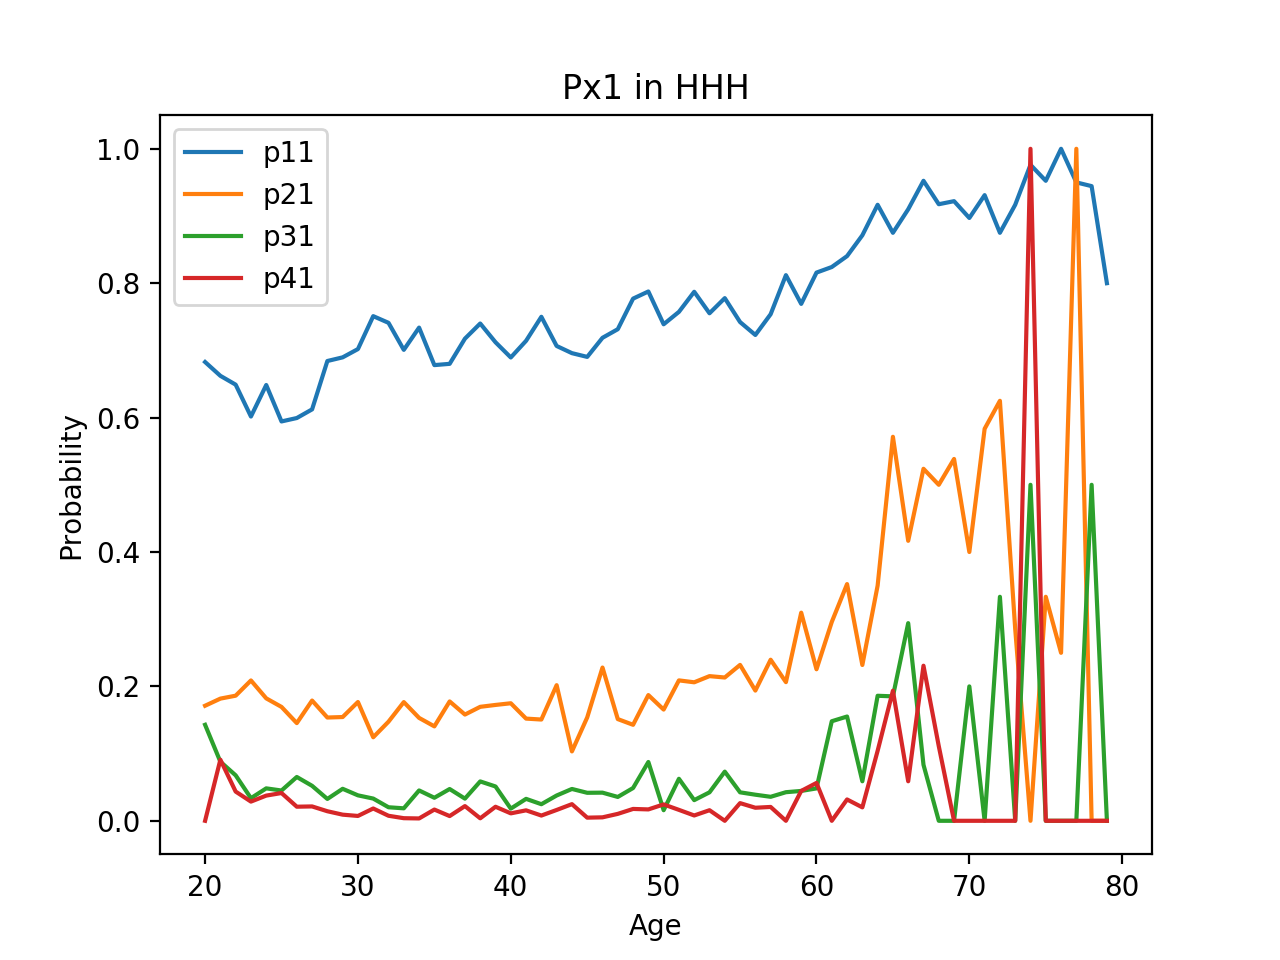

In [117]:
import matplotlib.pyplot as plt
hm11hhh=[]
hm21hhh=[]
hm31hhh=[]
hm41hhh=[]
for i in headmarkovhhh:
    hm11hhh.append(i[0][0])
    hm21hhh.append(i[1][0])
    hm31hhh.append(i[2][0])
    hm41hhh.append(i[3][0])
age=np.arange(20,20+len(hm11hhh))
headmarkov1.shape
%matplotlib notebook
plt.plot(age,hm11hhh,label='p11')
plt.plot(age,hm21hhh,label='p21')
plt.plot(age,hm31hhh,label='p31')
plt.plot(age,hm41hhh,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1 in HHH')
plt.legend()

<IPython.core.display.Javascript object>


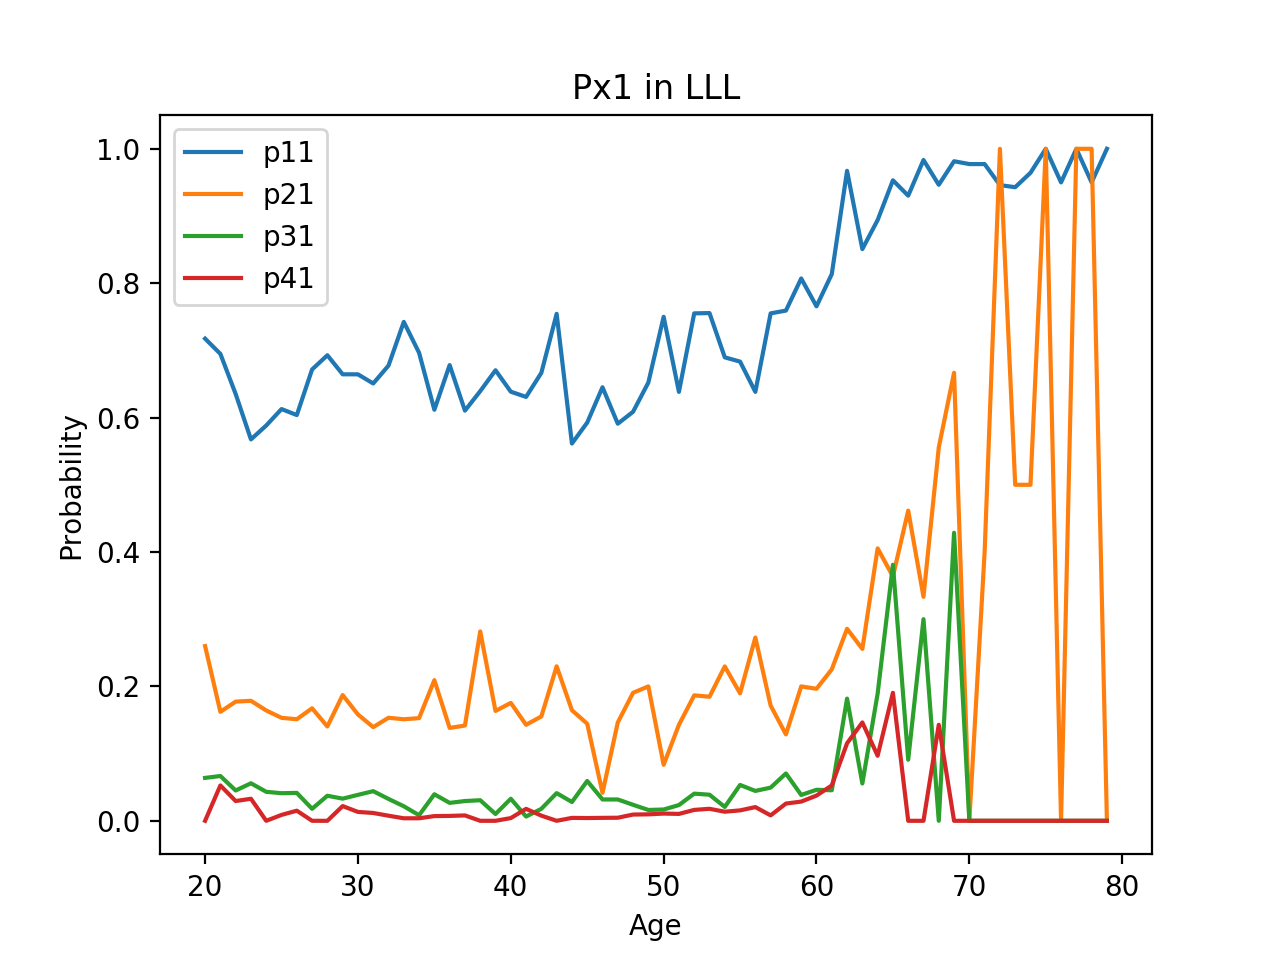

In [72]:
import matplotlib.pyplot as plt
hm11lll=[]
hm21lll=[]
hm31lll=[]
hm41lll=[]
for i in headmarkovlll:
    hm11lll.append(i[0][0])
    hm21lll.append(i[1][0])
    hm31lll.append(i[2][0])
    hm41lll.append(i[3][0])
age=np.arange(20,20+len(hm11lll))
%matplotlib notebook
plt.plot(age,hm11lll,label='p11')
plt.plot(age,hm21lll,label='p21')
plt.plot(age,hm31lll,label='p31')
plt.plot(age,hm41lll,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1 in LLL')
plt.legend()

<IPython.core.display.Javascript object>


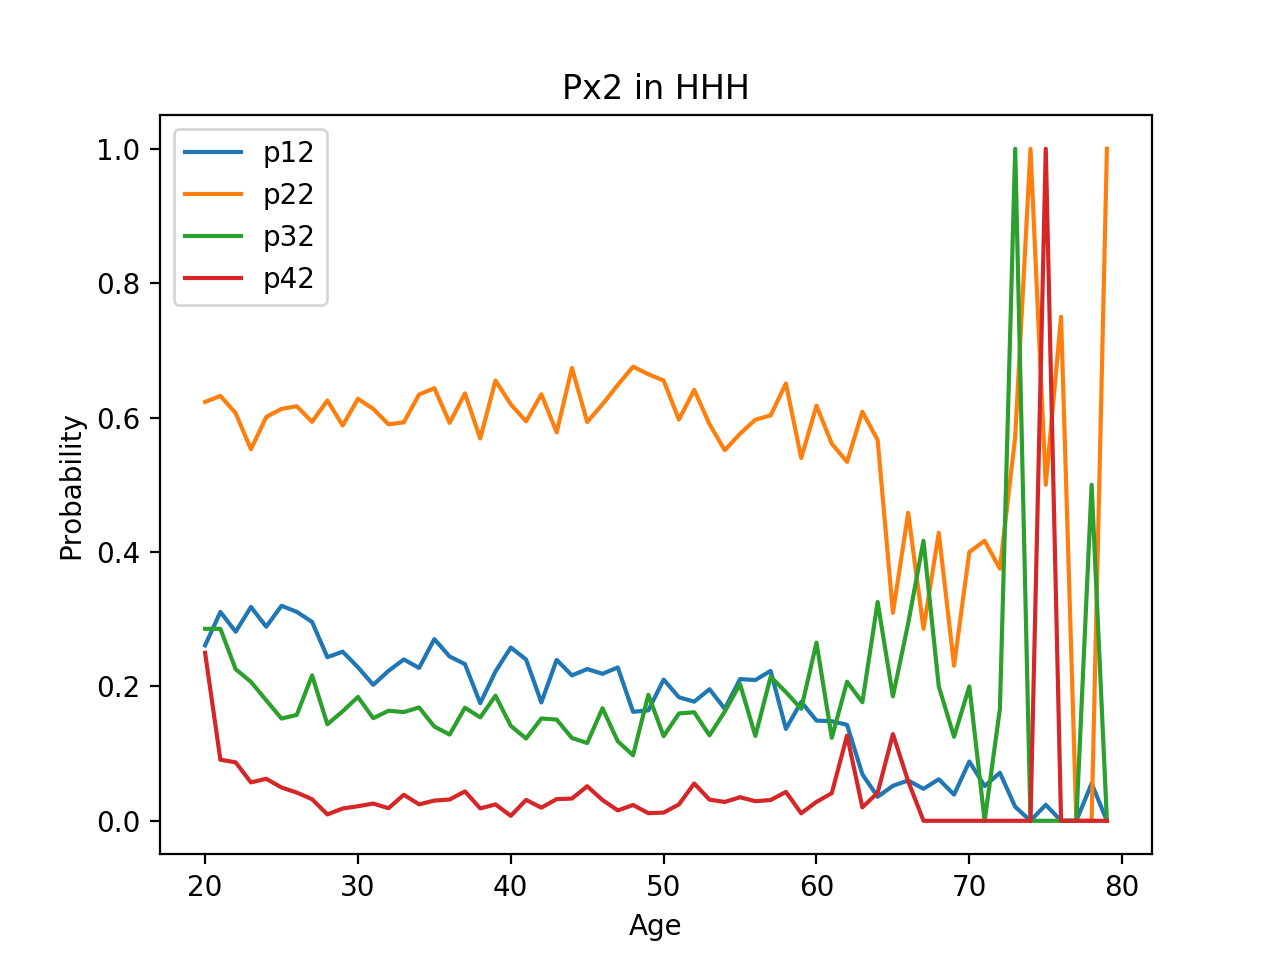

In [118]:
import matplotlib.pyplot as plt
hm12hhh=[]
hm22hhh=[]
hm32hhh=[]
hm42hhh=[]
for i in headmarkovhhh:
    hm12hhh.append(i[0][1])
    hm22hhh.append(i[1][1])
    hm32hhh.append(i[2][1])
    hm42hhh.append(i[3][1])
age=np.arange(20,20+len(hm11hhh))
headmarkov1.shape
%matplotlib notebook
plt.plot(age,hm12hhh,label='p12')
plt.plot(age,hm22hhh,label='p22')
plt.plot(age,hm32hhh,label='p32')
plt.plot(age,hm42hhh,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2 in HHH')
plt.legend()

<IPython.core.display.Javascript object>


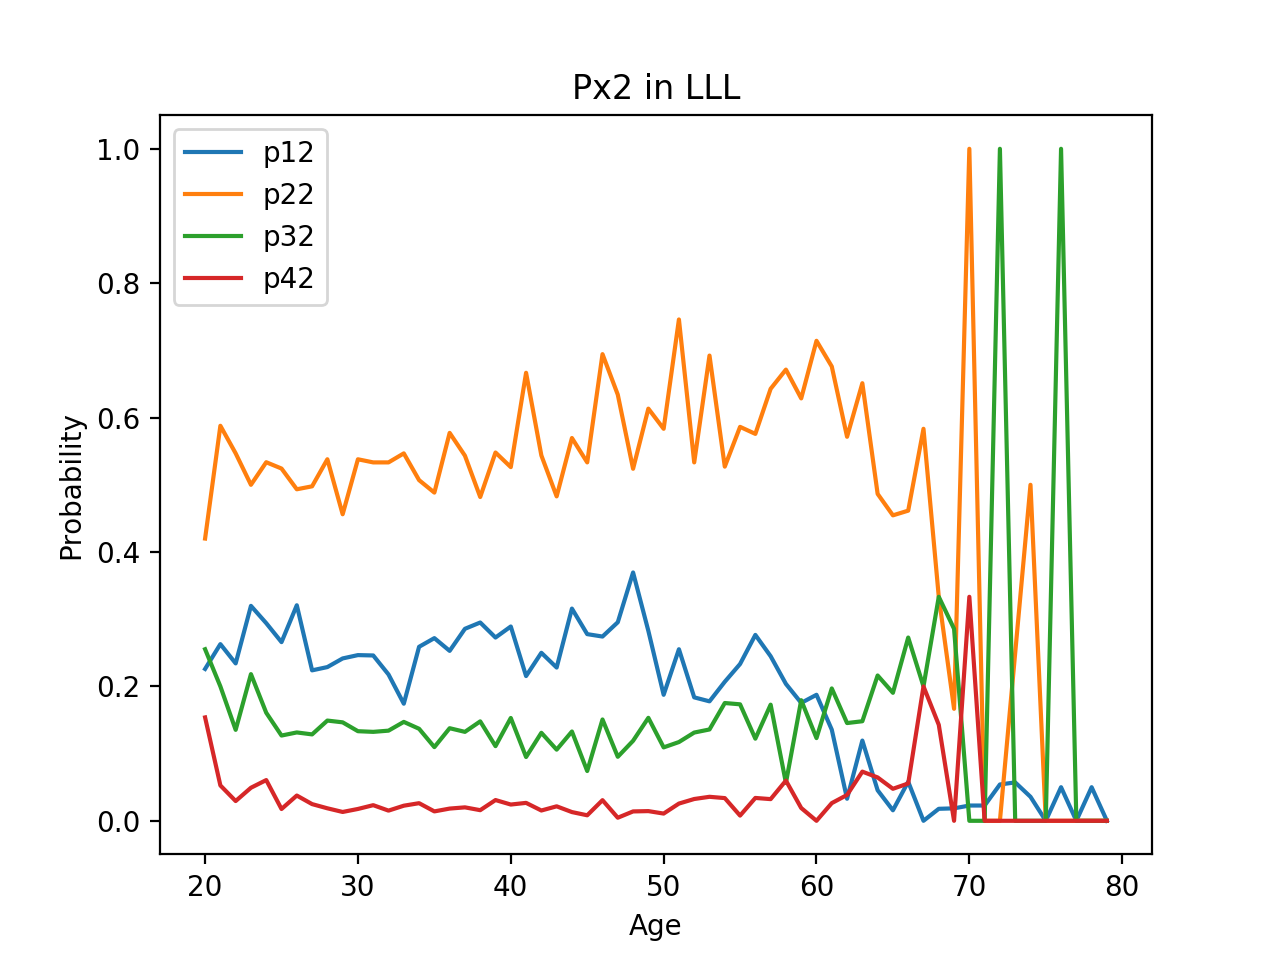

In [74]:
import matplotlib.pyplot as plt
hm12lll=[]
hm22lll=[]
hm32lll=[]
hm42lll=[]
for i in headmarkovlll:
    hm12lll.append(i[0][1])
    hm22lll.append(i[1][1])
    hm32lll.append(i[2][1])
    hm42lll.append(i[3][1])
age=np.arange(20,20+len(hm11lll))
%matplotlib notebook
plt.plot(age,hm12lll,label='p12')
plt.plot(age,hm22lll,label='p22')
plt.plot(age,hm32lll,label='p32')
plt.plot(age,hm42lll,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2 in LLL')
plt.legend()

<IPython.core.display.Javascript object>


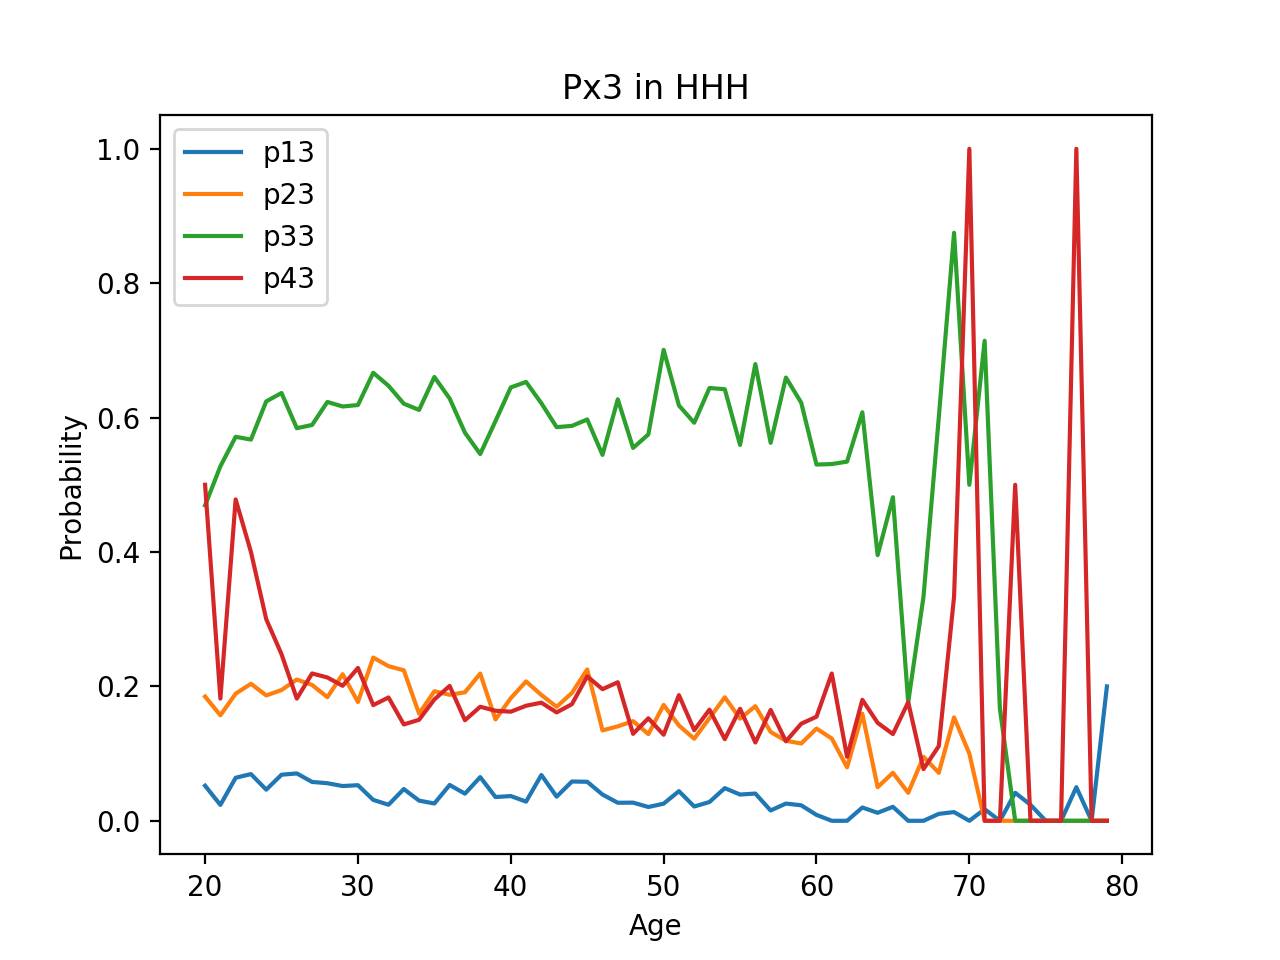

In [119]:
import matplotlib.pyplot as plt
hm13hhh=[]
hm23hhh=[]
hm33hhh=[]
hm43hhh=[]
for i in headmarkovhhh:
    hm13hhh.append(i[0][2])
    hm23hhh.append(i[1][2])
    hm33hhh.append(i[2][2])
    hm43hhh.append(i[3][2])
age=np.arange(20,20+len(hm11hhh))
%matplotlib notebook
plt.plot(age,hm13hhh,label='p13')
plt.plot(age,hm23hhh,label='p23')
plt.plot(age,hm33hhh,label='p33')
plt.plot(age,hm43hhh,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3 in HHH')
plt.legend()

<IPython.core.display.Javascript object>


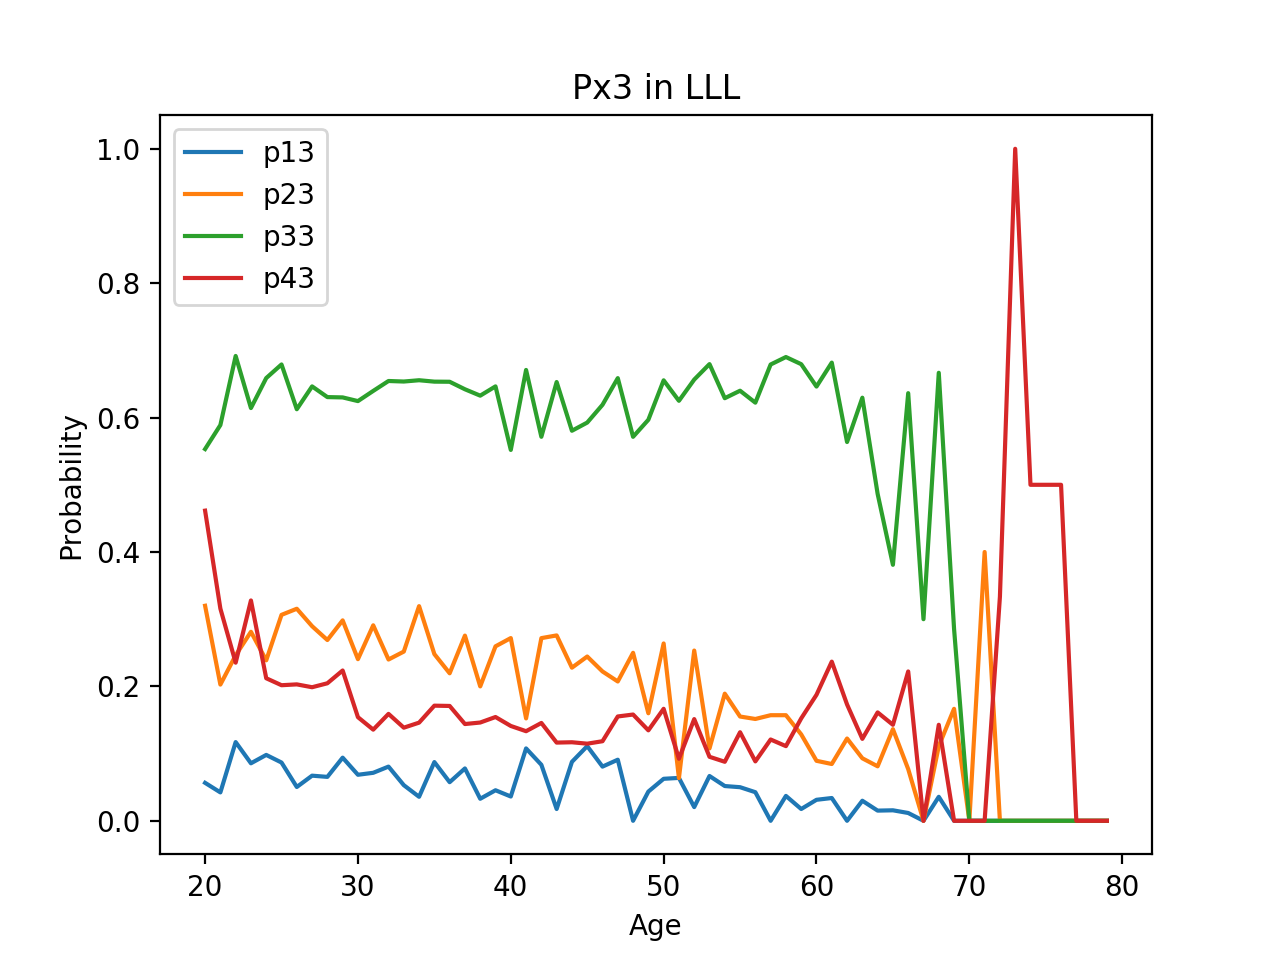

In [76]:
import matplotlib.pyplot as plt
hm13lll=[]
hm23lll=[]
hm33lll=[]
hm43lll=[]
for i in headmarkovlll:
    hm13lll.append(i[0][2])
    hm23lll.append(i[1][2])
    hm33lll.append(i[2][2])
    hm43lll.append(i[3][2])
age=np.arange(20,20+len(hm11lll))
%matplotlib notebook
plt.plot(age,hm13lll,label='p13')
plt.plot(age,hm23lll,label='p23')
plt.plot(age,hm33lll,label='p33')
plt.plot(age,hm43lll,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3 in LLL')
plt.legend()

<IPython.core.display.Javascript object>


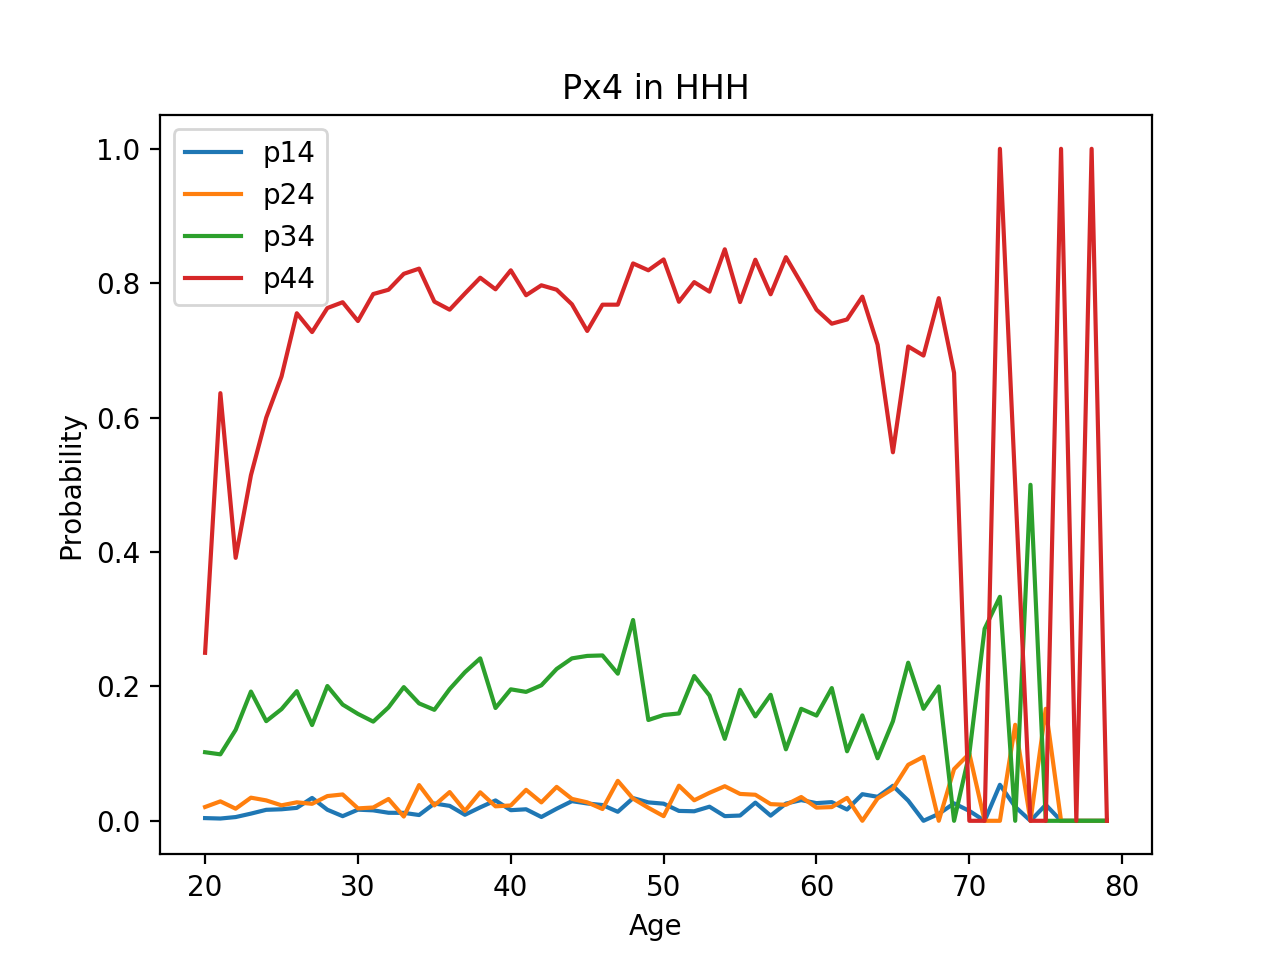

In [128]:
import matplotlib.pyplot as plt
hm14hhh=[]
hm24hhh=[]
hm34hhh=[]
hm44hhh=[]
for i in headmarkovhhh:
    hm14hhh.append(i[0][3])
    hm24hhh.append(i[1][3])
    hm34hhh.append(i[2][3])
    hm44hhh.append(i[3][3])
age=np.arange(20,20+len(hm11hhh))
%matplotlib notebook
plt.plot(age,hm14hhh,label='p14')
plt.plot(age,hm24hhh,label='p24')
plt.plot(age,hm34hhh,label='p34')
plt.plot(age,hm44hhh,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px4 in HHH')
plt.legend()

<IPython.core.display.Javascript object>


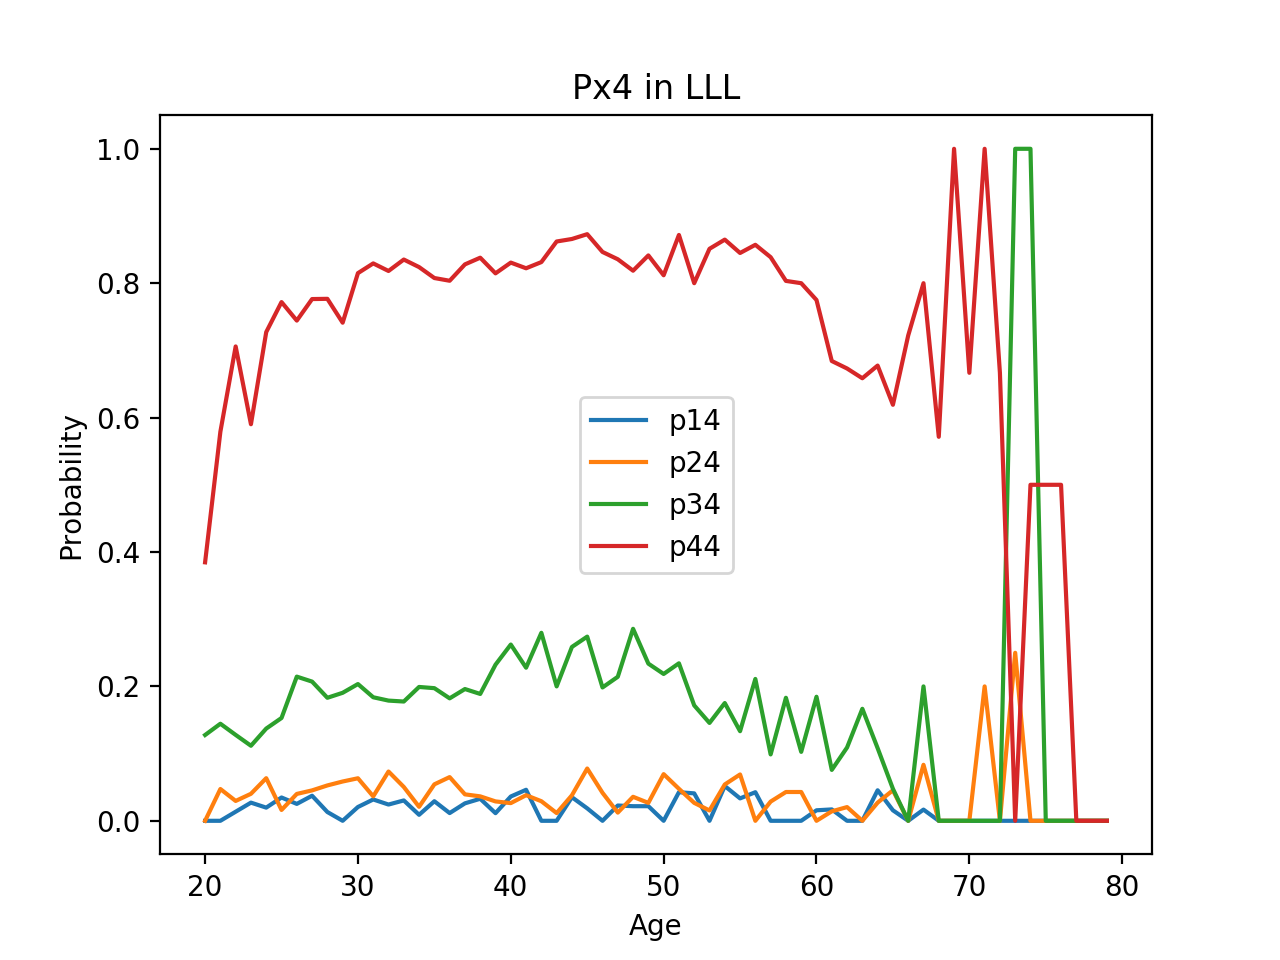

In [121]:
import matplotlib.pyplot as plt
hm14lll=[]
hm24lll=[]
hm34lll=[]
hm44lll=[]
for i in headmarkovlll:
    hm14lll.append(i[0][3])
    hm24lll.append(i[1][3])
    hm34lll.append(i[2][3])
    hm44lll.append(i[3][3])
age=np.arange(20,20+len(hm11hhh))
%matplotlib notebook
plt.plot(age,hm14lll,label='p14')
plt.plot(age,hm24lll,label='p24')
plt.plot(age,hm34lll,label='p34')
plt.plot(age,hm44lll,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px4 in LLL')
plt.legend()

In [185]:
age=np.arange(20,20+len(hm11hhh))

<IPython.core.display.Javascript object>


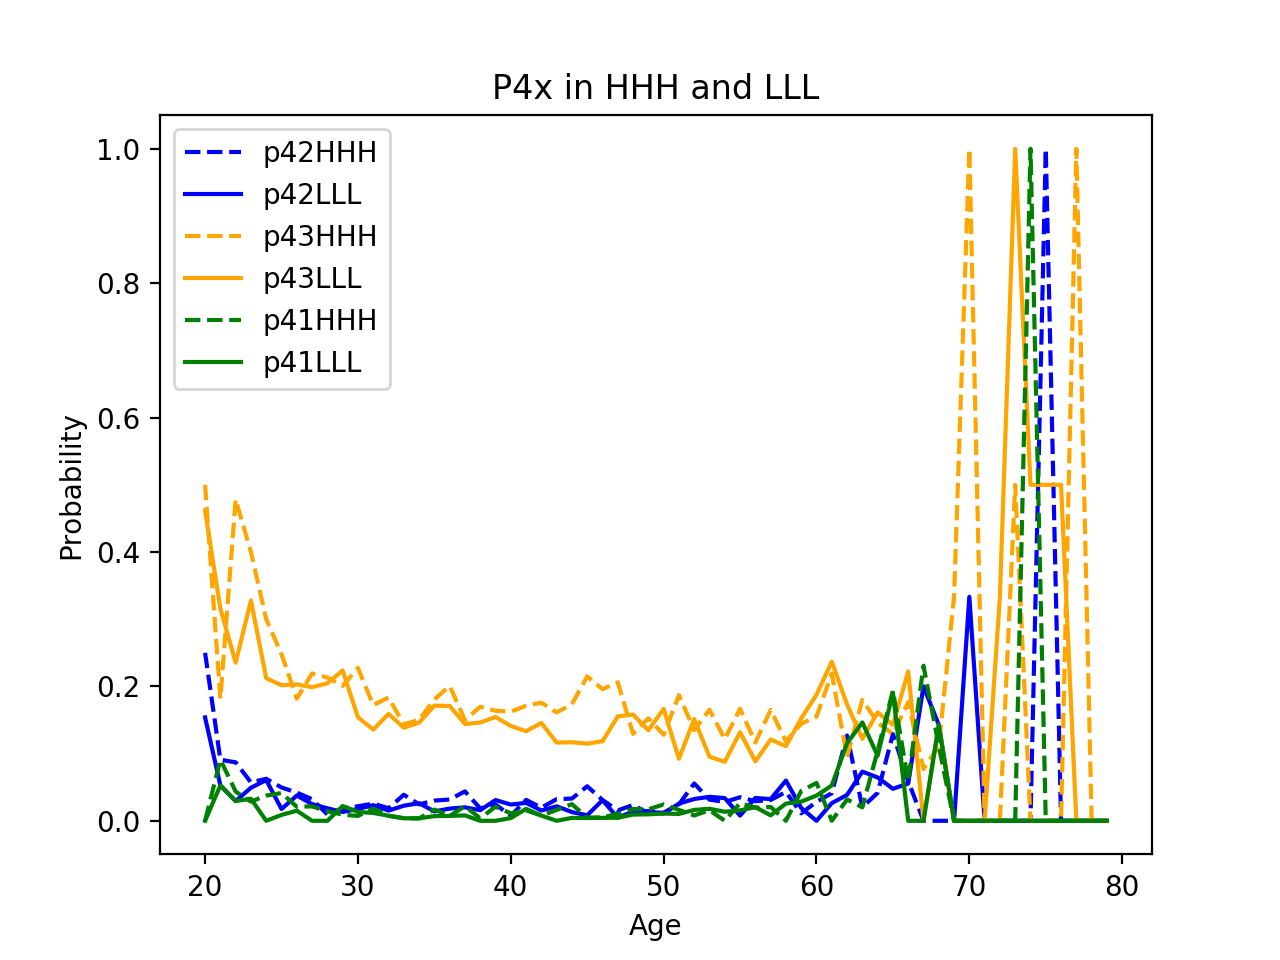

In [79]:
%matplotlib notebook
plt.plot(age,hm42hhh,label='p42HHH',color='blue',linestyle='dashed')
plt.plot(age,hm42lll,label='p42LLL',color='blue')
plt.plot(age,hm43hhh,label='p43HHH',color='orange',linestyle='dashed')
plt.plot(age,hm43lll,label='p43LLL',color='orange')
plt.plot(age,hm41hhh,label='p41HHH',color='green',linestyle='dashed')
plt.plot(age,hm41lll,label='p41LLL',color='green')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P4x in HHH and LLL')
plt.legend()

<IPython.core.display.Javascript object>


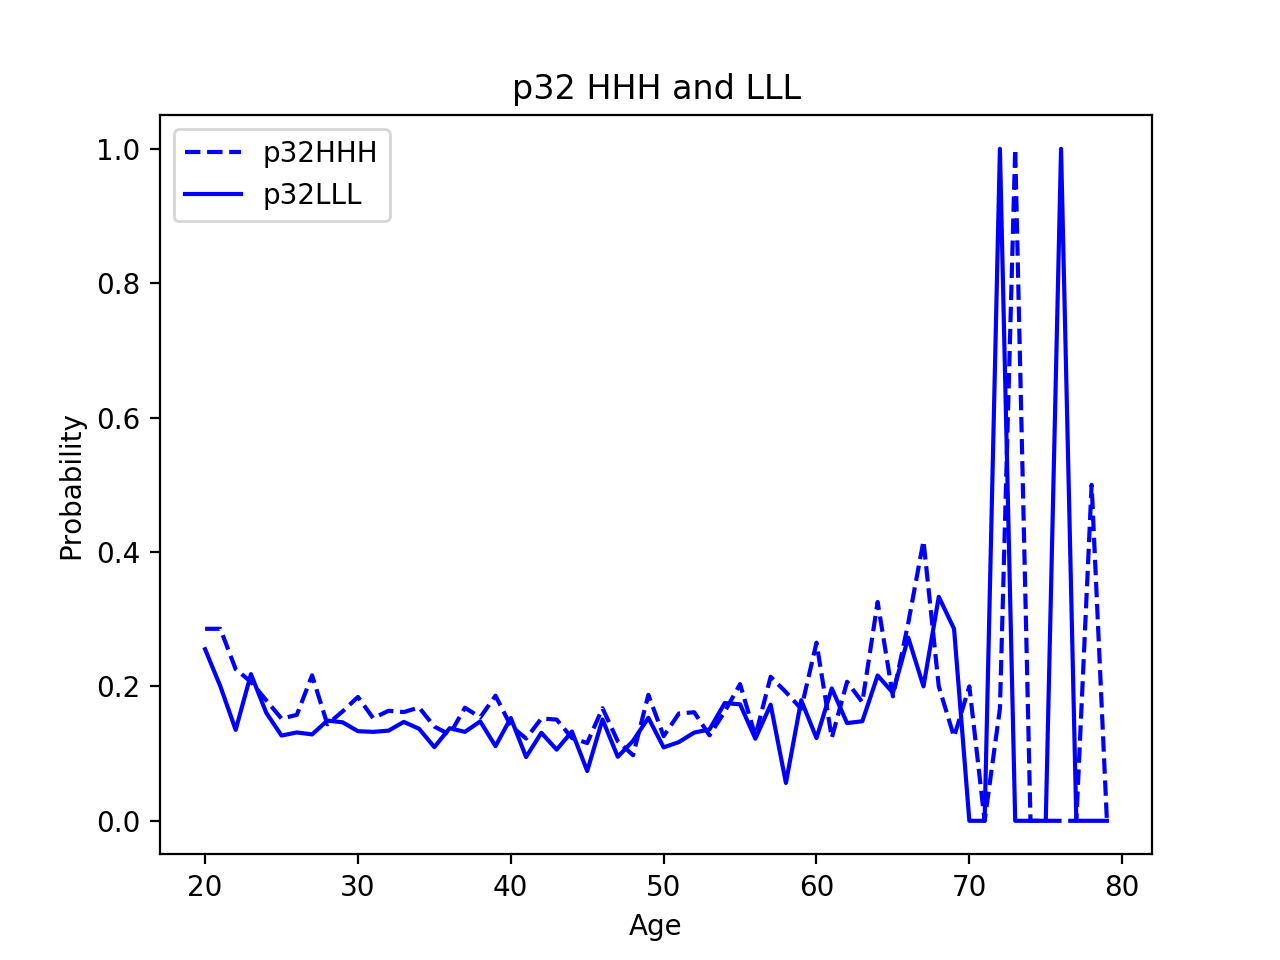

In [202]:
%matplotlib notebook
plt.plot(age,hm32hhh,label='p32HHH',color='blue',linestyle='dashed')
plt.plot(age,hm32lll,label='p32LLL',color='blue')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('p32 HHH and LLL')
plt.legend()

<IPython.core.display.Javascript object>


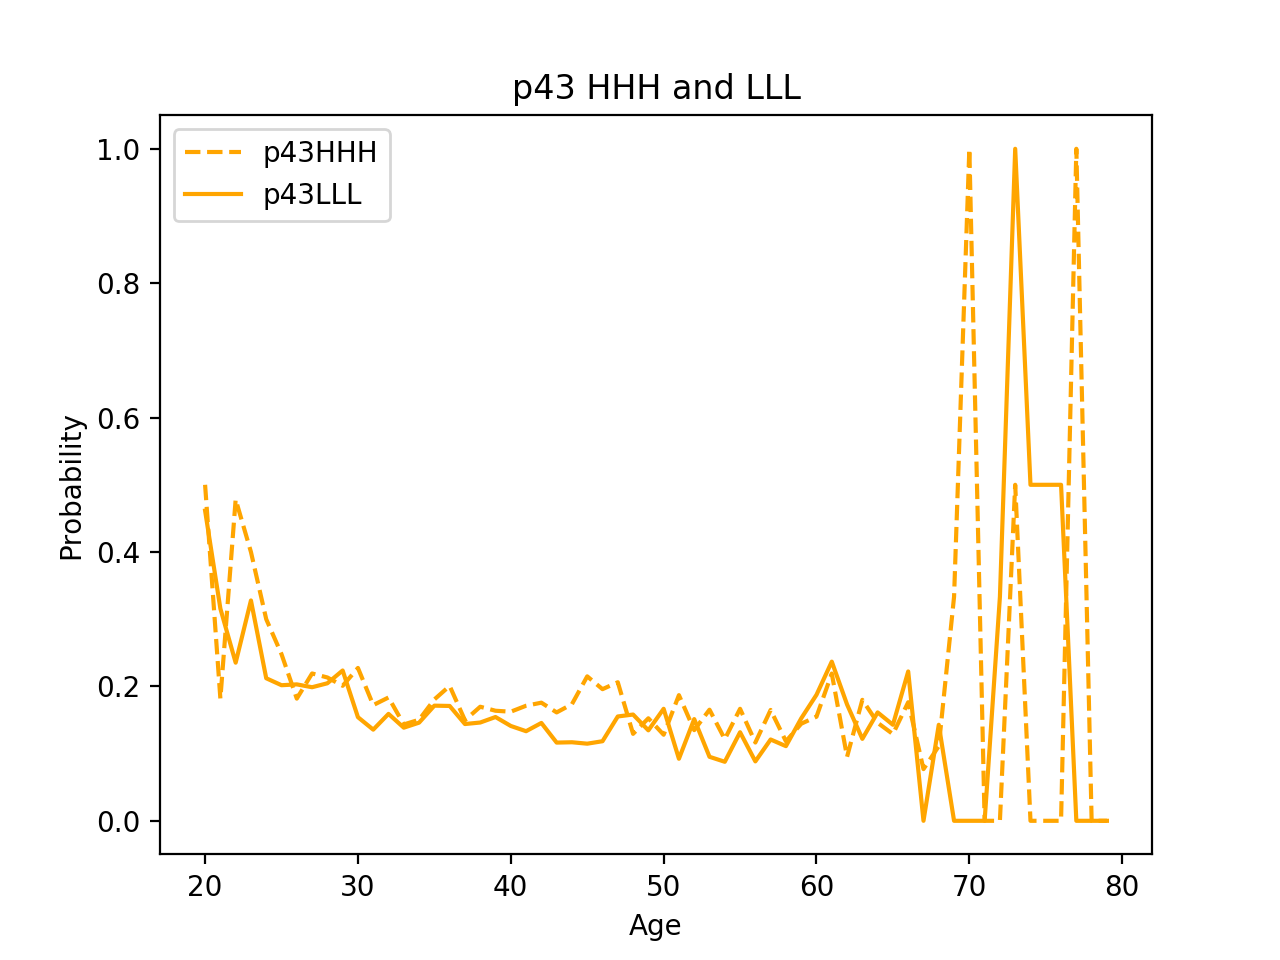

In [203]:
%matplotlib notebook
plt.plot(age,hm43hhh,label='p43HHH',color='orange',linestyle='dashed')
plt.plot(age,hm43lll,label='p43LLL',color='orange')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('p43 HHH and LLL')
plt.legend()

## Findings:
1. The probability of men's downward transition in HHH and LLL decreases slightly between 20 and 30 years old, and remain roughly constant between 30 and 60 years old.
2. The probability of men's downward transition in HHH (High inequality, High crime rate, High high school drop out rate) is higher than that in LLL.

In [187]:
plt.plot(age,hm21hhh,label='p21HHH',color='green',linestyle='dashed')
plt.plot(age,hm21lll,label='p21LLL',color='green')

In [85]:
print('The summation of p42_hhh w.r.t age:',sum(hm42hhh))
print('The summation of p42_lll w.r.t age:',sum(hm42lll))

The summation of p42_hhh w.r.t age: 2.979259966726385
The summation of p42_lll w.r.t age: 2.1066243940923033


In [168]:
df=[]
headBigmarkov=[headmarkovhhh,headmarkovhlh,headmarkovhhl,headmarkovhll,headmarkovlhh,headmarkovllh,headmarkovlhl,headmarkovlll]

In [169]:
for i in range(8):
    for j in range(60):
        df.extend([headBigmarkov[i][j][0][::-1],headBigmarkov[i][j][1][::-1],headBigmarkov[i][j][2][::-1],headBigmarkov[i][j][3][::-1]])

In [170]:
columns=['Q4','Q3','Q2','Q1']
index=[]
for i in range(8):
    for j in range(60):
        a1='Q1'+'_'+str(i)+'_'+str(j+20)
        a2='Q2'+'_'+str(i)+'_'+str(j+20)
        a3='Q3'+'_'+str(i)+'_'+str(j+20)
        a4='Q4'+'_'+str(i)+'_'+str(j+20)
        a=[a1,a2,a3,a4]
        index.extend(a)

In [171]:
df=pd.DataFrame(df,columns=columns,index=index)
df.index.name = 'Period1'
df.columns.name = 'Period2'
df
df = df.stack().rename("value").reset_index()

In [172]:
df0=df[0:16*60]

In [173]:
x=np.array([1,2,3,4])
y=np.array([1,2,3,4])
%matplotlib notebook
def f(age, x, y):
    #z=[[],[],[],[]]
    #for i in x:
        #for j in y:
            #z[i].append(markovhhh[0][i][j])
    z=headmarkov1[age-20][x-1][y-1]
    return z
def plot3d(age):
    X, Y = np.meshgrid(x, y)
    z=f(age,x,y)
    %matplotlib inline
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    ax.set_title('Probability of income transition')
    print('age=', age)
age_slider=wg.IntSlider(value=20,min=20,max=79,step=1)
wg.interact(plot3d,age=age_slider)

interactive(children=(IntSlider(value=20, description='age', max=79, min=20), Output()), _dom_classes=('widget…

<function __main__.plot3d(age)>

In [174]:
def heat(age):
    a=headmarkov1[age-20]
    sns.heatmap(a, annot=True,  linewidths=.5,xticklabels=['Q1','Q2','Q3','Q4'],yticklabels=['Q1','Q2','Q3','Q4'])
    print('age=', age)
    plt.show()
age2_slider=wg.IntSlider(value=20,min=20,max=79,step=1)
wg.interact(heat,age=age2_slider)

interactive(children=(IntSlider(value=20, description='age', max=79, min=20), Output()), _dom_classes=('widget…

<function __main__.heat(age)>

In [175]:
from mpl_toolkits.mplot3d import Axes3D
type_wg=wg.RadioButtons(
    options=['HHH', 'HLH', 'HHL','HLL','LHH','LLH','LHL','LLL'],
#     value='pineapple',
    description='type:',
    disabled=False
)
x=np.array([1,2,3,4])
y=np.array([1,2,3,4])
%matplotlib notebook
def f(age, ty,x, y):
    t=0
    #z=[[],[],[],[]]
    #for i in x:
        #for j in y:
            #z[i].append(markovhhh[0][i][j])
    if ty=='HHH':
        t=0
    elif ty=='HLH':
        t=1
    elif ty=='HHL':
        t=2
    elif ty=='HLL':
        t=3
    elif ty=='LHH':
        t=4
    elif ty=='LLH':
        t=5
    elif ty=='LHL':
        t=6
    elif ty=='LLL':
        t=7
    z=headBigmarkov[t][age-20][x-1][y-1]
    return z
def plot3d1(ty,age):
    X, Y = np.meshgrid(x, y)
    z=f(age,ty,x,y)
    %matplotlib inline
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    ax.set_title('Probability of income transition')
    if ty=='HHH':
        s='High inequality, High crime rate, High high school drop out rate'
    elif ty=='HHL':
        s='High inequality, High crime rate, Low high school drop out rate'
    elif ty=='HLH':
        s='High inequality, Low crime rate, High high school drop out rate'
    elif ty=='HLL':
        s='High inequality, Low crime rate, Low high school drop out rate'
    elif ty=='LHL':
        s='Low inequality, High crime rate, Low high school drop out rate'
    elif ty=='LLL':
        s='Low inequality, Low crime rate, Low high school drop out rate'
    elif ty=='LHH':
        s='Low inequality, High crime rate, High high school drop out rate'
    elif ty=='LLH':
        s='Low inequality, Low crime rate, High high school drop out rate'
    print('age=', age)
    print('type=',s)
age_slider=wg.IntSlider(value=20,min=20,max=79,step=1)
wg.interact(plot3d1,age=age_slider,ty=type_wg)

interactive(children=(RadioButtons(description='type:', options=('HHH', 'HLH', 'HHL', 'HLL', 'LHH', 'LLH', 'LH…

<function __main__.plot3d1(ty, age)>

In [179]:
def heat2(ty,age):
    if ty=='HHH':
        t=0
    elif ty=='HLH':
        t=1
    elif ty=='HHL':
        t=2
    elif ty=='HLL':
        t=3
    elif ty=='LHH':
        t=4
    elif ty=='LLH':
        t=5
    elif ty=='LHL':
        t=6
    elif ty=='LLL':
        t=7
    a=headBigmarkov[t][age-20]
    sns.heatmap(a, annot=True,  linewidths=.5,xticklabels=['Q1','Q2','Q3','Q4'],yticklabels=['Q1','Q2','Q3','Q4'])
    if ty=='HHH':
        s='High inequality, High crime rate, High high school drop out rate'
    elif ty=='HHL':
        s='High inequality, High crime rate, Low high school drop out rate'
    elif ty=='HLH':
        s='High inequality, Low crime rate, High high school drop out rate'
    elif ty=='HLL':
        s='High inequality, Low crime rate, Low high school drop out rate'
    elif ty=='LHL':
        s='Low inequality, High crime rate, Low high school drop out rate'
    elif ty=='LLL':
        s='Low inequality, Low crime rate, Low high school drop out rate'
    elif ty=='LHH':
        s='Low inequality, High crime rate, High high school drop out rate'
    elif ty=='LLH':
        s='Low inequality, Low crime rate, High high school drop out rate'
    print('age=', age)
    print('type=',s)
    plt.show()
age3_slider=wg.IntSlider(value=20,min=20,max=79,step=1)
type_wg3=wg.RadioButtons(
    options=['HHH', 'HLH', 'HHL','HLL','LHH','LLH','LHL','LLL'],
#     value='pineapple',
    description='type:',
    disabled=False
)
wg.interact(heat2,age=age3_slider,ty=type_wg3)

interactive(children=(RadioButtons(description='type:', options=('HHH', 'HLH', 'HHL', 'HLL', 'LHH', 'LLH', 'LH…

<function __main__.heat2(ty, age)>

women

In [148]:
wifemarhhh=[[0]*16]*60
wifemarhhl=[[0]*16]*60
wifemarhlh=[[0]*16]*60
wifemarhll=[[0]*16]*60
wifemarlhh=[[0]*16]*60
wifemarllh=[[0]*16]*60
wifemarlhl=[[0]*16]*60
wifemarlll=[[0]*16]*60
wifemarhhh=np.array(wifemarhhh)
wifemarhhl=np.array(wifemarhhl)
wifemarhlh=np.array(wifemarhlh)
wifemarhll=np.array(wifemarhll)
wifemarlhh=np.array(wifemarlhh)
wifemarllh=np.array(wifemarllh)
wifemarlhl=np.array(wifemarlhl)
wifemarlll=np.array(wifemarlll)

In [149]:
for i in range(len(income)):
    for j in range(len(wifeinc_ind)-1):
        type=16
        age=income.values[i][wanum[j]]
        inc=income.values[i][winum[j]]
        age2=income.values[i][wanum[j+1]] # set the period interval be 1 year
        inc2=income.values[i][winum[j+1]]
        loc=income.values[i][stanum[j]]
            #elif j>=23:
            #age=income.values[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=79) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<wifeinc_quan[j][2]) & (inc2<wifeinc_quan[j+1][2]):
                type=0
            elif (inc<wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][2]) & (inc2<wifeinc_quan[j+1][1]):
                type=1
            elif (inc<wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][1]) & (inc2<wifeinc_quan[j+1][0]):
                type=2
            elif (inc<wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][0]):
                type=3
            elif (inc<wifeinc_quan[j][1]) & (inc>=wifeinc_quan[j][2]) & (inc2<wifeinc_quan[j+1][2]):
                type=4
            elif (inc<wifeinc_quan[j][1]) & (inc>=wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][2]) & (inc2<wifeinc_quan[j+1][1]):
                type=5
            elif (inc<wifeinc_quan[j][1]) & (inc>=wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][1]) & (inc2<wifeinc_quan[j+1][0]):
                type=6
            elif (inc<wifeinc_quan[j][1]) & (inc>=wifeinc_quan[j][2]) & (inc2>=wifeinc_quan[j+1][0]):
                type=7
            elif (inc<wifeinc_quan[j][0]) & (inc>=wifeinc_quan[j][1]) & (inc2<wifeinc_quan[j+1][2]):
                type=8
            elif (inc<wifeinc_quan[j][0]) & (inc>=wifeinc_quan[j][1]) & (inc2>=wifeinc_quan[j+1][2]) & (inc2<wifeinc_quan[j+1][1]):
                type=9
            elif (inc<wifeinc_quan[j][0]) & (inc>=wifeinc_quan[j][1]) & (inc2>=wifeinc_quan[j+1][1]) & (inc2<wifeinc_quan[j+1][0]):
                type=10
            elif (inc<wifeinc_quan[j][0]) & (inc>=wifeinc_quan[j][1]) & (inc2>=wifeinc_quan[j+1][0]):
                type=11
            elif (inc>=wifeinc_quan[j][0]) & (inc2<wifeinc_quan[j+1][2]):
                type=12
            elif (inc>=wifeinc_quan[j][0]) & (inc2>=wifeinc_quan[j+1][2]) & (inc2<wifeinc_quan[j+1][1]):
                type=13
            elif (inc>=wifeinc_quan[j][0]) & (inc2>=wifeinc_quan[j+1][1]) & (inc2<wifeinc_quan[j+1][0]):
                type=14
            elif (inc>=wifeinc_quan[j][0]) & (inc2>=wifeinc_quan[j+1][0]):
                type=15
            if loc in hhh:
                wifemarhhh[int(age)-20][type]+=1
            if loc in hhl:
                wifemarhhl[int(age)-20][type]+=1
            if loc in hlh:
                wifemarhlh[int(age)-20][type]+=1
            if loc in hll:
                wifemarhll[int(age)-20][type]+=1
            if loc in lhh:
                wifemarlhh[int(age)-20][type]+=1
            if loc in llh:
                wifemarllh[int(age)-20][type]+=1
            if loc in lhl:
                wifemarlhl[int(age)-20][type]+=1
            if loc in lll:
                wifemarlll[int(age)-20][type]+=1

In [150]:
wifemarhhh=wifemarhhh.reshape(60,4,4)
wifemarhhl=wifemarhhl.reshape(60,4,4)
wifemarhll=wifemarhll.reshape(60,4,4)
wifemarhlh=wifemarhlh.reshape(60,4,4)
wifemarlhh=wifemarlhh.reshape(60,4,4)
wifemarllh=wifemarllh.reshape(60,4,4)
wifemarlhl=wifemarlhl.reshape(60,4,4)
wifemarlll=wifemarlll.reshape(60,4,4)
wifemarkovhhh=[]
wifemarkovhhl=[]
wifemarkovhlh=[]
wifemarkovhll=[]
wifemarkovlhh=[]
wifemarkovllh=[]
wifemarkovlhl=[]
wifemarkovlll=[]
for i in range(len(wifemarhhh)):
    for j in range(4):
        sum_quan=sum(wifemarhhh[i][j])
        wifemarhhh[i][j]/max(sum_quan,0.1)
        wifemarkovhhh.append(wifemarhhh[i][j]/max(sum_quan,0.1))
wifemarkovhhh=np.array(wifemarkovhhh)
wifemarkovhhh=wifemarkovhhh.reshape(60,4,4)
for i in range(len(wifemarhhl)):
    for j in range(4):
        sum_quan=sum(wifemarhhl[i][j])
        wifemarhhl[i][j]/max(sum_quan,0.1)
        wifemarkovhhl.append(wifemarhhl[i][j]/max(sum_quan,0.1))
wifemarkovhhl=np.array(wifemarkovhhl)
wifemarkovhhl=wifemarkovhhl.reshape(60,4,4)
for i in range(len(wifemarhll)):
    for j in range(4):
        sum_quan=sum(wifemarhll[i][j])
        wifemarhll[i][j]/max(sum_quan,0.1)
        wifemarkovhll.append(wifemarhll[i][j]/max(sum_quan,0.1))
wifemarkovhll=np.array(wifemarkovhll)
wifemarkovhll=wifemarkovhll.reshape(60,4,4)
for i in range(len(wifemarhlh)):
    for j in range(4):
        sum_quan=sum(wifemarhlh[i][j])
        wifemarhlh[i][j]/max(sum_quan,0.1)
        wifemarkovhlh.append(wifemarhlh[i][j]/max(sum_quan,0.1))
wifemarkovhlh=np.array(wifemarkovhlh)
wifemarkovhlh=wifemarkovhlh.reshape(60,4,4)
for i in range(len(wifemarlhh)):
    for j in range(4):
        sum_quan=sum(wifemarlhh[i][j])
        wifemarlhh[i][j]/max(sum_quan,0.1)
        wifemarkovlhh.append(wifemarlhh[i][j]/max(sum_quan,0.1))
wifemarkovlhh=np.array(wifemarkovlhh)
wifemarkovlhh=wifemarkovlhh.reshape(60,4,4)
for i in range(len(wifemarllh)):
    for j in range(4):
        sum_quan=sum(wifemarllh[i][j])
        wifemarllh[i][j]/max(sum_quan,0.1)
        wifemarkovllh.append(wifemarllh[i][j]/max(sum_quan,0.1))
wifemarkovllh=np.array(wifemarkovllh)
wifemarkovllh=wifemarkovllh.reshape(60,4,4)
for i in range(len(wifemarlhl)):
    for j in range(4):
        sum_quan=sum(wifemarlhl[i][j])
        wifemarlhl[i][j]/max(sum_quan,0.1)
        wifemarkovlhl.append(wifemarlhl[i][j]/max(sum_quan,0.1))
wifemarkovlhl=np.array(wifemarkovlhl)
wifemarkovlhl=wifemarkovlhl.reshape(60,4,4)
for i in range(len(wifemarlll)):
    for j in range(4):
        sum_quan=sum(wifemarlll[i][j])
        wifemarlll[i][j]/max(sum_quan,0.1)
        wifemarkovlll.append(wifemarlll[i][j]/max(sum_quan,0.1))
wifemarkovlll=np.array(wifemarkovlll)
wifemarkovlll=wifemarkovlll.reshape(60,4,4)

In [152]:
wdf=[]
wBigmarkov=[wifemarkovhhh,wifemarkovhlh,wifemarkovhhl,wifemarkovhll,wifemarkovlhh,wifemarkovllh,wifemarkovlhl,wifemarkovlll]

In [153]:
for i in range(8):
    for j in range(60):
        wdf.extend([wBigmarkov[i][j][0][::-1],Bigmarkov[i][j][1][::-1],Bigmarkov[i][j][2][::-1],Bigmarkov[i][j][3][::-1]])

In [157]:
columns=['Q4','Q3','Q2','Q1']
index=[]
for i in range(8):
    for j in range(60):
        a1='Q1'+'_'+str(i)+'_'+str(j+20)
        a2='Q2'+'_'+str(i)+'_'+str(j+20)
        a3='Q3'+'_'+str(i)+'_'+str(j+20)
        a4='Q4'+'_'+str(i)+'_'+str(j+20)
        a=[a1,a2,a3,a4]
        index.extend(a)

In [159]:
wdf=pd.DataFrame(df,columns=columns,index=index)
wdf.index.name = 'Period1'
wdf.columns.name = 'Period2'
wdf = df.stack().rename("value").reset_index()

In [161]:
wdf0=wdf[0:16*60]

In [162]:
x=np.array([1,2,3,4])
y=np.array([1,2,3,4])
%matplotlib notebook
def f(age, x, y):
    #z=[[],[],[],[]]
    #for i in x:
        #for j in y:
            #z[i].append(markovhhh[0][i][j])
    z=wifemarkov1[age-20][x-1][y-1]
    return z
def plot3d(age):
    X, Y = np.meshgrid(x, y)
    z=f(age,x,y)
    %matplotlib inline
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    ax.set_title('Probability of income transition')
    print('age=', age)
age_slider=wg.IntSlider(value=20,min=20,max=79,step=1)
wg.interact(plot3d,age=age_slider)

interactive(children=(IntSlider(value=20, description='age', max=79, min=20), Output()), _dom_classes=('widget…

<function __main__.plot3d(age)>

In [164]:
def heat(age):
    a=wifemarkov1[age-20]
    sns.heatmap(a, annot=True,  linewidths=.5,xticklabels=['Q1','Q2','Q3','Q4'],yticklabels=['Q1','Q2','Q3','Q4'])
    print('age=', age)
    plt.show()
age2_slider=wg.IntSlider(value=20,min=20,max=79,step=1)
wg.interact(heat,age=age2_slider)

interactive(children=(IntSlider(value=20, description='age', max=79, min=20), Output()), _dom_classes=('widget…

<function __main__.heat(age)>

In [193]:
from mpl_toolkits.mplot3d import Axes3D
type_wg=wg.RadioButtons(
    options=['HHH', 'HLH', 'HHL','HLL','LHH','LLH','LHL','LLL'],
#     value='pineapple',
    description='type:',
    disabled=False
)
x=np.array([1,2,3,4])
y=np.array([1,2,3,4])
%matplotlib notebook
def f(age, ty,x, y):
    t=0
    #z=[[],[],[],[]]
    #for i in x:
        #for j in y:
            #z[i].append(markovhhh[0][i][j])
    if ty=='HHH':
        t=0
    elif ty=='HLH':
        t=1
    elif ty=='HHL':
        t=2
    elif ty=='HLL':
        t=3
    elif ty=='LHH':
        t=4
    elif ty=='LLH':
        t=5
    elif ty=='LHL':
        t=6
    elif ty=='LLL':
        t=7
    z=wBigmarkov[t][age-20][x-1][y-1]
    return z
def plot3d1(ty,age):
    X, Y = np.meshgrid(x, y)
    z=f(age,ty,x,y)
    %matplotlib inline
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    ax.set_title('Probability of income transition')
    if ty=='HHH':
        s='High inequality, High crime rate, High high school drop out rate'
    elif ty=='HHL':
        s='High inequality, High crime rate, Low high school drop out rate'
    elif ty=='HLH':
        s='High inequality, Low crime rate, High high school drop out rate'
    elif ty=='HLL':
        s='High inequality, Low crime rate, Low high school drop out rate'
    elif ty=='LHL':
        s='Low inequality, High crime rate, Low high school drop out rate'
    elif ty=='LLL':
        s='Low inequality, Low crime rate, Low high school drop out rate'
    elif ty=='LHH':
        s='Low inequality, High crime rate, High high school drop out rate'
    elif ty=='LLH':
        s='Low inequality, Low crime rate, High high school drop out rate'
    print('age=', age)
    print('type=',s)
age_slider=wg.IntSlider(value=20,min=20,max=79,step=1)
wg.interact(plot3d1,age=age_slider,ty=type_wg)

interactive(children=(RadioButtons(description='type:', options=('HHH', 'HLH', 'HHL', 'HLL', 'LHH', 'LLH', 'LH…

<function __main__.plot3d1(ty, age)>

In [194]:
def heat2(ty,age):
    if ty=='HHH':
        t=0
    elif ty=='HLH':
        t=1
    elif ty=='HHL':
        t=2
    elif ty=='HLL':
        t=3
    elif ty=='LHH':
        t=4
    elif ty=='LLH':
        t=5
    elif ty=='LHL':
        t=6
    elif ty=='LLL':
        t=7
    a=wBigmarkov[t][age-20]
    sns.heatmap(a, annot=True,  linewidths=.5,xticklabels=['Q1','Q2','Q3','Q4'],yticklabels=['Q1','Q2','Q3','Q4'])
    if ty=='HHH':
        s='High inequality, High crime rate, High high school drop out rate'
    elif ty=='HHL':
        s='High inequality, High crime rate, Low high school drop out rate'
    elif ty=='HLH':
        s='High inequality, Low crime rate, High high school drop out rate'
    elif ty=='HLL':
        s='High inequality, Low crime rate, Low high school drop out rate'
    elif ty=='LHL':
        s='Low inequality, High crime rate, Low high school drop out rate'
    elif ty=='LLL':
        s='Low inequality, Low crime rate, Low high school drop out rate'
    elif ty=='LHH':
        s='Low inequality, High crime rate, High high school drop out rate'
    elif ty=='LLH':
        s='Low inequality, Low crime rate, High high school drop out rate'
    print('age=', age)
    print('type=',s)
    plt.show()
age3_slider=wg.IntSlider(value=20,min=20,max=79,step=1)
type_wg3=wg.RadioButtons(
    options=['HHH', 'HLH', 'HHL','HLL','LHH','LLH','LHL','LLL'],
#     value='pineapple',
    description='type:',
    disabled=False
)
wg.interact(heat2,age=age3_slider,ty=type_wg3)

interactive(children=(RadioButtons(description='type:', options=('HHH', 'HLH', 'HHL', 'HLL', 'LHH', 'LLH', 'LH…

<function __main__.heat2(ty, age)>

<IPython.core.display.Javascript object>


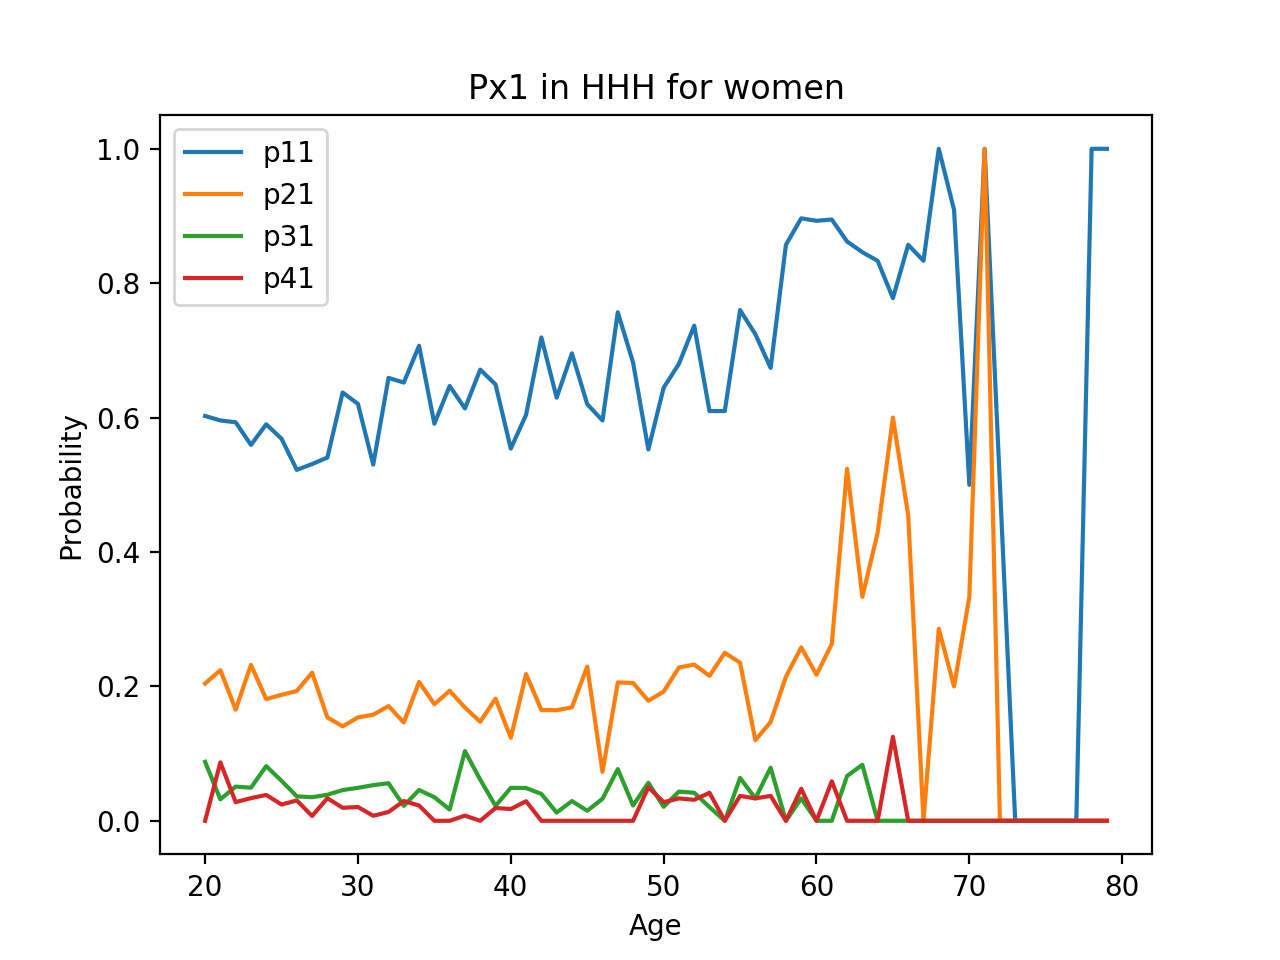

In [204]:
import matplotlib.pyplot as plt
wm11hhh=[]
wm21hhh=[]
wm31hhh=[]
wm41hhh=[]
for i in wifemarkovhhh:
    wm11hhh.append(i[0][0])
    wm21hhh.append(i[1][0])
    wm31hhh.append(i[2][0])
    wm41hhh.append(i[3][0])
age=np.arange(20,20+len(wm11hhh))
%matplotlib notebook
plt.plot(age,wm11hhh,label='p11')
plt.plot(age,wm21hhh,label='p21')
plt.plot(age,wm31hhh,label='p31')
plt.plot(age,wm41hhh,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1 in HHH for women')
plt.legend()

<IPython.core.display.Javascript object>


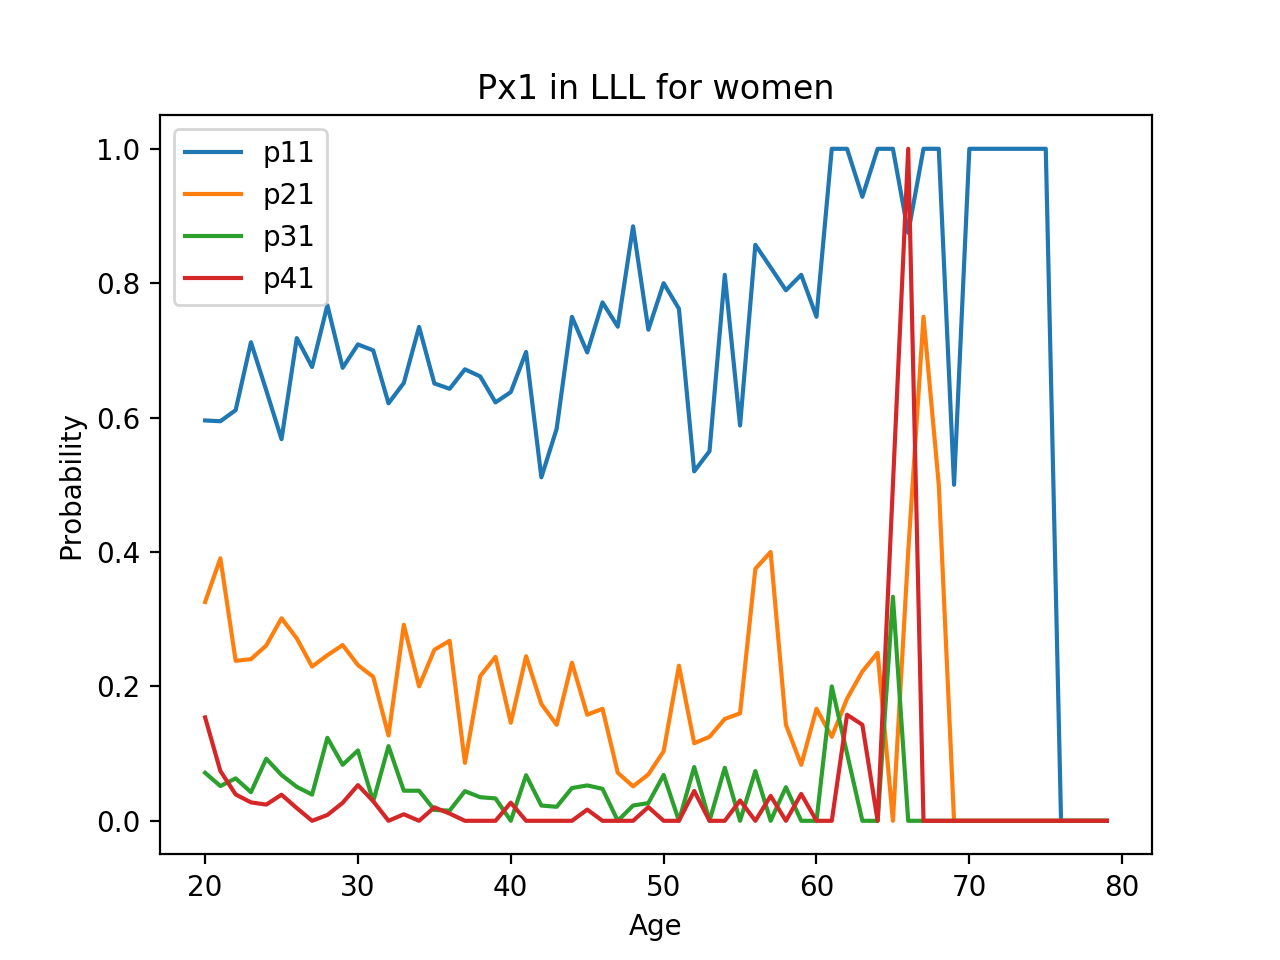

In [205]:
import matplotlib.pyplot as plt
wm11lll=[]
wm21lll=[]
wm31lll=[]
wm41lll=[]
for i in wifemarkovlll:
    wm11lll.append(i[0][0])
    wm21lll.append(i[1][0])
    wm31lll.append(i[2][0])
    wm41lll.append(i[3][0])
age=np.arange(20,20+len(wm11lll))
%matplotlib notebook
plt.plot(age,wm11lll,label='p11')
plt.plot(age,wm21lll,label='p21')
plt.plot(age,wm31lll,label='p31')
plt.plot(age,wm41lll,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1 in LLL for women')
plt.legend()

<IPython.core.display.Javascript object>


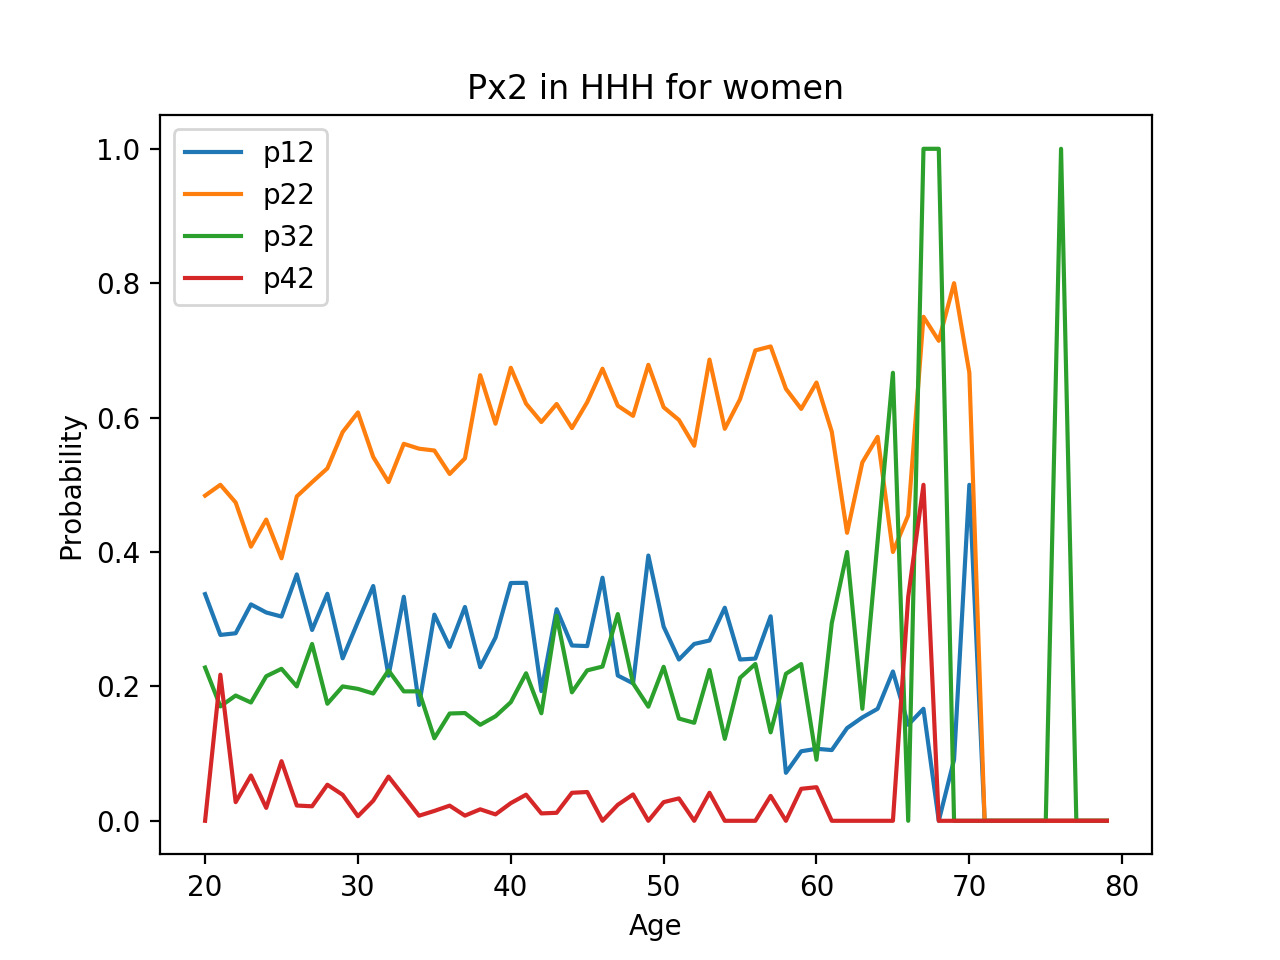

In [206]:
import matplotlib.pyplot as plt
wm12hhh=[]
wm22hhh=[]
wm32hhh=[]
wm42hhh=[]
for i in wifemarkovhhh:
    wm12hhh.append(i[0][1])
    wm22hhh.append(i[1][1])
    wm32hhh.append(i[2][1])
    wm42hhh.append(i[3][1])
age=np.arange(20,20+len(wm11hhh))
wifemarkov1.shape
%matplotlib notebook
plt.plot(age,wm12hhh,label='p12')
plt.plot(age,wm22hhh,label='p22')
plt.plot(age,wm32hhh,label='p32')
plt.plot(age,wm42hhh,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2 in HHH for women')
plt.legend()

<IPython.core.display.Javascript object>


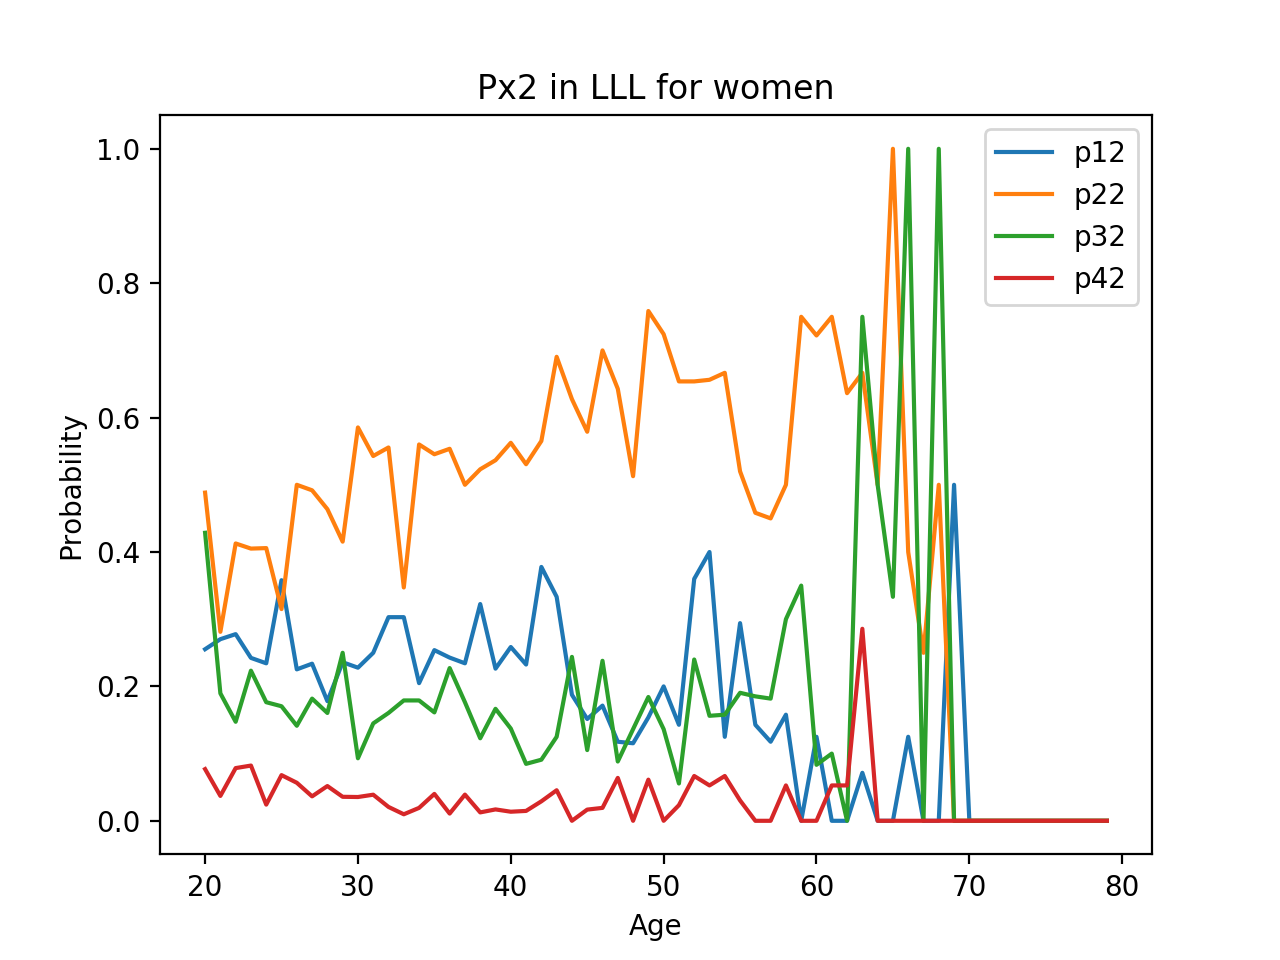

In [207]:
import matplotlib.pyplot as plt
wm12lll=[]
wm22lll=[]
wm32lll=[]
wm42lll=[]
for i in wifemarkovlll:
    wm12lll.append(i[0][1])
    wm22lll.append(i[1][1])
    wm32lll.append(i[2][1])
    wm42lll.append(i[3][1])
age=np.arange(20,20+len(wm11lll))
%matplotlib notebook
plt.plot(age,wm12lll,label='p12')
plt.plot(age,wm22lll,label='p22')
plt.plot(age,wm32lll,label='p32')
plt.plot(age,wm42lll,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2 in LLL for women')
plt.legend()

<IPython.core.display.Javascript object>


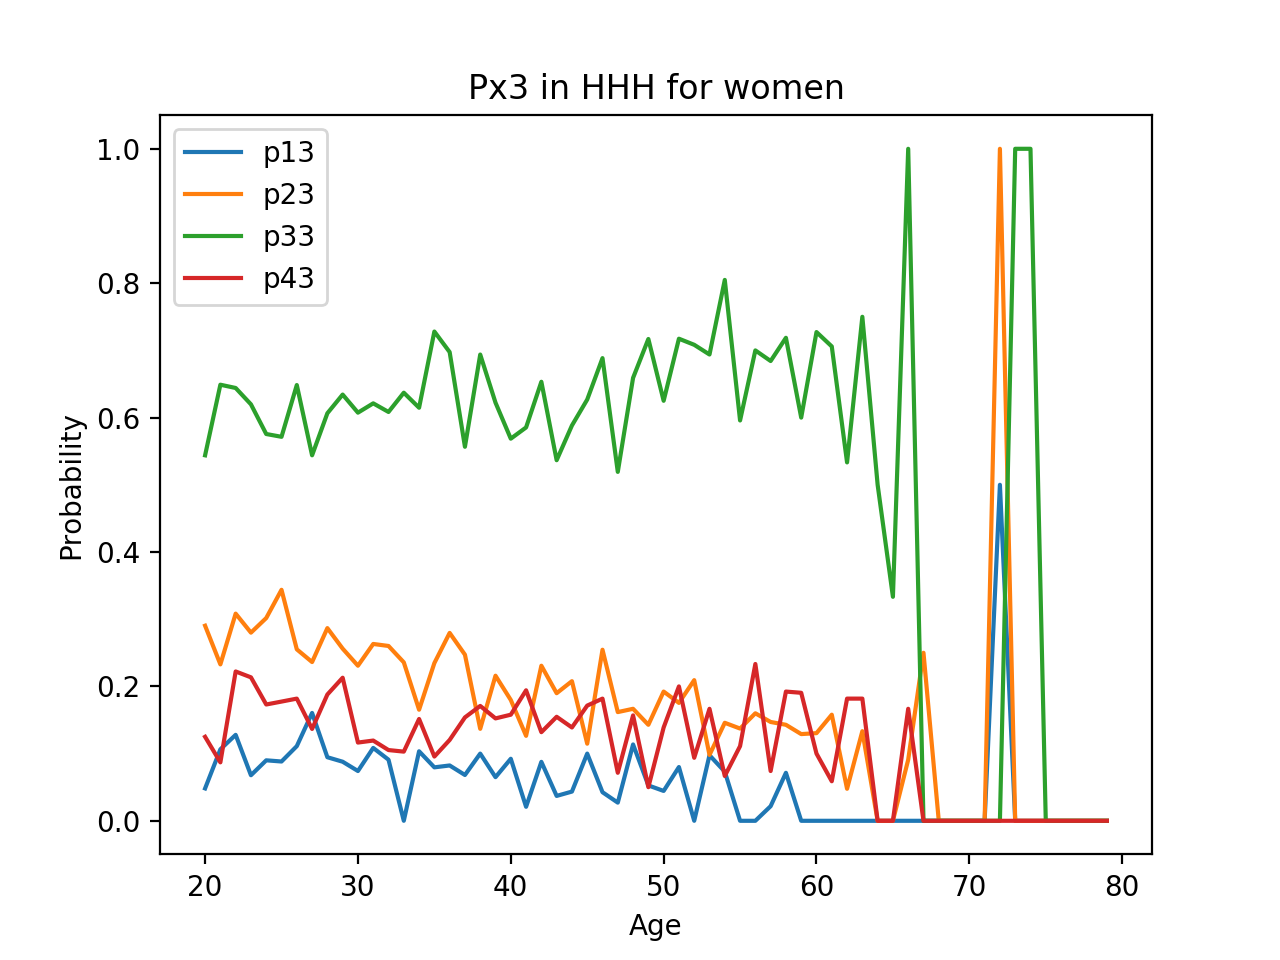

In [210]:
import matplotlib.pyplot as plt
wm13hhh=[]
wm23hhh=[]
wm33hhh=[]
wm43hhh=[]
for i in wifemarkovhhh:
    wm13hhh.append(i[0][2])
    wm23hhh.append(i[1][2])
    wm33hhh.append(i[2][2])
    wm43hhh.append(i[3][2])
age=np.arange(20,20+len(wm11hhh))
%matplotlib notebook
plt.plot(age,wm13hhh,label='p13')
plt.plot(age,wm23hhh,label='p23')
plt.plot(age,wm33hhh,label='p33')
plt.plot(age,wm43hhh,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3 in HHH for women')
plt.legend()

<IPython.core.display.Javascript object>


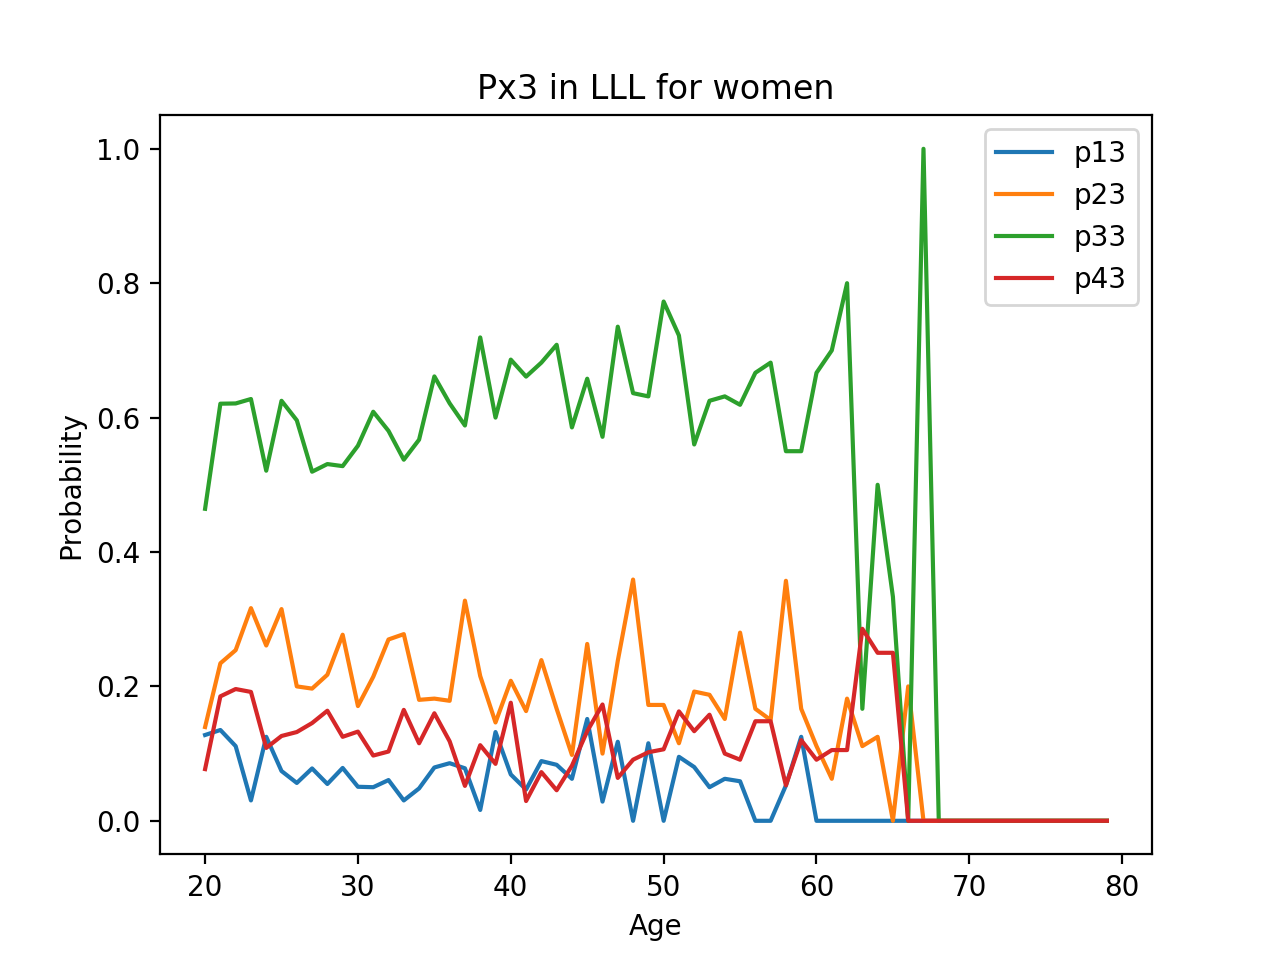

In [209]:
import matplotlib.pyplot as plt
wm13lll=[]
wm23lll=[]
wm33lll=[]
wm43lll=[]
for i in wifemarkovlll:
    wm13lll.append(i[0][2])
    wm23lll.append(i[1][2])
    wm33lll.append(i[2][2])
    wm43lll.append(i[3][2])
age=np.arange(20,20+len(wm11lll))
%matplotlib notebook
plt.plot(age,wm13lll,label='p13')
plt.plot(age,wm23lll,label='p23')
plt.plot(age,wm33lll,label='p33')
plt.plot(age,wm43lll,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3 in LLL for women')
plt.legend()

<IPython.core.display.Javascript object>


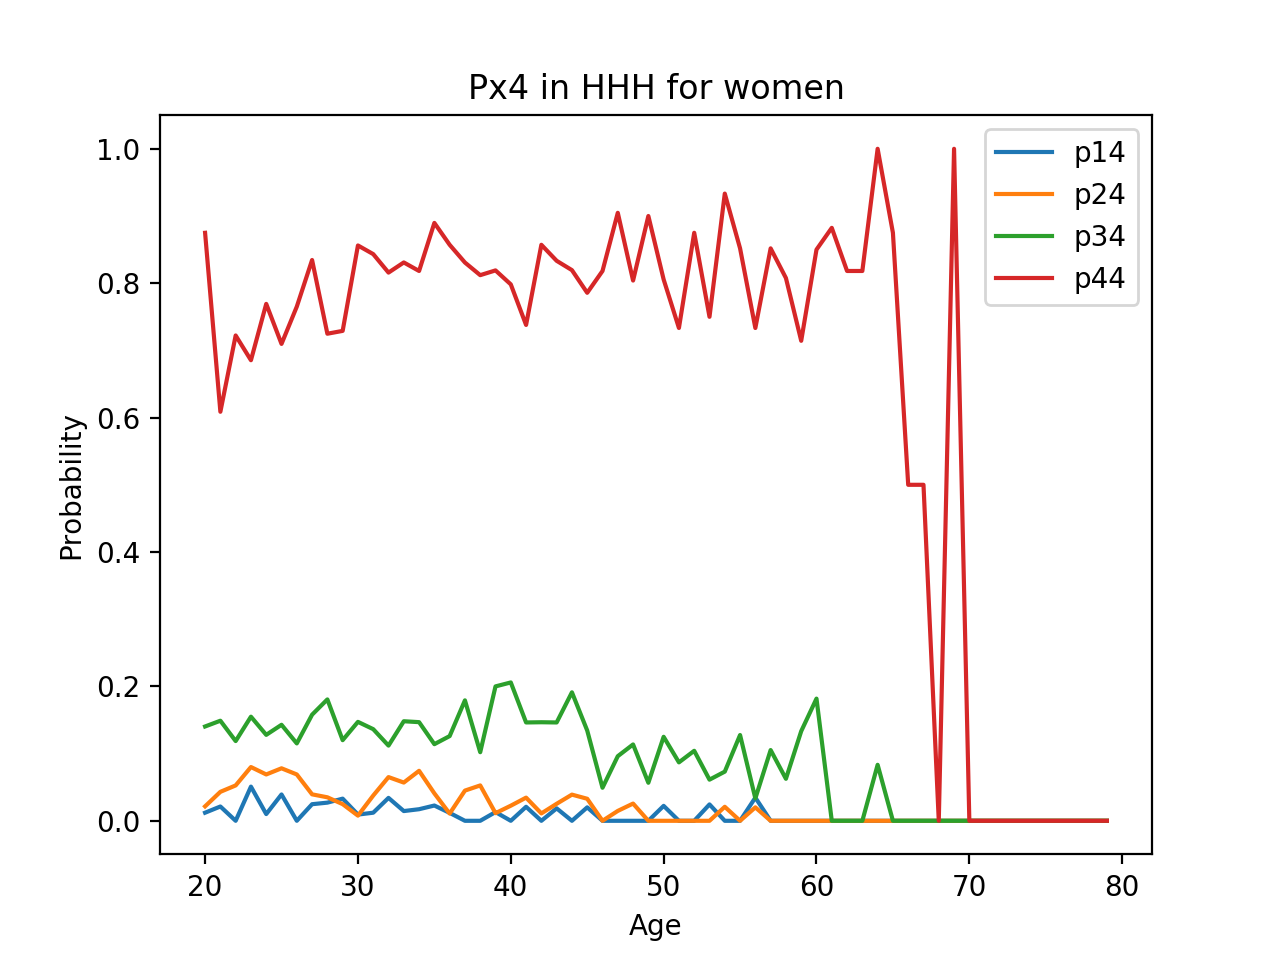

In [211]:
import matplotlib.pyplot as plt
wm14hhh=[]
wm24hhh=[]
wm34hhh=[]
wm44hhh=[]
for i in wifemarkovhhh:
    wm14hhh.append(i[0][3])
    wm24hhh.append(i[1][3])
    wm34hhh.append(i[2][3])
    wm44hhh.append(i[3][3])
age=np.arange(20,20+len(wm11hhh))
%matplotlib notebook
plt.plot(age,wm14hhh,label='p14')
plt.plot(age,wm24hhh,label='p24')
plt.plot(age,wm34hhh,label='p34')
plt.plot(age,wm44hhh,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px4 in HHH for women')
plt.legend()

<IPython.core.display.Javascript object>


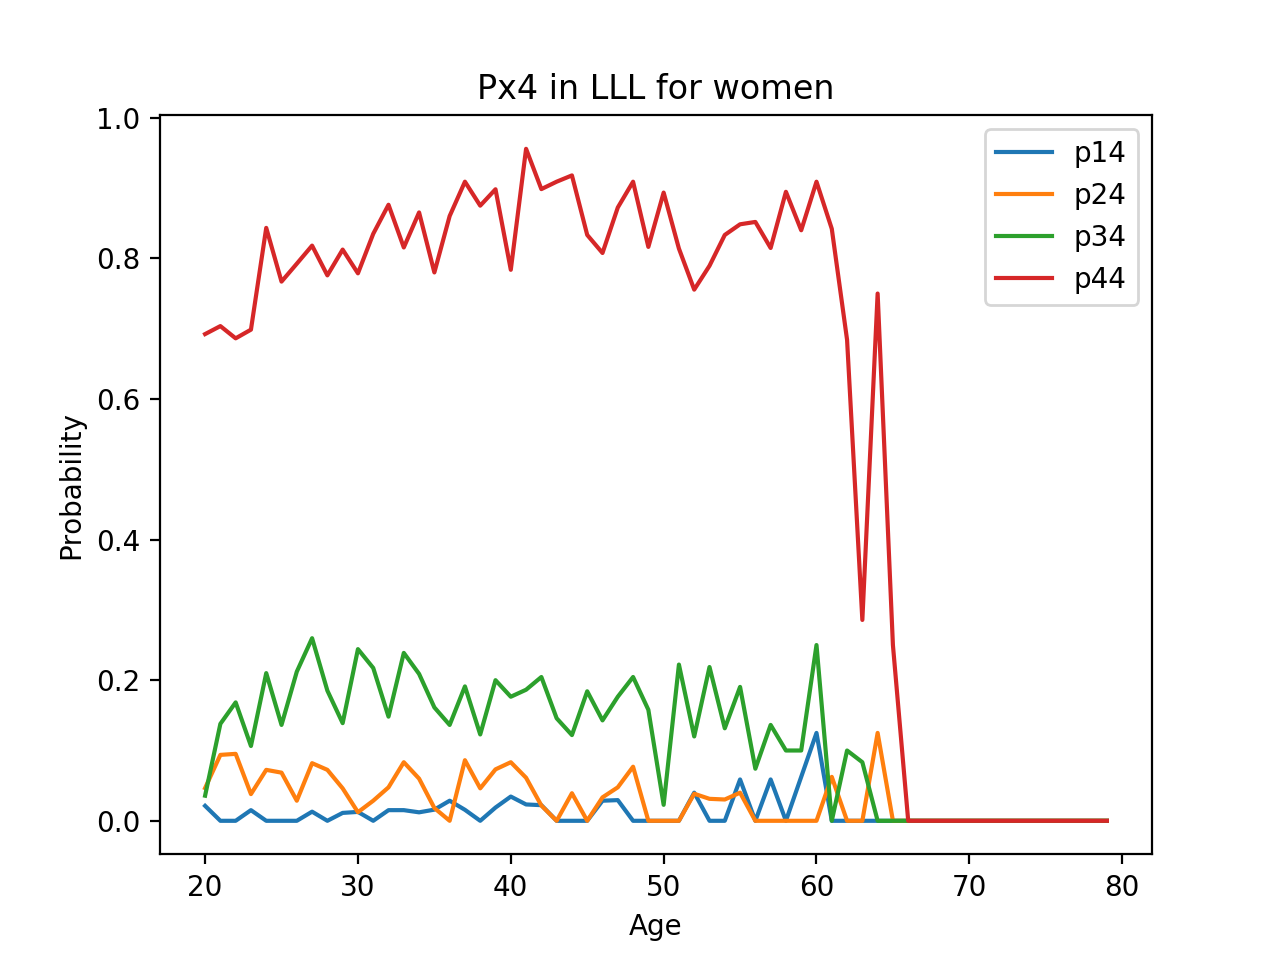

In [212]:
import matplotlib.pyplot as plt
wm14lll=[]
wm24lll=[]
wm34lll=[]
wm44lll=[]
for i in wifemarkovlll:
    wm14lll.append(i[0][3])
    wm24lll.append(i[1][3])
    wm34lll.append(i[2][3])
    wm44lll.append(i[3][3])
age=np.arange(20,20+len(wm11hhh))
%matplotlib notebook
plt.plot(age,wm14lll,label='p14')
plt.plot(age,wm24lll,label='p24')
plt.plot(age,wm34lll,label='p34')
plt.plot(age,wm44lll,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px4 in LLL for women')
plt.legend()

<IPython.core.display.Javascript object>


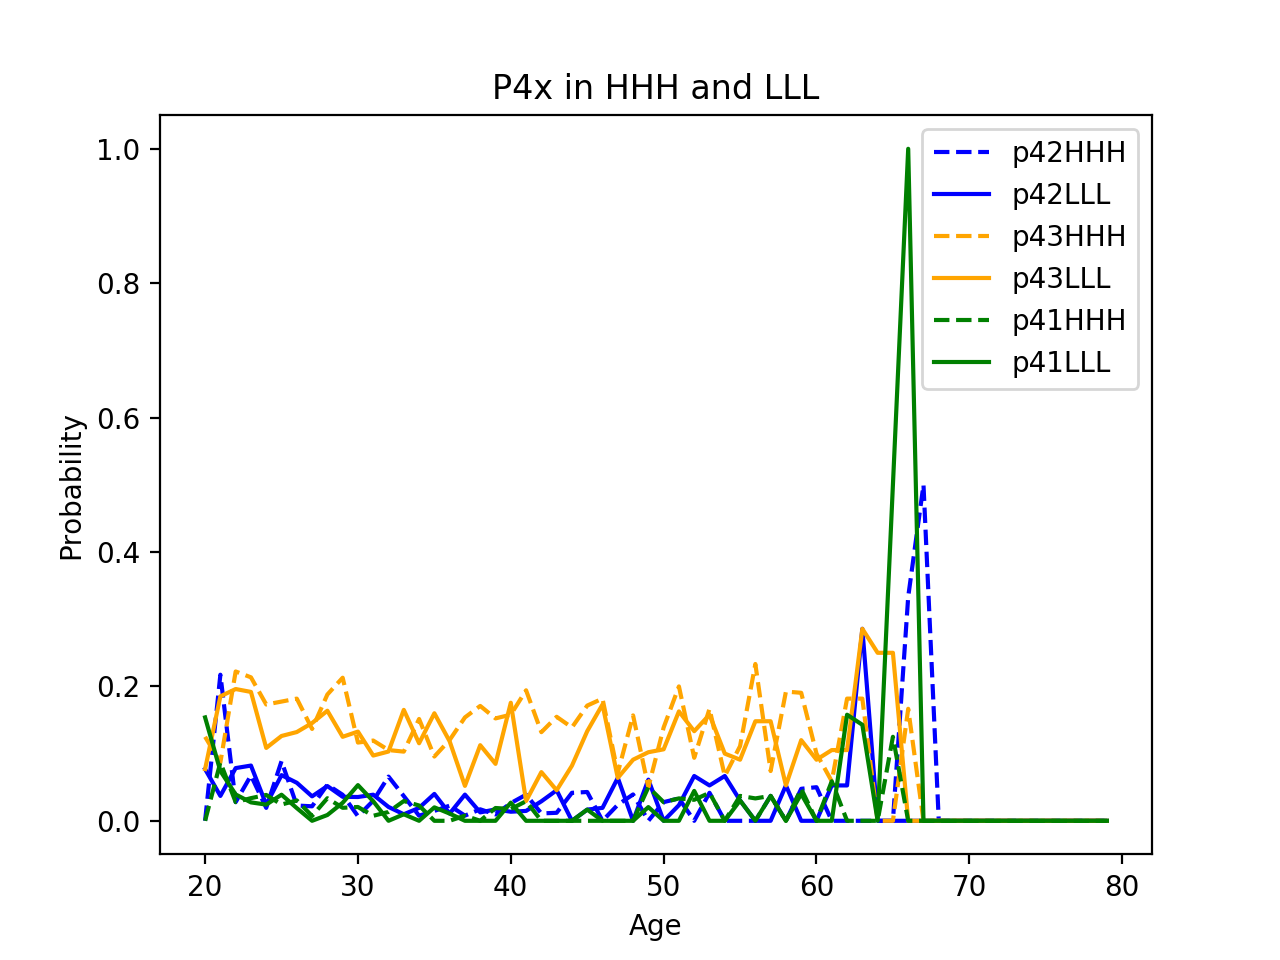

In [213]:
%matplotlib notebook
plt.plot(age,wm42hhh,label='p42HHH',color='blue',linestyle='dashed')
plt.plot(age,wm42lll,label='p42LLL',color='blue')
plt.plot(age,wm43hhh,label='p43HHH',color='orange',linestyle='dashed')
plt.plot(age,wm43lll,label='p43LLL',color='orange')
plt.plot(age,wm41hhh,label='p41HHH',color='green',linestyle='dashed')
plt.plot(age,wm41lll,label='p41LLL',color='green')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P4x in HHH and LLL')
plt.legend()

<IPython.core.display.Javascript object>


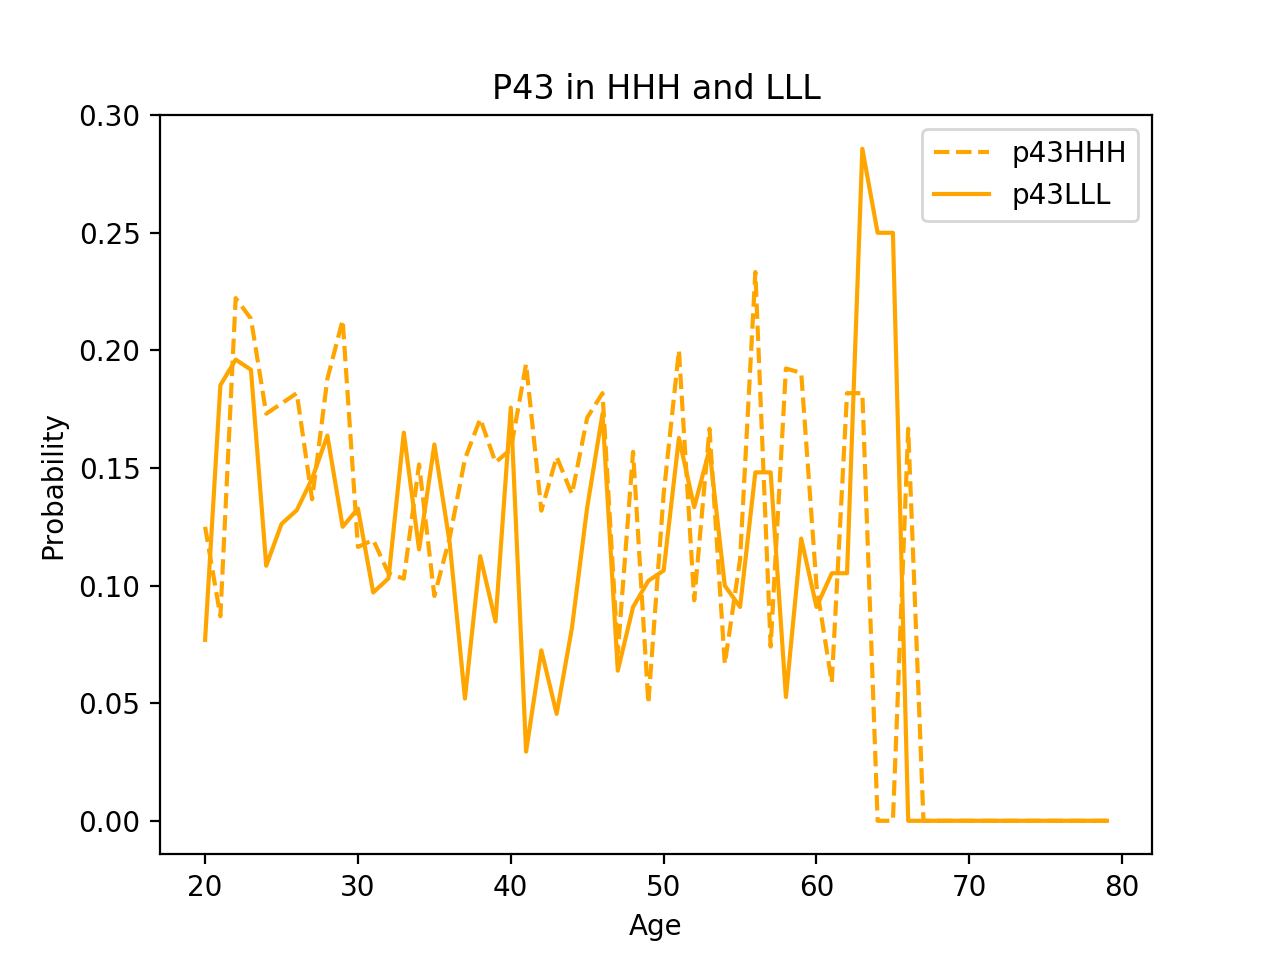

In [215]:
%matplotlib notebook
plt.plot(age,wm43hhh,label='p43HHH',color='orange',linestyle='dashed')
plt.plot(age,wm43lll,label='p43LLL',color='orange')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P43 in HHH and LLL')
plt.legend()

<IPython.core.display.Javascript object>


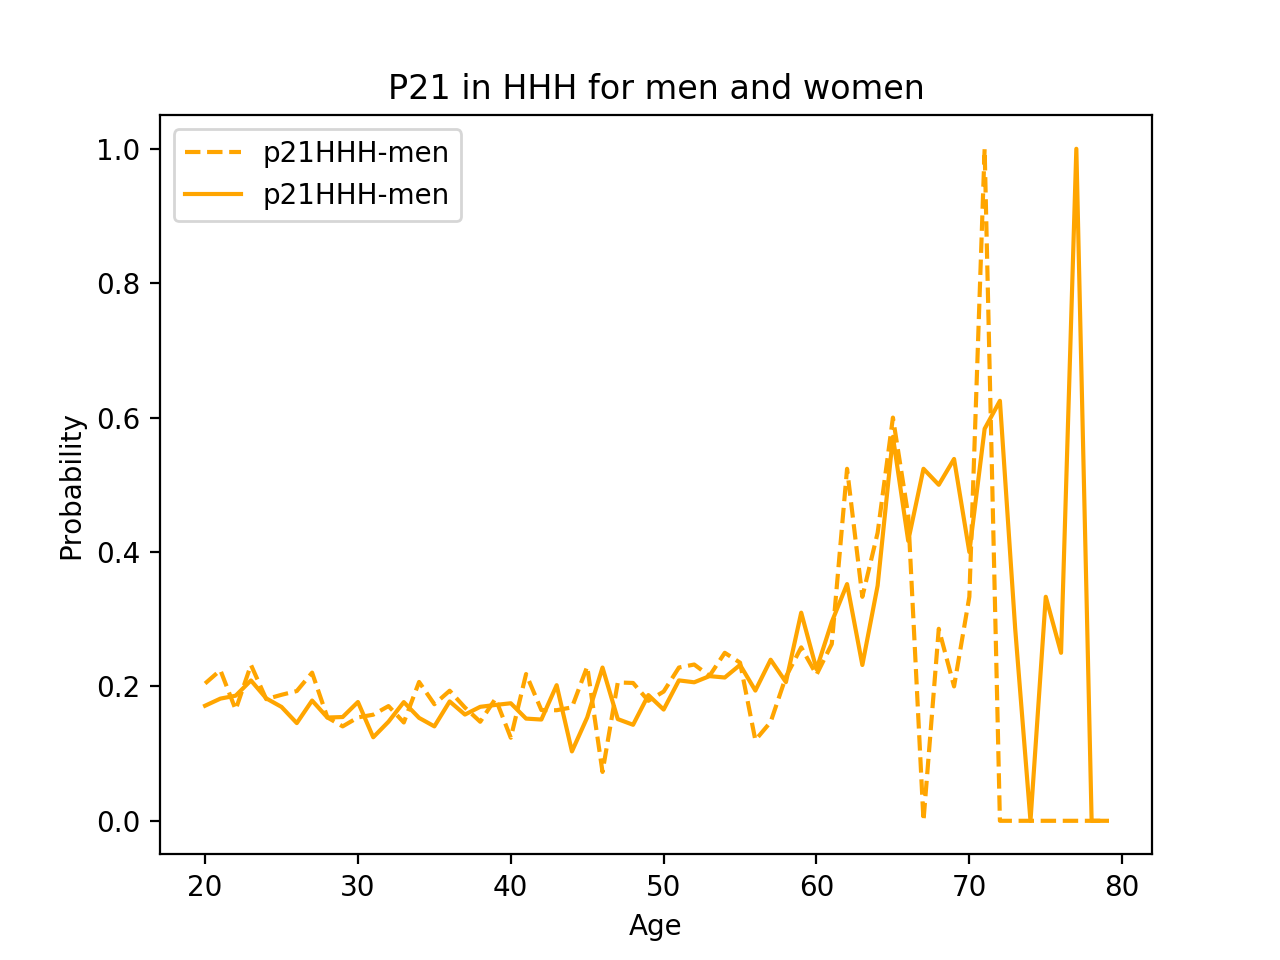

In [218]:
%matplotlib notebook
plt.plot(age,wm21hhh,label='p21HHH-men',color='orange',linestyle='dashed')
plt.plot(age,hm21hhh,label='p21HHH-men',color='orange')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P21 in HHH for men and women')
plt.legend()

# Findings:
1. The variance of the probability of men's income transition is larger when they are after 60 years old than before 60 years old (One reason might be the lack of observations of people that are older than 60).
2. The probability of downward movement decreases slightly when men are between 20 and 30, and remains roughly constant between 30 and 60.
3. The probability of downward movement for men might increase after 60 years old.
4. The probability of upward movement for men remains roughly constant between 20 and 50 years old, but shows a decreasing trend after 50 years old.
5. Usually, upward probabilities (especially p12, p23) are higher than the corresponding downward probabilities (p21, p32).
6. Most of the above findings for men also holds for women.
7. p12 of women is higher than p23, and p23 is higher than 34. These are also true for men before 40 years old, but these three probabilities for men are roughly the same after 40 years old.

1. p34 of men is higher than that of women
2. p43 of men is also higher than that of women
3. p23 of women is higher than that of men

1. The probability of men's downward transition in HHH and LLL decreases slightly between 20 and 30 years old, and remains roughly constant between 30 and 60 years old.
2. The probability of men's downward transition in HHH (High inequality, High crime rate, High high school drop out rate) is higher than that in LLL, but for women, the two are similar.